# Practical 1:

## Imports

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import csv
import gc
import time

## Data Download

In [2]:
url = "https://files.grouplens.org/datasets/movielens/ml-32m.zip"
zip_file = "ml-32m.zip"
extract_folder = "ml-32m"

print(f"Starting download of {url}...")

# Download only if not already downloaded
if not os.path.exists(zip_file) and not os.path.exists(extract_folder):
    !wget -q $url
    print("Download complete.")
else:
    print("File already downloaded or extracted. Skipping download.")

# Extract only if not already extracted
if not os.path.exists(extract_folder):
    print(f"Unzipping {zip_file}...")
    !unzip -q $zip_file
    print(f"Successfully unzipped to '{extract_folder}' folder.")
else:
    print(f"'{extract_folder}' already exists. Skipping unzip.")

# List contents
if os.path.exists(extract_folder):
    print(f"\nContents of {extract_folder}:")
    !ls -l $extract_folder
else:
    print(f"Error: Folder '{extract_folder}' not found after extraction.")

# Clean up the zip file if it still exists
if os.path.exists(zip_file):
    print(f"\nCleaning up {zip_file}...")
    os.remove(zip_file)
    print("Zip file removed.")

Starting download of https://files.grouplens.org/datasets/movielens/ml-32m.zip...
File already downloaded or extracted. Skipping download.
'ml-32m' already exists. Skipping unzip.

Contents of ml-32m:
total 934187
-rw-rw-r-- 1 hassanh people       178 Oct 13  2023 checksums.txt
-rw-rw-r-- 1 hassanh people   1950748 Oct 13  2023 links.csv
-rw-rw-r-- 1 hassanh people   4242926 Oct 13  2023 movies.csv
-rw-rw-r-- 1 hassanh people 877076222 Oct 13  2023 ratings.csv
-rw-rw-r-- 1 hassanh people      9227 Oct 13  2023 README.txt
-rw-rw-r-- 1 hassanh people  72353890 Oct 13  2023 tags.csv


## Data Structure Class

In [3]:
class RatingsData:
    def __init__(self, file_path):
        self.file_path = file_path

        # Mappings
        self.user_id_to_idx = {}
        self.idx_to_user_id = []
        self.movie_id_to_idx = {}
        self.idx_to_movie_id = []

        # Data
        self.data_by_user = []
        self.data_by_movie = []

    def load(self):
        user_set = set()
        movie_set = set()

        # First pass: collect all unique IDs
        with open(self.file_path, 'r') as f:
            reader = csv.reader(f)
            next(reader)  # skip header
            for row in reader:
                user_set.add(int(row[0]))
                movie_set.add(int(row[1]))

        # creating mappings
        self.idx_to_user_id = sorted(list(user_set))
        self.idx_to_movie_id =sorted(list(movie_set))

        self.user_id_to_idx = {uid: i for i, uid in enumerate(self.idx_to_user_id)}
        self.movie_id_to_idx = {mid: i for i, mid in enumerate(self.idx_to_movie_id)}

        # initializing data lists
        self.data_by_user = [[] for _ in range(len(self.idx_to_user_id))]
        self.data_by_movie = [[] for _ in range(len(self.idx_to_movie_id))]

        # fill ratings
        with open(self.file_path, 'r') as f:
            reader = csv.reader(f)
            next(reader) # skip header
            for row in reader:
                user_id = int(row[0])
                movie_id = int(row[1])
                rating = float(row[2])

                u_idx = self.user_id_to_idx[user_id]
                m_idx = self.movie_id_to_idx[movie_id]

                self.data_by_user[u_idx].append((movie_id, rating))
                self.data_by_movie[m_idx].append((user_id, rating))


    def get_user_ratings(self, user_id):
        u_idx = self.user_id_to_idx[user_id]
        return self.data_by_user[u_idx]

    def get_movie_ratings(self, movie_id):
        m_idx = self.movie_id_to_idx[movie_id]
        return self.data_by_movie[m_idx]

    def num_users(self):
        return len(self.idx_to_user_id)

    def num_movies(self):
        return len(self.idx_to_movie_id)


## Load Data

In [4]:
file_path = "ml-32m/ratings.csv"
data = RatingsData(file_path)
data.load()

In [5]:
# verifying that .get_movie_ratings() method works
data.get_movie_ratings(296)

[(2, 1.0),
 (5, 1.0),
 (7, 5.0),
 (8, 4.5),
 (10, 4.5),
 (13, 2.0),
 (17, 5.0),
 (18, 4.0),
 (20, 5.0),
 (23, 4.0),
 (25, 4.0),
 (26, 5.0),
 (28, 5.0),
 (29, 5.0),
 (31, 4.5),
 (33, 5.0),
 (35, 5.0),
 (36, 4.5),
 (37, 2.0),
 (38, 0.5),
 (40, 5.0),
 (43, 5.0),
 (48, 4.0),
 (49, 5.0),
 (50, 4.5),
 (52, 4.0),
 (54, 5.0),
 (59, 1.0),
 (60, 4.0),
 (61, 4.0),
 (62, 3.0),
 (64, 5.0),
 (65, 4.5),
 (67, 5.0),
 (68, 4.0),
 (70, 3.0),
 (71, 5.0),
 (72, 5.0),
 (73, 3.5),
 (74, 4.0),
 (77, 5.0),
 (78, 2.0),
 (79, 2.5),
 (80, 4.5),
 (83, 5.0),
 (84, 4.0),
 (86, 4.0),
 (87, 4.0),
 (89, 4.0),
 (90, 2.0),
 (91, 3.0),
 (93, 5.0),
 (95, 2.5),
 (96, 5.0),
 (99, 3.5),
 (100, 4.0),
 (103, 4.0),
 (104, 4.0),
 (109, 4.0),
 (115, 4.0),
 (118, 5.0),
 (121, 5.0),
 (122, 4.0),
 (128, 1.5),
 (130, 5.0),
 (131, 2.5),
 (135, 4.0),
 (138, 4.5),
 (144, 5.0),
 (145, 3.0),
 (146, 4.0),
 (148, 4.5),
 (149, 5.0),
 (151, 5.0),
 (152, 5.0),
 (156, 5.0),
 (157, 4.5),
 (158, 4.0),
 (161, 3.0),
 (163, 5.0),
 (166, 5.0),
 (173,

In [6]:
# verifying that .get_user_ratings() method works
data.get_user_ratings(296)

[(1, 2.5),
 (16, 2.5),
 (17, 2.5),
 (32, 4.5),
 (47, 4.0),
 (48, 2.5),
 (50, 4.0),
 (150, 2.5),
 (236, 1.0),
 (293, 3.0),
 (342, 3.0),
 (356, 4.0),
 (357, 4.5),
 (377, 2.5),
 (380, 2.0),
 (527, 3.0),
 (586, 2.5),
 (588, 4.0),
 (590, 4.0),
 (733, 2.5),
 (778, 4.5),
 (917, 3.0),
 (919, 2.5),
 (1079, 3.5),
 (1136, 5.0),
 (1148, 4.0),
 (1163, 4.5),
 (1174, 2.5),
 (1208, 2.5),
 (1222, 3.5),
 (1225, 4.0),
 (1249, 5.0),
 (1271, 3.0),
 (1307, 3.0),
 (1365, 5.0),
 (1408, 2.5),
 (1527, 3.0),
 (1580, 2.0),
 (1625, 3.5),
 (1641, 3.0),
 (1721, 2.0),
 (1732, 4.0),
 (1748, 4.0),
 (1955, 3.0),
 (1961, 3.5),
 (2054, 1.5),
 (2194, 3.0),
 (2273, 2.0),
 (2571, 4.5),
 (2576, 3.5),
 (2762, 3.0),
 (2858, 4.5),
 (2959, 4.5),
 (3010, 3.0),
 (3052, 3.5),
 (3530, 4.0),
 (3578, 3.0),
 (3751, 3.0),
 (3949, 4.0),
 (3953, 1.5),
 (4011, 3.0),
 (4034, 4.0),
 (4306, 3.5),
 (4816, 2.0),
 (4865, 3.0),
 (4878, 4.0),
 (4973, 4.5),
 (4993, 2.0),
 (5308, 3.5),
 (5669, 4.0),
 (5679, 3.0),
 (5810, 3.0),
 (5952, 2.0),
 (6016, 4

## Exploratory Data Analysis (EDA)

In [10]:
def plot_rating_distribution(ratings_data):
    """
    Plot rating distribution with bars centered on the actual rating values.
    ratings_data: instance of RatingsData after load()
    """
    # Collect all ratings into a NumPy array
    all_ratings = []
    for user_ratings in ratings_data.data_by_user:
        for _, rating in user_ratings:
            all_ratings.append(rating)
    all_ratings = np.array(all_ratings)

    # Define rating values (centers)
    rating_values = np.arange(0.5, 5.1, 0.5)  # 0.5, 1.0, ..., 5.0
    counts = np.array([np.sum(all_ratings == r) for r in rating_values])

    # Plot
    plt.figure(figsize=(8,5))
    plt.bar(rating_values, counts, width=0.4, color='skyblue', edgecolor='black')
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.title("Rating Distribution (Centered)")
    plt.xticks(rating_values)

    # Save as pdf before show()
    plt.savefig("rating_distribution.pdf", format="pdf", bbox_inches="tight")
    plt.show()

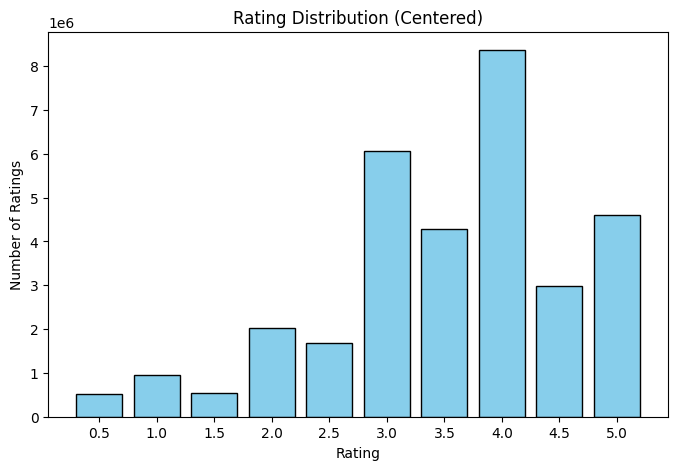

In [11]:
plot_rating_distribution(data)

In [12]:
def plot_avg_rating_per_user(ratings_data):
    """
    Plot the distribution of average ratings per user.
    ratings_data: instance of RatingsData after load()
    """
    # Compute average rating per user
    avg_ratings = []
    for user_ratings in ratings_data.data_by_user:
        if len(user_ratings) > 0:
            ratings = [r for _, r in user_ratings]
            avg_ratings.append(np.mean(ratings))
    avg_ratings = np.array(avg_ratings)

    # Plot histogram
    plt.figure(figsize=(8,5))
    bins = np.arange(0.5, 5.1, 0.25)  # finer bins for averages
    plt.hist(avg_ratings, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel("Average Rating per User")
    plt.ylabel("Number of Users")
    plt.title("Distribution of Average Ratings per User")
    plt.xticks(np.arange(0.5, 5.1, 0.5))
    
    # Save as pdf before show()
    plt.savefig("average_ratings_per_user.pdf", format="pdf", bbox_inches="tight")
    plt.show()

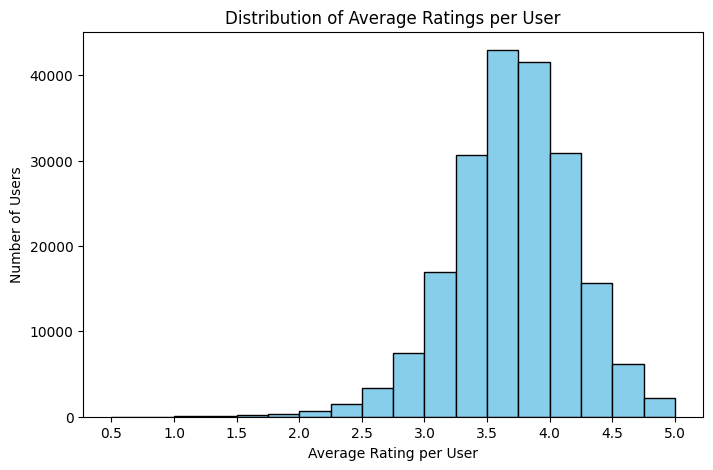

In [13]:
plot_avg_rating_per_user(data)

In [14]:
def plot_frequency_vs_degree(ratings_data):
    """
    Log-log plot of frequency vs degree for movies and users.
    Degree = number of ratings per movie/user.
    Frequency = how many movies/users have that degree.
    """
    # Movies
    movie_degrees = np.array([len(r) for r in ratings_data.data_by_movie])
    movie_deg_vals, movie_counts = np.unique(movie_degrees, return_counts=True)

    # Users
    user_degrees = np.array([len(r) for r in ratings_data.data_by_user])
    user_deg_vals, user_counts = np.unique(user_degrees, return_counts=True)

    # Plot
    plt.figure(figsize=(8,6))
    plt.loglog(movie_deg_vals, movie_counts, marker='.', linestyle='none', color='blue', label='Movies')
    plt.loglog(user_deg_vals, user_counts, marker='.', linestyle='none', color='orange', label='Users')

    plt.xlabel("Degree (Number of Ratings)")
    plt.ylabel("Frequency")
    plt.title("Frequency vs Degree (Movies & Users) - Log-Log")
    plt.grid(True, which="both", ls="--", alpha=0.6)
    plt.legend()

    # Save as pdf before show()
    plt.savefig("frequency_vs_degree.pdf", format="pdf", bbox_inches="tight")
    plt.show()

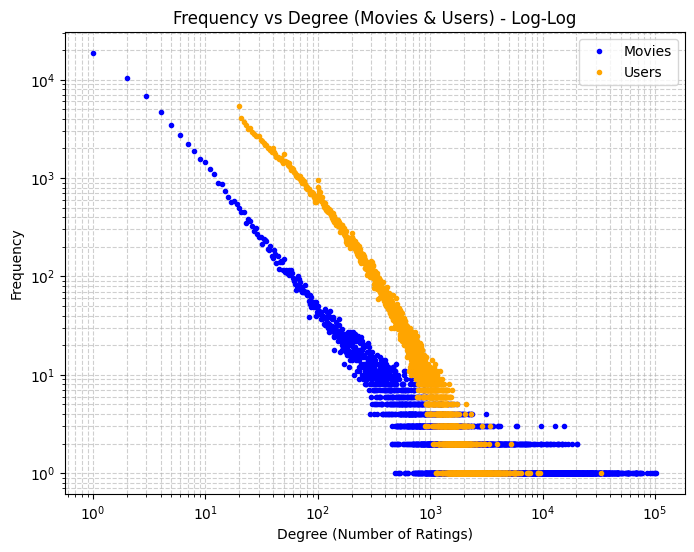

In [15]:
plot_frequency_vs_degree(data)

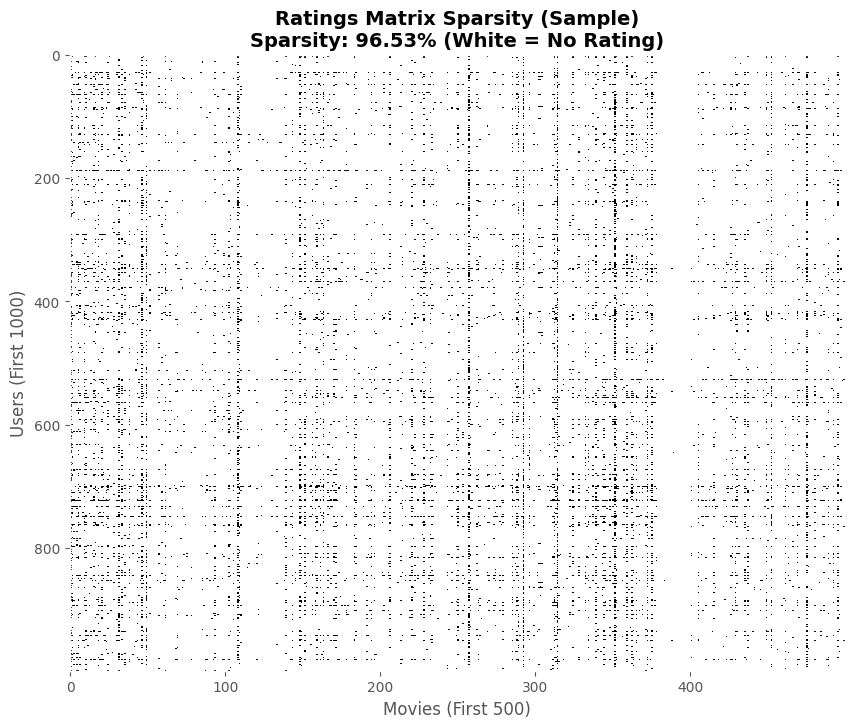


Full Dataset Statistics:
Total Users (M): 200948
Total Movies (N): 84432
Total Ratings: 86408847
Total Possible Pairs: 16966441536
Full dataset sparsity: 99.4907%
Only 0.5093% of possible user-movie pairs are rated


In [58]:
def plot_sparsity_sample():
    """Visualize sparsity with a sample of the ratings matrix"""
    
    # Take a small sample (first 1000 users, first 500 movies)
    sample_users = 1000
    sample_movies = 500
    
    # Create sparse matrix
    sparse_matrix = np.zeros((sample_users, sample_movies))
    
    for user_idx in range(min(sample_users, M)):
        ratings = get_user_train_ratings(user_idx)
        for movie_idx, rating in ratings:
            # FIX 1: Ensure movie_idx is an integer
            m_idx = int(movie_idx)
            if m_idx < sample_movies:
                sparse_matrix[user_idx, m_idx] = 1  # Just mark as non-zero
    
    # Calculate sparsity of the SAMPLE
    total_entries = sample_users * sample_movies
    filled_entries = np.sum(sparse_matrix > 0)
    sparsity = 100 * (1 - filled_entries / total_entries)
    
    # Plot
    plt.figure(figsize=(10, 8))
    # cmap='binary' makes 0 white and 1 black. 
    # Use cmap='Greys' or invert if you want black dots on white background.
    plt.imshow(sparse_matrix, aspect='auto', cmap='Greys', interpolation='none')
    plt.xlabel(f'Movies (First {sample_movies})', fontsize=12)
    plt.ylabel(f'Users (First {sample_users})', fontsize=12)
    plt.title(f'Ratings Matrix Sparsity (Sample)\n'
              f'Sparsity: {sparsity:.2f}% (White = No Rating)', 
              fontsize=14, fontweight='bold')
    
    plt.savefig('sparsity_visualization.pdf', bbox_inches='tight')
    plt.show()
    
    # --- Full Dataset Sparsity Analysis ---
    
    total_possible = M * N
    # FIX 2: len(train_ratings_by_user) is likely just 'M' (number of users),
    # not the total number of ratings. We need to sum the lengths.
    actual_ratings = sum(len(user_ratings) for user_ratings in train_ratings_by_user)
    
    full_sparsity = 100 * (1 - actual_ratings / total_possible)
    
    print("\nFull Dataset Statistics:")
    print(f"Total Users (M): {M}")
    print(f"Total Movies (N): {N}")
    print(f"Total Ratings: {actual_ratings}")
    print(f"Total Possible Pairs: {total_possible}")
    print(f"Full dataset sparsity: {full_sparsity:.4f}%")
    print(f"Only {100 - full_sparsity:.4f}% of possible user-movie pairs are rated")

plot_sparsity_sample()

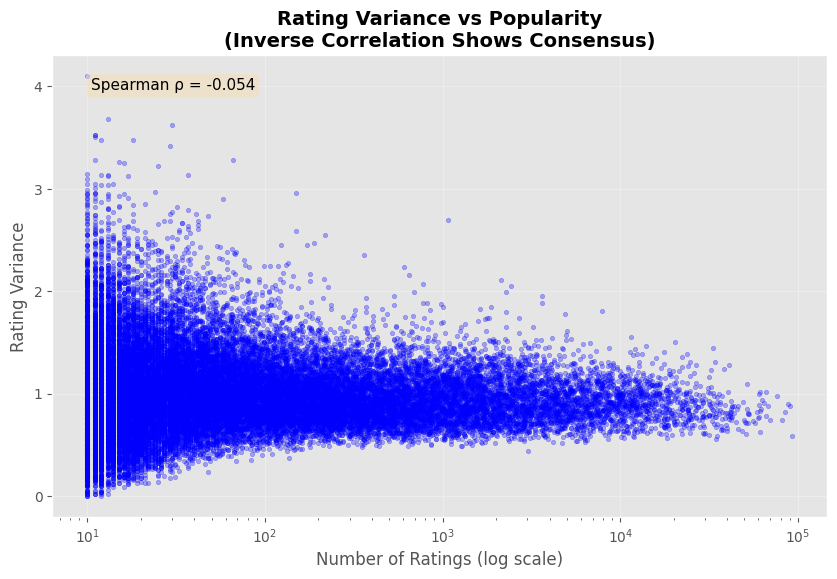

In [85]:
def plot_variance_vs_count():
    """Critical figure showing inverse correlation"""
    
    # 1. Compute variance for each movie
    movie_variances = np.zeros(N)
    for movie_idx in range(N):
        ratings = get_movie_train_ratings_array(movie_idx)
        if len(ratings) >= 10:  # minimum threshold
            movie_variances[movie_idx] = np.var(ratings)
        else:
            movie_variances[movie_idx] = np.nan
    
    # 2. Filter valid movies
    valid_mask = ~np.isnan(movie_variances)
    counts = movie_rating_counts[valid_mask]
    variances = movie_variances[valid_mask]
    
    # 3. Plot on log scale
    plt.figure(figsize=(10, 6))
    plt.scatter(counts, variances, alpha=0.3, s=10, color='blue')
    plt.xscale('log')
    plt.xlabel('Number of Ratings (log scale)', fontsize=12)
    plt.ylabel('Rating Variance', fontsize=12)
    plt.title('Rating Variance vs Popularity\n(Inverse Correlation Shows Consensus)', 
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add trend line (optional)
    # from scipy.stats import spearmanr
    corr, pval = spearmanr(np.log(counts), variances)
    plt.text(0.05, 0.95, f'Spearman ρ = {corr:.3f}', 
          transform=plt.gca().transAxes, fontsize=11,
          verticalalignment='top', bbox=dict(boxstyle='round', 
             facecolor='wheat', alpha=0.5))
    
    plt.savefig('variance_vs_count.pdf', bbox_inches='tight')
    plt.show()

plot_variance_vs_count()

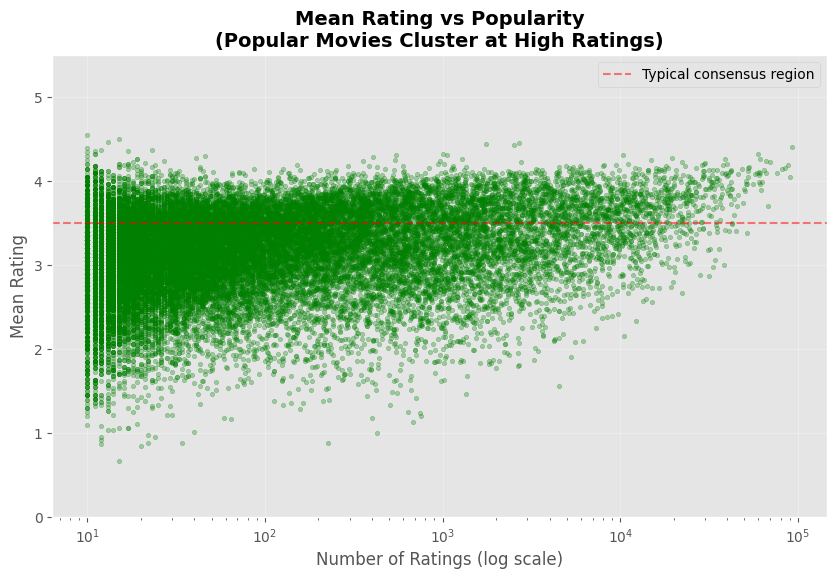

In [86]:
def plot_mean_vs_count():
    """Shows popular movies tend to be highly rated"""
    global movie_means
    # 1. Compute mean rating for each movie
    movie_means = np.zeros(N)
    for movie_idx in range(N):
        ratings = get_movie_train_ratings_array(movie_idx)
        if len(ratings) >= 10:
            movie_means[movie_idx] = np.mean(ratings)
        else:
            movie_means[movie_idx] = np.nan
    
    # 2. Filter and plot
    valid_mask = ~np.isnan(movie_means)
    counts = movie_rating_counts[valid_mask]
    means = movie_means[valid_mask]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(counts, means, alpha=0.3, s=10, color='green')
    plt.xscale('log')
    plt.xlabel('Number of Ratings (log scale)', fontsize=12)
    plt.ylabel('Mean Rating', fontsize=12)
    plt.title('Mean Rating vs Popularity\n(Popular Movies Cluster at High Ratings)', 
              fontsize=14, fontweight='bold')
    plt.ylim(0, 5.5)
    plt.grid(True, alpha=0.3)
    
    # Highlight the "funnel" shape
    plt.axhline(y=3.5, color='red', linestyle='--', alpha=0.5, 
                label='Typical consensus region')
    plt.legend()
    
    plt.savefig('mean_vs_count.pdf', bbox_inches='tight')
    plt.show()

plot_mean_vs_count()

Computing movie statistics...
Valid movies for analysis: 53,222

✓ Saved figure to 'variance_vs_mean_rating.pdf'


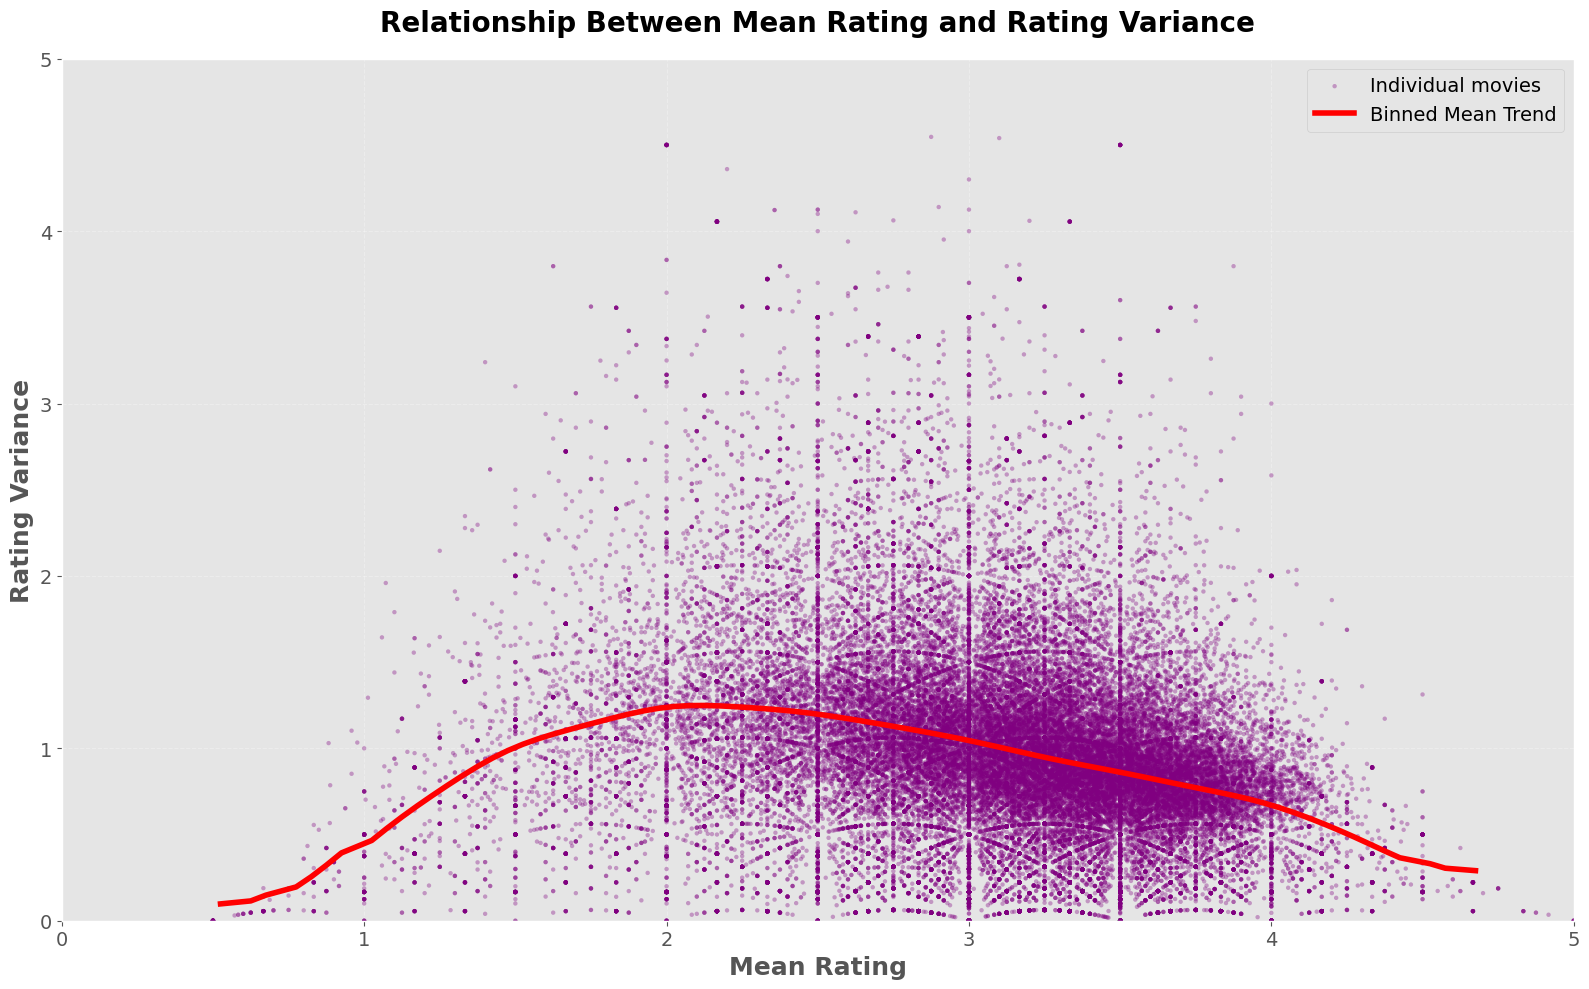


VARIANCE VS MEAN RATING ANALYSIS

Very Low Mean (<1.5) (n=702):
  Mean variance: 0.644
  Median variance: 0.540
  Std variance: 0.498

Low Mean (1.5-2.5) (n=7,199):
  Mean variance: 1.205
  Median variance: 1.133
  Std variance: 0.679

Middle Mean (2.5-3.5) (n=31,261):
  Mean variance: 1.022
  Median variance: 0.960
  Std variance: 0.603

High Mean (3.5-4.5) (n=13,937):
  Mean variance: 0.762
  Median variance: 0.740
  Std variance: 0.449

Very High Mean (>4.5) (n=117):
  Mean variance: 0.267
  Median variance: 0.201
  Std variance: 0.190

PEAK POLARIZATION:
  Occurs at mean rating: 2.12
  Peak variance value: 1.249


In [ ]:
def plot_variance_vs_mean_rating_final():
    """
    Final version matching friend's figure exactly
    """
    
    #Compute movie means and variances
    print("Computing movie statistics...")
    movie_means = []
    movie_variances = []
    
    for movie_idx in range(N):
        start = movie_train_start[movie_idx]
        end = movie_train_start[movie_idx + 1]
        ratings = train_ratings_by_movie[start:end, 2]
        
        # Use very low threshold to get maximum movies
        if len(ratings) >= 3:  # Even lower threshold
            movie_means.append(np.mean(ratings))
            movie_variances.append(np.var(ratings))
    
    means = np.array(movie_means)
    variances = np.array(movie_variances)
    
    print(f"Valid movies for analysis: {len(means):,}")
    
    # Compute binned trend with better binning 
    n_bins = 100  # More bins for smoother curve
    bins = np.linspace(0, 5, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Compute mean variance in each bin
    bin_variances = []
    for i in range(n_bins):
        mask = (means >= bins[i]) & (means < bins[i+1])
        if mask.sum() >= 5:  # Need at least 5 movies
            bin_variances.append(variances[mask].mean())
        else:
            bin_variances.append(np.nan)
    
    bin_variances = np.array(bin_variances)
    
    # Remove NaN bins
    valid_bins = ~np.isnan(bin_variances)
    bin_centers_clean = bin_centers[valid_bins]
    bin_variances_clean = bin_variances[valid_bins]
    
    # Apply stronger smoothing 
    from scipy.ndimage import gaussian_filter1d
    bin_variances_smooth = gaussian_filter1d(bin_variances_clean, sigma=3)  # Increased sigma
    
    # Create the plot matching friend's style
    fig, ax = plt.subplots(figsize=(16, 10))  # Slightly larger
    
    # Scatter plot with adjusted alpha and size
    ax.scatter(means, variances, 
              alpha=0.35, s=10,  # Smaller points, slightly more visible
              color='purple', 
              edgecolors='none', 
              label='Individual movies')
    
    # Smoothed binned trend line - thicker and smoother
    ax.plot(bin_centers_clean, bin_variances_smooth, 
           color='red', linewidth=4,  # Thicker line
           label='Binned Mean Trend', zorder=5)
    
    # Styling to match friend's figure
    ax.set_xlabel('Mean Rating', fontsize=18, fontweight='bold')
    ax.set_ylabel('Rating Variance', fontsize=18, fontweight='bold')
    ax.set_title('Relationship Between Mean Rating and Rating Variance', 
                fontsize=20, fontweight='bold', pad=20)
    
    # Grid
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    
    # CRITICAL: Set axes ranges to [0, 5] exactly
    ax.set_xlim(0.5, 5.0)
    ax.set_ylim(0, 5.0)
    
    # Tick formatting - exactly [0, 1, 2, 3, 4, 5]
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.tick_params(axis='both', labelsize=14)
    
    # Legend
    ax.legend(fontsize=14, loc='upper right', framealpha=0.95)
    
    # Tight layout
    plt.tight_layout()
    
    # Save
    plt.savefig('variance_vs_mean_rating.pdf', 
                format='pdf', bbox_inches='tight', dpi=300)
    print("\n✓ Saved figure to 'variance_vs_mean_rating.pdf'")
    
    plt.show()
    
    # Print statistics 
    print("\n" + "="*70)
    print("VARIANCE VS MEAN RATING ANALYSIS")
    print("="*70)
    
    # Analyze by regions
    regions = [
        (0.0, 1.5, "Very Low Mean (<1.5)"),
        (1.5, 2.5, "Low Mean (1.5-2.5)"),
        (2.5, 3.5, "Middle Mean (2.5-3.5)"),
        (3.5, 4.5, "High Mean (3.5-4.5)"),
        (4.5, 5.0, "Very High Mean (>4.5)")
    ]
    
    for low, high, label in regions:
        mask = (means >= low) & (means < high)
        if mask.sum() > 0:
            print(f"\n{label} (n={mask.sum():,}):")
            print(f"  Mean variance: {variances[mask].mean():.3f}")
            print(f"  Median variance: {np.median(variances[mask]):.3f}")
            print(f"  Std variance: {variances[mask].std():.3f}")
    
    # Find peak
    peak_idx = np.argmax(bin_variances_smooth)
    print(f"\n{'='*70}")
    print("PEAK POLARIZATION:")
    print(f"  Occurs at mean rating: {bin_centers_clean[peak_idx]:.2f}")
    print(f"  Peak variance value: {bin_variances_smooth[peak_idx]:.3f}")
    print(f"{'='*70}")


# Run it!
plot_variance_vs_mean_rating_final()

# Practical 2:

## Download 100k Dataset

In [16]:
# from google.colab import drive

# # Mount your Drive
# drive.mount('/content/drive')

# # Path to your uploaded file
# file_path = "/content/drive/MyDrive/data/ratings_100k.csv"

# data_test = RatingsData(file_path)
# data_test.load()

file_path = "/var/autofs/misc/home/hassanh/Desktop/mlas/ratings_100k.csv"
data_test = RatingsData(file_path)
data_test.load()

## Train/Test Split

In [17]:
# Get the total number of users and movies from the dataset
n_users = len(data_test.data_by_user)
n_movies = len(data_test.data_by_movie)

# Initialize empty lists to store train/test splits
# Each user/movie will have separate lists for training and testing ratings
data_by_user_train = [[] for _ in range(n_users)]
data_by_user_test  = [[] for _ in range(n_users)]
data_by_movie_train = [[] for _ in range(n_movies)]
data_by_movie_test  = [[] for _ in range(n_movies)]

# First pass: Split ratings by user (90% train, 10% test)
# Loop through each user and randomly assign their ratings to train or test
for i in range(n_users):
  ratings = data_test.data_by_user[i]
  for movie_id, rating in ratings:
    # 90% probability of going to training set
    if np.random.rand() < 0.9:
      data_by_user_train[i].append((movie_id, rating))
    else:
      # 10% probability of going to test set
      data_by_user_test[i].append((movie_id, rating))

# Second pass: Reorganize the split data by movie
# This creates movie-indexed versions of the train/test splits
for i in range(n_users):
    # Get the actual user ID from the index
    user_id = data_test.idx_to_user_id[i]

    # Add this user's training ratings to the movie-indexed training data
    for movie_id, rating in data_by_user_train[i]:
        m_idx = data_test.movie_id_to_idx[movie_id]
        data_by_movie_train[m_idx].append((user_id, rating))

    # Add this user's test ratings to the movie-indexed test data
    for movie_id, rating in data_by_user_test[i]:
        m_idx = data_test.movie_id_to_idx[movie_id]
        data_by_movie_test[m_idx].append((user_id, rating))

## Verifying Split Split

In [18]:
print(f"number of items in users train set: {len(data_by_user_train)}")
print(f"number of items in users test set: {len(data_by_user_test)}")

non_empty_users_train = sum(1 for u in data_by_user_train if len(u) > 0)
non_empty_users_test = sum(1 for u in data_by_user_test if len(u) > 0)

print(f"Number of users with ratings in train set: {non_empty_users_train}")
print(f"Number of users with ratings in test set: {non_empty_users_test}")

print("------------------------------------------------------------------")

print(f"number of items in movies train set: {len(data_by_movie_train)}")
print(f"number of items in movies test set: {len(data_by_movie_test)}")

non_empty_movies_train = sum(1 for u in data_by_movie_train if len(u) > 0)
non_empty_movies_test = sum(1 for u in data_by_movie_test if len(u) > 0)

print(f"Number of movies with ratings in train set: {non_empty_movies_train}")
print(f"Number of movies with ratings in test set: {non_empty_movies_test}")

number of items in users train set: 610
number of items in users test set: 610
Number of users with ratings in train set: 610
Number of users with ratings in test set: 603
------------------------------------------------------------------
number of items in movies train set: 9724
number of items in movies test set: 9724
Number of movies with ratings in train set: 9366
Number of movies with ratings in test set: 3630


## Training with Bias Only

Iteration 1/20: Train RMSE = 0.8096, Test RMSE = 0.8725, NLL Loss = 308.78
Iteration 2/20: Train RMSE = 0.7947, Test RMSE = 0.8597, NLL Loss = 299.26
Iteration 3/20: Train RMSE = 0.7935, Test RMSE = 0.8590, NLL Loss = 298.66
Iteration 4/20: Train RMSE = 0.7933, Test RMSE = 0.8589, NLL Loss = 298.53
Iteration 5/20: Train RMSE = 0.7932, Test RMSE = 0.8588, NLL Loss = 298.44
Iteration 6/20: Train RMSE = 0.7932, Test RMSE = 0.8588, NLL Loss = 298.36
Iteration 7/20: Train RMSE = 0.7932, Test RMSE = 0.8587, NLL Loss = 298.30
Iteration 8/20: Train RMSE = 0.7931, Test RMSE = 0.8587, NLL Loss = 298.25
Iteration 9/20: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL Loss = 298.21
Iteration 10/20: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL Loss = 298.17
Iteration 11/20: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL Loss = 298.13
Iteration 12/20: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL Loss = 298.11
Iteration 13/20: Train RMSE = 0.7931, Test RMSE = 0.8585, NLL Loss = 298.08
Iteration 14/20: Trai

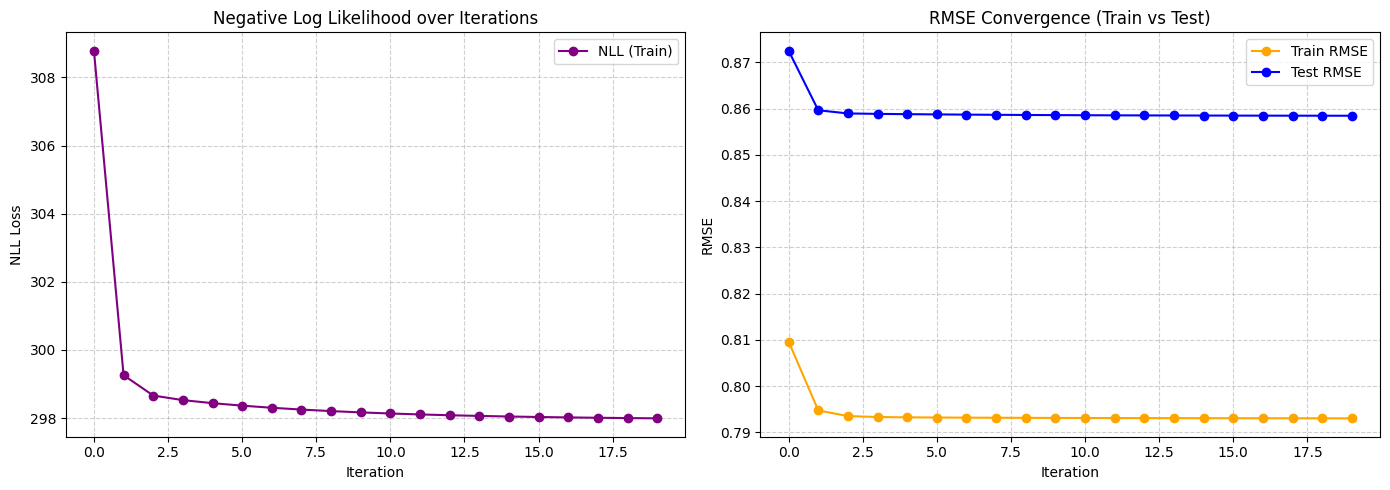

In [ ]:
M = n_users
N = n_movies

lambd = 0.01    # update weight factor
gamma = 0.01  # regularisation term for biases
num_iters = 20

# Initialise user & item biases lists
user_biases = np.zeros((M))
item_biases = np.zeros((N))

# Calculate Global Mean
global_mean = 0
total_ratings = 0
for m in range(M):
    for (movie_idx, r) in data_by_user_train[m]:
        global_mean += r
        total_ratings += 1
global_mean /= total_ratings

# For plotting
loss_history = []
rmse_train_history = []
rmse_test_history  = []
nll_history = []

# Start ALS loop
for iter in range(num_iters):
    # Update user biases
    for m in range(M):
        bias = 0 # initialise bias at 0
        count = 0 # to keep track of number of ratings in each user list
        for (movie_id, r) in data_by_user_train[m]:
            movie_idx = data_test.movie_id_to_idx[movie_id]
            bias += lambd * (r - global_mean - item_biases[movie_idx]) # sum of residuals multiplied by lambda
            # bias += lambd * (r - item_biases[movie_idx]) # sum of residuals multiplied by lambda
            count += 1                                                 # to keep track of how many ratings the user has

        user_biases[m] = bias / (lambd * count + gamma) # gamma regularises the bias for users with few ratings

    # Update item biases
    for n in range(N):
        bias = 0
        count = 0
        for (user_id, r) in data_by_movie_train[n]:
            user_idx = data_test.user_id_to_idx[user_id]
            bias += lambd * (r - global_mean - user_biases[user_idx])
            # bias += lambd * (r - user_biases[user_idx])
            count += 1

        item_biases[n] = bias / (lambd * count + gamma)

    # Training loss & RMSE
    squared_error = 0
    count = 0
    for m in range(M):
        for movie_id, r in data_by_user_train[m]:
            # We assume predicted rating = global_mean + user_bias + item_bias
            movie_idx = data_test.movie_id_to_idx[movie_id]
            pred = global_mean + user_biases[m] + item_biases[movie_idx]
            # pred = user_biases[m] + item_biases[movie_idx]
            squared_error += (r - pred) ** 2
            count += 1

    reg_term = lambd * (np.sum(user_biases**2) + np.sum(item_biases**2))

    rmse_train = np.sqrt(squared_error / count)
    total_loss = squared_error + reg_term
    rmse_train_history.append(rmse_train)
    loss_history.append(total_loss)

     # Compute negative log likelihood (training)
    squared_error = 0
    count = 0
    for m in range(M):
        for movie_id, r in data_by_user_train[m]:
            n = data_test.movie_id_to_idx[movie_id]
            pred = global_mean + user_biases[m] + item_biases[n]
            squared_error += (r - pred) ** 2
            count += 1

    # Regularization terms
    reg_bias = np.sum(user_biases ** 2) + np.sum(item_biases ** 2)

    # Log likelihood formula from slides
    log_likelihood = -(lambd / 2) * squared_error - (gamma / 2) * reg_bias

    # Negative log likelihood (negate to get NLL)
    nll = -log_likelihood
    nll_history.append(nll)

    # Compute test RMSE
    squared_error_test = 0
    count_test = 0
    for m in range(M):
        for movie_id, r in data_by_user_test[m]:
            movie_idx = data_test.movie_id_to_idx[movie_id]
            pred = global_mean + user_biases[m] + item_biases[movie_idx]
            squared_error_test += (r - pred) ** 2
            count_test += 1
    rmse_test = np.sqrt(squared_error_test / count_test)
    rmse_test_history.append(rmse_test)

    print(f"Iteration {iter+1}/{num_iters}: "
          f"Train RMSE = {rmse_train:.4f}, Test RMSE = {rmse_test:.4f}, "
          f"NLL Loss = {nll:.2f}")

# --- Plotting Section  ---
plt.figure(figsize=(14, 5)) # Adjusted size for better visibility

# Plot NLL
plt.subplot(1, 2, 1) # Changed to 2 columns to use full space
plt.plot(nll_history, marker='o', color='purple', label='NLL (Train)')
plt.title("Negative Log Likelihood over Iterations")
plt.xlabel("Iteration")
plt.ylabel("NLL Loss")
plt.legend() # Shows label
plt.grid(True, linestyle='--', alpha=0.6) # Added grid for clarity

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(rmse_train_history, marker='o', color='orange', label='Train RMSE')
plt.plot(rmse_test_history, marker='o', color='blue', label='Test RMSE')
plt.title("RMSE Convergence (Train vs Test)")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend() # Shows labels
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure to the current directory
plt.savefig('bias_only_convergence_100k.pdf', format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

# Practical 3:

## 1. Prediction Formula

The predicted rating ($\hat{r}_{mn}$) for a user $m$ and item $n$.

$$
\hat{r}_{mn} = \mu + \mathbf{u}_m^T \mathbf{v}_n + b_m^u + b_n^i
$$

* Corresponds to the `pred` variable in the code:  
  `pred = global_mean + user_biases[m] + item_biases[n] + np.dot(U[m], V[n])`

---

## 2. Loss Function (Negative Log Likelihood)

The objective function to minimize.

$$
\text{NLL} =
\frac{\lambda}{2} \sum_{(m,n) \in \Omega} (r_{mn} - \hat{r}_{mn})^2
+ \frac{\tau}{2} \left( \sum_{m} \|\mathbf{u}_m\|^2 + \sum_{n} \|\mathbf{v}_n\|^2 \right)
+ \frac{\gamma}{2} \left( \sum_{m} (b_m^u)^2 + \sum_{n} (b_n^i)^2 \right)
$$

* Calculated in the code as:
```python
nll = (lambda_reg/2) * squared_error + (tau/2) * reg_factors + (gamma/2) * reg_bias
````

---

## 3. RMSE (Root Mean Squared Error)

The error metric used to evaluate the model.

$$
\text{RMSE} =
\sqrt{\frac{1}{|\Omega|} \sum_{(m,n) \in \Omega} (r_{mn} - \hat{r}_{mn})^2}
$$

* Calculated as:
  `rmse_train = np.sqrt(squared_error / count)`

---

## 4. ALS Updates

The equations solved in the alternating least squares procedure.

### User Bias ($b_m^u$)

$$
b_m^u \leftarrow
\frac{\lambda \sum_{n \in \Omega_m}
\left( r_{mn} - \mu - b_n^i - \mathbf{u}_m^T \mathbf{v}_n \right)}
{\lambda |\Omega_m| + \gamma}
$$

* Code:

```python
user_biases[m] = bias_sum / (lambda_reg * len(items) + gamma)
```

---

### User Latent Factors ($\mathbf{u}_m$)

$$
\mathbf{u}*m \leftarrow
\left(
\lambda \sum*{n \in \Omega_m} \mathbf{v}_n \mathbf{v}*n^T + \tau I
\right)^{-1}
\left(
\lambda \sum*{n \in \Omega_m} \mathbf{v}*n
\left( r*{mn} - \mu - b_m^u - b_n^i \right)
\right)
$$

* Code:

```python
A = lambda_reg * sum of outer products + tau * I
b = lambda_reg * sum of weighted item vectors
U[m] = np.linalg.solve(A, b)
```

---

### Item Bias ($b_n^i$)

$$
b_n^i \leftarrow
\frac{\lambda \sum_{m \in \Omega_n}
\left( r_{mn} - \mu - b_m^u - \mathbf{u}_m^T \mathbf{v}_n \right)}
{\lambda |\Omega_n| + \gamma}
$$

* Code:

```python
item_biases[n] = bias_sum / (lambda_reg * len(users) + gamma)
```

---

### Item Latent Factors ($\mathbf{v}_n$)

$$
\mathbf{v}*n \leftarrow
\left(
\lambda \sum*{m \in \Omega_n} \mathbf{u}_m \mathbf{u}*m^T + \tau I
\right)^{-1}
\left(
\lambda \sum*{m \in \Omega_n} \mathbf{u}*m
\left( r*{mn} - \mu - b_m^u - b_n^i \right)
\right)
$$

* Code:

```python
A = lambda_reg * sum of outer products + tau * I
b = lambda_reg * sum of weighted user vectors
V[n] = np.linalg.solve(A, b)
```

---

### Variables

* $r_{mn}$: True rating for user $m$ and item $n$
* $\hat{r}_{mn}$: Predicted rating
* $\mu$: Global mean rating (code: `global_mean`)
* $\mathbf{u}_m \in \mathbb{R}^{25}$: User latent factor vector (code: `U[m]`)
* $\mathbf{v}_n \in \mathbb{R}^{25}$: Item latent factor vector (code: `V[n]`)
* $b_m^u$: User bias (code: `user_biases[m]`)
* $b_n^i$: Item bias (code: `item_biases[n]`)
* $\lambda$: Data term regularization (code: `lambda_reg`)
* $\tau$: Latent factor regularization (code: `tau`)
* $\gamma$: Bias regularization (code: `gamma`)
* $\Omega_m$: Set of items rated by user $m$
* $\Omega_n$: Set of users who rated item $n$
* $I$: Identity matrix of size $25 \times 25$

```


Iteration 1/15: Train RMSE = 0.8092, Test RMSE = 0.8724, NLL = 33.45
Iteration 2/15: Train RMSE = 0.7947, Test RMSE = 0.8596, NLL = 32.36
Iteration 3/15: Train RMSE = 0.7935, Test RMSE = 0.8590, NLL = 32.29
Iteration 4/15: Train RMSE = 0.7933, Test RMSE = 0.8589, NLL = 32.28
Iteration 5/15: Train RMSE = 0.7932, Test RMSE = 0.8588, NLL = 32.27
Iteration 6/15: Train RMSE = 0.7932, Test RMSE = 0.8588, NLL = 32.26
Iteration 7/15: Train RMSE = 0.7932, Test RMSE = 0.8587, NLL = 32.26
Iteration 8/15: Train RMSE = 0.7931, Test RMSE = 0.8587, NLL = 32.25
Iteration 9/15: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL = 32.25
Iteration 10/15: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL = 32.24
Iteration 11/15: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL = 32.24
Iteration 12/15: Train RMSE = 0.7931, Test RMSE = 0.8586, NLL = 32.24
Iteration 13/15: Train RMSE = 0.7931, Test RMSE = 0.8585, NLL = 32.24
Iteration 14/15: Train RMSE = 0.7931, Test RMSE = 0.8585, NLL = 32.23
Iteration 15/15: Train RMSE =

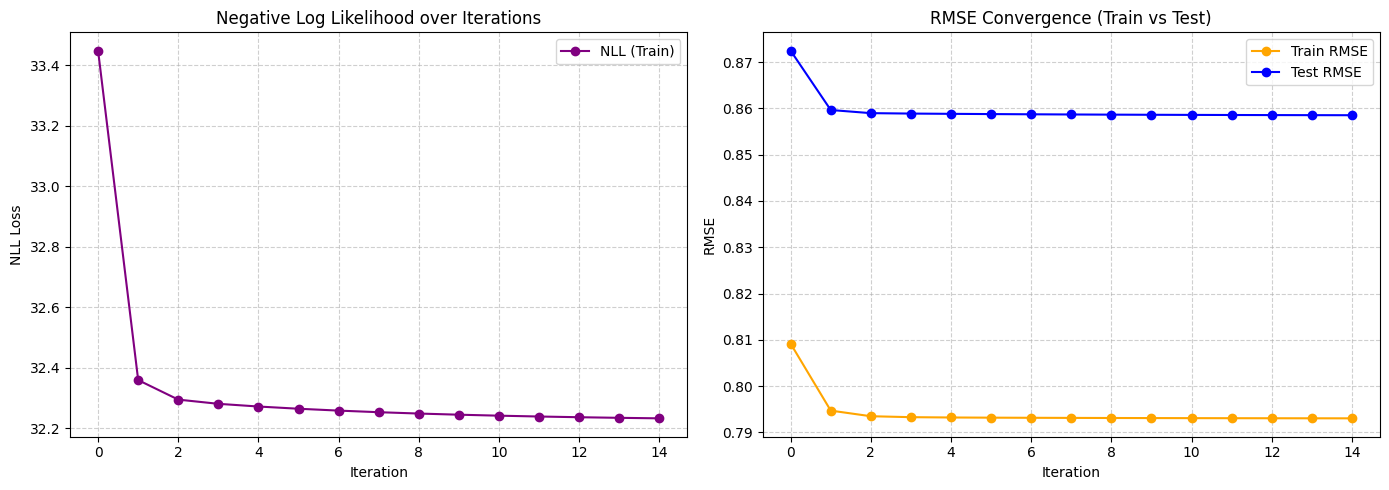

In [26]:
# Hyperparameters
K = 25               # Number of latent factors
num_iters = 15       # Number of ALS iterations
lambda_reg = 0.001   # Regularization for latent factors (U, V)
tau = 0.05           # Regularization term for user/item vectors
gamma = 0.001        # Regularization for biases


M = len(data_by_user_train)   # Number of users
N = len(data_by_movie_train)  # Number of movies

# Calculate global mean
all_ratings = []
for m in range(M):
    for movie_id, r in data_by_user_train[m]:
        all_ratings.append(r)
global_mean = np.mean(all_ratings)

# Initialize biases and latent factors
user_biases = np.zeros(M)
item_biases = np.zeros(N)
U = 0.1 * np.random.randn(M, K)   # User latent factors
V = 0.1 * np.random.randn(N, K)   # Item latent factors

# For plotting
nll_history = []        # Negative log likelihood
rmse_train_history = []
rmse_test_history = []

# ALS Loop
for iter in range(num_iters):

    # Update user biases and latent vectors
    for m in range(M):
        items = data_by_user_train[m]
        if not items:
            continue

        # Update user bias
        bias_sum = 0
        for movie_id, r in items:
            n = data_test.movie_id_to_idx[movie_id]
            pred = global_mean + item_biases[n] + np.dot(U[m], V[n])
            residual = r - pred
            bias_sum += lambda_reg * residual
        user_biases[m] = bias_sum / (lambda_reg * len(items) + gamma)

        # Update user latent vector
        A = np.zeros((K, K))
        b = np.zeros(K)

        for movie_id, r in items:
            n = data_test.movie_id_to_idx[movie_id]
            residual = r - global_mean - user_biases[m] - item_biases[n]

            A += lambda_reg * np.outer(V[n], V[n])
            b += lambda_reg * residual * V[n]

        A += tau * np.eye(K)
        U[m] = np.linalg.solve(A, b)

    # Update item biases and latent vectors
    for n in range(N):
        users = data_by_movie_train[n]
        if not users:
            continue

        # Update item bias
        bias_sum = 0
        for user_id, r in users:
            m_idx = data_test.user_id_to_idx[user_id]
            pred = global_mean + user_biases[m_idx] + np.dot(U[m_idx], V[n])
            residual = r - pred
            bias_sum += lambda_reg * residual
        item_biases[n] = bias_sum / (lambda_reg * len(users) + gamma)

        # Update item latent vector
        A = np.zeros((K, K))
        b = np.zeros(K)

        for user_id, r in users:
            m_idx = data_test.user_id_to_idx[user_id]
            residual = r - global_mean - user_biases[m_idx] - item_biases[n]

            A += lambda_reg * np.outer(U[m_idx], U[m_idx])
            b += lambda_reg * residual * U[m_idx]

        A += tau * np.eye(K)
        V[n] = np.linalg.solve(A, b)

    # Compute negative log likelihood (training)
    squared_error = 0
    count = 0
    for m in range(M):
        for movie_id, r in data_by_user_train[m]:
            n = data_test.movie_id_to_idx[movie_id]
            pred = global_mean + user_biases[m] + item_biases[n] + np.dot(U[m], V[n])
            squared_error += (r - pred) ** 2
            count += 1

    # Regularization terms
    reg_bias = np.sum(user_biases ** 2) + np.sum(item_biases ** 2)
    reg_factors = np.sum(U ** 2) + np.sum(V ** 2)

    # Log likelihood formula from slides
    log_likelihood = -(lambda_reg / 2) * squared_error - (tau / 2) * reg_factors - (gamma / 2) * reg_bias

    # Negative log likelihood (negate to get NLL)
    nll = -log_likelihood
    nll_history.append(nll)

    # Training RMSE
    rmse_train = np.sqrt(squared_error / count)
    rmse_train_history.append(rmse_train)

    # Compute test RMSE
    squared_error_test = 0
    count_test = 0
    for m in range(M):
        for movie_id, r in data_by_user_test[m]:
            n = data_test.movie_id_to_idx[movie_id]
            pred = global_mean + user_biases[m] + item_biases[n] + np.dot(U[m], V[n])
            squared_error_test += (r - pred) ** 2
            count_test += 1
    rmse_test = np.sqrt(squared_error_test / count_test)
    rmse_test_history.append(rmse_test)

    print(f"Iteration {iter+1}/{num_iters}: "
          f"Train RMSE = {rmse_train:.4f}, Test RMSE = {rmse_test:.4f}, "
          f"NLL = {nll:.2f}")


# Plotting 
plt.figure(figsize=(14, 5)) # Adjusted size for better visibility

# Plot NLL
plt.subplot(1, 2, 1) # Changed to 2 columns to use full space
plt.plot(nll_history, marker='o', color='purple', label='NLL (Train)')
plt.title("Negative Log Likelihood over Iterations")
plt.xlabel("Iteration")
plt.ylabel("NLL Loss")
plt.legend() # Shows label
plt.grid(True, linestyle='--', alpha=0.6) # Added grid for clarity

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(rmse_train_history, marker='o', color='orange', label='Train RMSE')
plt.plot(rmse_test_history, marker='o', color='blue', label='Test RMSE')
plt.title("RMSE Convergence (Train vs Test)")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend() # Shows labels
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure to the current directory
plt.savefig('all_latent_factors_convergence_100k.pdf', format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

# Practical 4:

## Train/Test Split Optimization

### Approach
We implemented an efficient **90/10 random split** of the MovieLens dataset with optimized data structures for fast access during training.

### Key Design Decisions

1. **Dual-Index Structure**
   - Created **both** user-indexed and movie-indexed versions of train/test data
   - Enables O(1) lookup time for both user-based and movie-based queries
   - Critical for ALS algorithm which alternates between updating users and movies

2. **Memory Optimization**
   - Pre-sorted arrays by user_idx and movie_idx
   - Built cumulative index arrays (`user_train_start`, `movie_train_start`, `user_test_start`, `movie_test_start`)
   - Allows direct slicing to retrieve all ratings for any user/movie without search
   - Example: `train_ratings_by_user[user_train_start[m]:user_train_start[m+1]]` gives all training ratings for user `m`
   - **Memory cleanup**: Deleted original unsplit data structures and ran garbage collection to free ~1GB+ of memory

3. **Performance Benefits**
   - **Before**: Iterating through all ratings to find user's movies: O(total_ratings)
   - **After**: Direct array slicing with index lookup: O(1) access + O(k) retrieval where k = number of user's ratings
   - Crucial for large datasets (25M+ ratings) where naive lookups would be prohibitively slow

### Data Structure Summary
```python
# Training set
train_ratings_by_user   # Sorted by user_idx: [user_idx, movie_idx, rating]
train_ratings_by_movie  # Sorted by movie_idx: [user_idx, movie_idx, rating]
user_train_start        # Index array for O(1) user lookup
movie_train_start       # Index array for O(1) movie lookup

# Test set (same structure)
test_ratings_by_user    # Sorted by user_idx: [user_idx, movie_idx, rating]
test_ratings_by_movie   # Sorted by movie_idx: [user_idx, movie_idx, rating]
user_test_start         # Index array for O(1) user lookup
movie_test_start        # Index array for O(1) movie lookup
```

This architecture enables efficient alternating least squares updates by providing fast access to both "all movies rated by user m" and "all users who rated movie n" for both training and evaluation.

In [5]:
# CONVERT TO NUMPY ARRAYS & TRAIN/TEST SPLIT

print("\n" + "="*70)
print("CONVERTING TO NUMPY ARRAYS")
print("="*70)

n_users = data.num_users()
n_movies = data.num_movies()

# Count total ratings
total_ratings = sum(len(ratings) for ratings in data.data_by_user)
print(f"Total ratings: {total_ratings:,}")

# Pre-allocate array: [user_idx, movie_idx, rating]
print("Creating rating arrays...")
all_ratings = np.zeros((total_ratings, 3), dtype=np.float32)

# Fill the array
idx = 0
for user_idx in range(n_users):
    if user_idx % 10000 == 0 and user_idx > 0:
        print(f"  Processing user {user_idx:,}/{n_users:,}...")

    ratings = data.data_by_user[user_idx]
    for movie_id, rating in ratings:
        movie_idx = data.movie_id_to_idx[movie_id]
        all_ratings[idx] = [user_idx, movie_idx, rating]
        idx += 1

print(f"✓ Array created: {all_ratings.nbytes / 1024**2:.1f} MB")

# TRAIN/TEST SPLIT (90/10)

print("\nGenerating train/test split (90/10)...")
np.random.seed(42)
is_train = np.random.rand(total_ratings) < 0.9

# Split into train and test
train_ratings = all_ratings[is_train]
test_ratings = all_ratings[~is_train]

print(f"✓ Train ratings: {len(train_ratings):,} ({len(train_ratings)/total_ratings*100:.1f}%)")
print(f"✓ Test ratings: {len(test_ratings):,} ({len(test_ratings)/total_ratings*100:.1f}%)")
print(f"  Train array: {train_ratings.nbytes / 1024**2:.1f} MB")
print(f"  Test array: {test_ratings.nbytes / 1024**2:.1f} MB")

# SORT AND BUILD FAST ACCESS INDICES

print("\n" + "="*70)
print("BUILDING FAST ACCESS INDICES")
print("="*70)

# Sort by user for user-based access
print("Sorting by user...")
train_ratings_by_user = train_ratings[train_ratings[:, 0].argsort()]
test_ratings_by_user = test_ratings[test_ratings[:, 0].argsort()]

# Sort by movie for movie-based access
print("Sorting by movie...")
train_ratings_by_movie = train_ratings[train_ratings[:, 1].argsort()]
test_ratings_by_movie = test_ratings[test_ratings[:, 1].argsort()]

# Build index arrays for O(1) lookup
print("Building lookup indices...")
user_train_start = np.zeros(n_users + 1, dtype=np.int32)
user_test_start = np.zeros(n_users + 1, dtype=np.int32)
movie_train_start = np.zeros(n_movies + 1, dtype=np.int32)
movie_test_start = np.zeros(n_movies + 1, dtype=np.int32)

# Build user indices (train)
print("  Indexing users (train)...")
current_user = -1
for i in range(len(train_ratings_by_user)):
    user = int(train_ratings_by_user[i, 0])
    if user != current_user:
        for u in range(current_user + 1, user + 1):
            user_train_start[u] = i
        current_user = user
for u in range(current_user + 1, n_users + 1):
    user_train_start[u] = len(train_ratings_by_user)

# Build user indices (test)
print("  Indexing users (test)...")
current_user = -1
for i in range(len(test_ratings_by_user)):
    user = int(test_ratings_by_user[i, 0])
    if user != current_user:
        for u in range(current_user + 1, user + 1):
            user_test_start[u] = i
        current_user = user
for u in range(current_user + 1, n_users + 1):
    user_test_start[u] = len(test_ratings_by_user)

# Build movie indices (train)
print("  Indexing movies (train)...")
current_movie = -1
for i in range(len(train_ratings_by_movie)):
    movie = int(train_ratings_by_movie[i, 1])
    if movie != current_movie:
        for m in range(current_movie + 1, movie + 1):
            movie_train_start[m] = i
        current_movie = movie
for m in range(current_movie + 1, n_movies + 1):
    movie_train_start[m] = len(train_ratings_by_movie)

# Build movie indices (test)
print("  Indexing movies (test)...")
current_movie = -1
for i in range(len(test_ratings_by_movie)):
    movie = int(test_ratings_by_movie[i, 1])
    if movie != current_movie:
        for m in range(current_movie + 1, movie + 1):
            movie_test_start[m] = i
        current_movie = movie
for m in range(current_movie + 1, n_movies + 1):
    movie_test_start[m] = len(test_ratings_by_movie)

print("✓ Indexing complete!")

# FREE MEMORY

print("\nCleaning up...")
del all_ratings, train_ratings, test_ratings
del data.data_by_user, data.data_by_movie
gc.collect()

print("✓ Memory freed!")
print("\n" + "="*70)
print(f"Ready for training with {n_users:,} users and {n_movies:,} movies")
print("="*70)


CONVERTING TO NUMPY ARRAYS
Total ratings: 32,000,204
Creating rating arrays...
  Processing user 10,000/200,948...
  Processing user 20,000/200,948...
  Processing user 30,000/200,948...
  Processing user 40,000/200,948...
  Processing user 50,000/200,948...
  Processing user 60,000/200,948...
  Processing user 70,000/200,948...
  Processing user 80,000/200,948...
  Processing user 90,000/200,948...
  Processing user 100,000/200,948...
  Processing user 110,000/200,948...
  Processing user 120,000/200,948...
  Processing user 130,000/200,948...
  Processing user 140,000/200,948...
  Processing user 150,000/200,948...
  Processing user 160,000/200,948...
  Processing user 170,000/200,948...
  Processing user 180,000/200,948...
  Processing user 190,000/200,948...
  Processing user 200,000/200,948...
✓ Array created: 366.2 MB

Generating train/test split (90/10)...
✓ Train ratings: 28,802,949 (90.0%)
✓ Test ratings: 3,197,255 (10.0%)
  Train array: 329.6 MB
  Test array: 36.6 MB

BUILDI

In [6]:
# HELPER FUNCTIONS FOR FAST DATA ACCESS

def get_user_train_ratings(user_idx):
    """Get all training ratings for a specific user as [movie_idx, rating]"""
    start = user_train_start[user_idx]
    end = user_train_start[user_idx + 1]
    # Return columns 1 (movie_idx) and 2 (rating)
    return train_ratings_by_user[start:end, 1:3]

def get_user_test_ratings(user_idx):
    """Get all test ratings for a specific user as [movie_idx, rating]"""
    start = user_test_start[user_idx]
    end = user_test_start[user_idx + 1]
    # Return columns 1 (movie_idx) and 2 (rating)
    return test_ratings_by_user[start:end, 1:3]

def get_movie_train_ratings(movie_idx):
    """Get all training ratings for a specific movie as [user_idx, rating]"""
    start = movie_train_start[movie_idx]
    end = movie_train_start[movie_idx + 1]
    # Return columns 0 (user_idx) and 2 (rating)
    return train_ratings_by_movie[start:end, [0, 2]]

def get_movie_test_ratings(movie_idx):
    """Get all test ratings for a specific movie as [user_idx, rating]"""
    start = movie_test_start[movie_idx]
    end = movie_test_start[movie_idx + 1]
    # Return columns 0 (user_idx) and 2 (rating)
    return test_ratings_by_movie[start:end, [0, 2]]


## Training

In [8]:
# HYPERPARAMETERS

K = 32               # Number of latent factors
num_iters = 40       # Number of ALS iterations
lambda_reg = 0.001   # Regularization for latent factors (U, V)
tau = 0.05           # Regularization term for user/item vectors
gamma = 0.001        # Regularization for biases

M = n_users          # Number of users
N = n_movies         # Number of movies

print("\n" + "="*70)
print("INITIALIZING ALS MODEL")
print("="*70)
print(f"Users: {M:,}")
print(f"Movies: {N:,}")
print(f"Latent factors (K): {K}")
print(f"Iterations: {num_iters}")
print(f"λ (lambda_reg): {lambda_reg}")
print(f"τ (tau): {tau}")
print(f"γ (gamma): {gamma}")

# INITIALIZE BIASES AND LATENT FACTORS

user_biases = np.zeros(M, dtype=np.float32)
item_biases = np.zeros(N, dtype=np.float32)
U = ((1/math.sqrt(K)) * np.random.randn(M, K)).astype(np.float32)   # User latent factors
V = ((1/math.sqrt(K)) * np.random.randn(N, K)).astype(np.float32)   # Item latent factors

# For plotting
nll_history = []
rmse_train_history = []
rmse_test_history = []

# ALS TRAINING LOOP

print("\n" + "="*70)
print("TRAINING")
print("="*70)

for iter in range(num_iters):

    # UPDATE USER BIASES AND LATENT VECTORS
    for m in range(M):
        items = get_user_train_ratings(m)
        if len(items) == 0: # if user has no ratings
            continue

        # Update user bias
        bias_sum = 0
        for i in range(len(items)):
            n = int(items[i, 0])  # movie_idx
            r = items[i, 1]        # rating
            pred = item_biases[n] + np.dot(U[m], V[n])
            residual = r - pred
            bias_sum += lambda_reg * residual
        user_biases[m] = bias_sum / (lambda_reg * len(items) + gamma)

        # Update user latent vector
        A = np.zeros((K, K), dtype=np.float32)
        b = np.zeros(K, dtype=np.float32)

        for i in range(len(items)):
            n = int(items[i, 0])  # movie_idx
            r = items[i, 1]        # rating
            residual = r - user_biases[m] - item_biases[n]

            A += lambda_reg * np.outer(V[n], V[n])
            b += lambda_reg * residual * V[n]

        A += tau * np.eye(K, dtype=np.float32)
        U[m] = np.linalg.solve(A, b)

    # UPDATE ITEM BIASES AND LATENT VECTORS
    for n in range(N):
        users = get_movie_train_ratings(n)
        if len(users) == 0:
            continue

        # Update item bias
        bias_sum = 0
        for i in range(len(users)):
            m_idx = int(users[i, 0])  # user_idx
            r = users[i, 1]            # rating
            pred = user_biases[m_idx] + np.dot(U[m_idx], V[n])
            residual = r - pred
            bias_sum += lambda_reg * residual
        item_biases[n] = bias_sum / (lambda_reg * len(users) + gamma)

        # Update item latent vector
        A = np.zeros((K, K), dtype=np.float32)
        b = np.zeros(K, dtype=np.float32)

        for i in range(len(users)):
            m_idx = int(users[i, 0])  # user_idx
            r = users[i, 1]            # rating
            residual = r - user_biases[m_idx] - item_biases[n]

            A += lambda_reg * np.outer(U[m_idx], U[m_idx])
            b += lambda_reg * residual * U[m_idx]

        A += tau * np.eye(K, dtype=np.float32)
        V[n] = np.linalg.solve(A, b)

    # COMPUTE NEGATIVE LOG LIKELIHOOD (TRAINING)
    squared_error = 0
    count = 0

    for m in range(M):
        items = get_user_train_ratings(m)
        for i in range(len(items)):
            n = int(items[i, 0])  # movie_idx
            r = items[i, 1]        # rating
            pred = user_biases[m] + item_biases[n] + np.dot(U[m], V[n])
            squared_error += (r - pred) ** 2
            count += 1

    # Regularization terms
    reg_bias = np.sum(user_biases ** 2) + np.sum(item_biases ** 2)
    reg_factors = np.sum(U ** 2) + np.sum(V ** 2)

    # Log likelihood formula from slides
    log_likelihood = -(lambda_reg / 2) * squared_error - (tau / 2) * reg_factors - (gamma / 2) * reg_bias

    # Negative log likelihood (negate to get NLL)
    nll = -log_likelihood
    nll_history.append(nll)

    # Training RMSE
    rmse_train = np.sqrt(squared_error / count)
    rmse_train_history.append(rmse_train)

    # COMPUTE TEST RMSE
    squared_error_test = 0
    count_test = 0

    for m in range(M):
        items = get_user_test_ratings(m)
        for i in range(len(items)):
            n = int(items[i, 0])  # movie_idx
            r = items[i, 1]        # rating
            pred = user_biases[m] + item_biases[n] + np.dot(U[m], V[n])
            squared_error_test += (r - pred) ** 2
            count_test += 1

    rmse_test = np.sqrt(squared_error_test / count_test) if count_test > 0 else 0
    rmse_test_history.append(rmse_test)

    print(f"Iteration {iter+1}/{num_iters}: "
          f"Train RMSE = {rmse_train:.4f}, Test RMSE = {rmse_test:.4f}, "
          f"NLL = {nll:.2f}")

# PLOT RESULTS

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(nll_history, marker='o', color='purple')
plt.title("Negative Log Likelihood (Training)")
plt.xlabel("Iteration")
plt.ylabel("Negative Log Likelihood")

plt.subplot(1,3,2)
plt.plot(rmse_train_history, marker='o', color='orange')
plt.title("Training RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")

plt.subplot(1,3,3)
plt.plot(rmse_test_history, marker='o', color='green')
plt.title("Test RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("TRAINING COMPLETE")
print("="*70)
print(f"Final Train RMSE: {rmse_train_history[-1]:.4f}")
print(f"Final Test RMSE: {rmse_test_history[-1]:.4f}")


INITIALIZING ALS MODEL
Users: 200,948
Movies: 84,432
Latent factors (K): 32
Iterations: 40
λ (lambda_reg): 0.001
τ (tau): 0.05
γ (gamma): 0.001

TRAINING


KeyboardInterrupt: 

## Vectorized Training


INITIALIZING ALS MODEL
Users: 200,948
Movies: 84,432
Latent factors (K): 32
Iterations: 15
λ (lambda_reg): 0.001
τ (tau): 0.05
γ (gamma): 0.001

TRAINING
Iteration 1/15: Train RMSE = 0.7988, Test RMSE = 0.8617, NLL = 11027.28, Time = 52.28s
Iteration 2/15: Train RMSE = 0.7077, Test RMSE = 0.8035, NLL = 9604.04, Time = 52.59s
Iteration 3/15: Train RMSE = 0.6838, Test RMSE = 0.7860, NLL = 9286.77, Time = 54.47s
Iteration 4/15: Train RMSE = 0.6759, Test RMSE = 0.7792, NLL = 9174.77, Time = 51.94s
Iteration 5/15: Train RMSE = 0.6721, Test RMSE = 0.7756, NLL = 9115.39, Time = 49.64s
Iteration 6/15: Train RMSE = 0.6699, Test RMSE = 0.7735, NLL = 9075.34, Time = 49.11s
Iteration 7/15: Train RMSE = 0.6685, Test RMSE = 0.7721, NLL = 9044.68, Time = 49.77s
Iteration 8/15: Train RMSE = 0.6675, Test RMSE = 0.7711, NLL = 9019.39, Time = 48.58s
Iteration 9/15: Train RMSE = 0.6667, Test RMSE = 0.7703, NLL = 8997.67, Time = 48.95s
Iteration 10/15: Train RMSE = 0.6661, Test RMSE = 0.7697, NLL = 8977.8

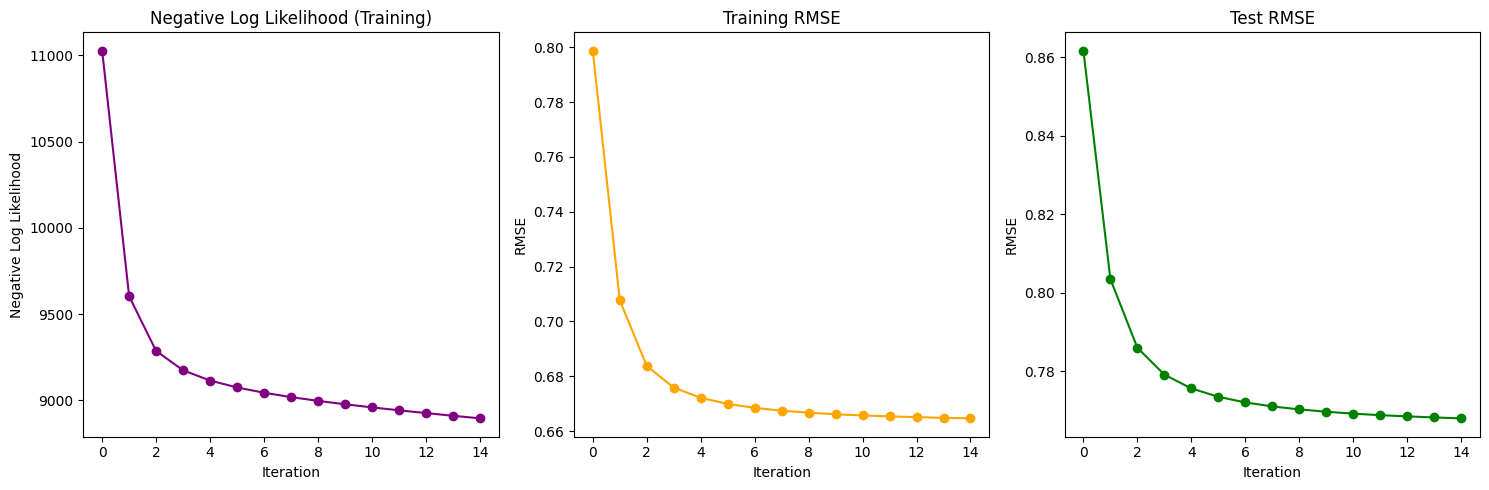


TRAINING COMPLETE
Final Train RMSE: 0.6647
Final Test RMSE: 0.7680
Average time per iteration: 50.09s


In [ ]:
# HYPERPARAMETERS

K = 32               # Number of latent factors
num_iters = 15       # Number of ALS iterations
lambda_reg = 0.001   # Regularization for latent factors (U, V)
tau = 0.05           # Regularization term for user/item vectors
gamma = 0.001        # Regularization for biases


M = n_users          # Number of users
N = n_movies         # Number of movies

print("\n" + "="*70)
print("INITIALIZING ALS MODEL")
print("="*70)
print(f"Users: {M:,}")
print(f"Movies: {N:,}")
print(f"Latent factors (K): {K}")
print(f"Iterations: {num_iters}")
print(f"λ (lambda_reg): {lambda_reg}")
print(f"τ (tau): {tau}")
print(f"γ (gamma): {gamma}")

# INITIALIZE BIASES AND LATENT FACTORS

user_biases = np.zeros(M, dtype=np.float32)
item_biases = np.zeros(N, dtype=np.float32)
U = ((1/math.sqrt(K)) * np.random.randn(M, K)).astype(np.float32)   # User latent factors
V = ((1/math.sqrt(K)) * np.random.randn(N, K)).astype(np.float32)   # Item latent factors

# For plotting
nll_history = []
rmse_train_history = []
rmse_test_history = []
iter_time_history = []   # to store time per iteration

# ALS TRAINING LOOP

print("\n" + "="*70)
print("TRAINING")
print("="*70)

for iter in range(num_iters):

    start_time = time.time()   # START TIMER

    # UPDATE USER BIASES AND LATENT VECTORS
    for m in range(M):
        items = get_user_train_ratings(m)
        if len(items) == 0: # if user has no ratings
            continue

        # Updated user bias
        movie_indices = items[:, 0].astype(np.int32)  # All movie indices for this user
        ratings = items[:, 1]  # All ratings
        # Vectorized prediction: item_biases[n] + U[m] @ V[n] for all n
        predictions = item_biases[movie_indices] + (U[m] @ V[movie_indices].T)
        residuals = ratings - predictions
        bias_sum = lambda_reg * np.sum(residuals)
        user_biases[m] = bias_sum / (lambda_reg * len(items) + gamma)

        # Update user latent vector
        movie_indices = items[:, 0].astype(np.int32)
        ratings = items[:, 1]
        V_subset = V[movie_indices]  # Shape: (num_items, K)
        residuals = ratings - user_biases[m] - item_biases[movie_indices]  # Shape: (num_items,)

        # Vectorized computation: A = λ Σ V[n] V[n]^T = λ V_subset^T @ V_subset
        A = lambda_reg * (V_subset.T @ V_subset) + tau * np.eye(K, dtype=np.float32)
        # Vectorized computation: b = λ Σ residual[n] * V[n] = λ V_subset^T @ residuals
        b = lambda_reg * (V_subset.T @ residuals)

        U[m] = np.linalg.solve(A, b)

    # UPDATE ITEM BIASES AND LATENT VECTORS
    for n in range(N):
        users = get_movie_train_ratings(n)
        if len(users) == 0:
            continue

        # Update item bias
        user_indices = users[:, 0].astype(np.int32)  # All user indices for this movie
        ratings = users[:, 1]  # All ratings
        # Vectorized prediction: user_biases[m] + U[m] @ V[n] for all m
        predictions = user_biases[user_indices] + (U[user_indices] @ V[n])
        residuals = ratings - predictions
        bias_sum = lambda_reg * np.sum(residuals)
        item_biases[n] = bias_sum / (lambda_reg * len(users) + gamma)

        # Update item latent vector
        user_indices = users[:, 0].astype(np.int32)
        ratings = users[:, 1]
        U_subset = U[user_indices]  # Shape: (num_users, K)
        residuals = ratings - user_biases[user_indices] - item_biases[n]  # Shape: (num_users,)

        # Vectorized computation: A = λ Σ U[m] U[m]^T = λ U_subset^T @ U_subset
        A = lambda_reg * (U_subset.T @ U_subset) + tau * np.eye(K, dtype=np.float32)
        # Vectorized computation: b = λ Σ residual[m] * U[m] = λ U_subset^T @ residuals
        b = lambda_reg * (U_subset.T @ residuals)

        V[n] = np.linalg.solve(A, b)

    # COMPUTE NEGATIVE LOG LIKELIHOOD (TRAINING)
    squared_error = 0
    count = 0

    for m in range(M):
        items = get_user_train_ratings(m)
        for i in range(len(items)):
            n = int(items[i, 0])  # movie_idx
            r = items[i, 1]        # rating
            pred = user_biases[m] + item_biases[n] + np.dot(U[m], V[n])
            squared_error += (r - pred) ** 2
            count += 1

    # Regularization terms
    reg_bias = np.sum(user_biases ** 2) + np.sum(item_biases ** 2)
    reg_factors = np.sum(U ** 2) + np.sum(V ** 2)

    # Log likelihood formula from slides
    log_likelihood = -(lambda_reg / 2) * squared_error - (tau / 2) * reg_factors - (gamma / 2) * reg_bias

    # Negative log likelihood (negate to get NLL)
    nll = -log_likelihood
    nll_history.append(nll)

    # Training RMSE
    rmse_train = np.sqrt(squared_error / count)
    rmse_train_history.append(rmse_train)

    # COMPUTE TEST RMSE
    squared_error_test = 0
    count_test = 0

    for m in range(M):
        items = get_user_test_ratings(m)
        for i in range(len(items)):
            n = int(items[i, 0])  # movie_idx
            r = items[i, 1]        # rating
            pred = user_biases[m] + item_biases[n] + np.dot(U[m], V[n])
            squared_error_test += (r - pred) ** 2
            count_test += 1

    rmse_test = np.sqrt(squared_error_test / count_test) if count_test > 0 else 0
    rmse_test_history.append(rmse_test)

    elapsed_time = time.time() - start_time   #  END TIMER
    iter_time_history.append(elapsed_time)

    print(f"Iteration {iter+1}/{num_iters}: "
          f"Train RMSE = {rmse_train:.4f}, Test RMSE = {rmse_test:.4f}, "
          f"NLL = {nll:.2f}, Time = {elapsed_time:.2f}s")

# PLOT RESULTS

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(nll_history, marker='o', color='purple')
plt.title("Negative Log Likelihood (Training)")
plt.xlabel("Iteration")
plt.ylabel("Negative Log Likelihood")

plt.subplot(1,3,2)
plt.plot(rmse_train_history, marker='o', color='orange')
plt.title("Training RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")

plt.subplot(1,3,3)
plt.plot(rmse_test_history, marker='o', color='green')
plt.title("Test RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("TRAINING COMPLETE")
print("="*70)
print(f"Final Train RMSE: {rmse_train_history[-1]:.4f}")
print(f"Final Test RMSE: {rmse_test_history[-1]:.4f}")
print(f"Average time per iteration: {np.mean(iter_time_history):.2f}s")


## Optimizing with Numba

In [ ]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from numba import njit, prange

### Hyperparameter Search with Optuna

In [21]:
# Numba helper functions

@njit
def cholesky_solve(A, b, K):
    """
    Solve Ax = b using Cholesky decomposition (A must be symmetric positive definite).
    This is 2x faster than general LU decomposition for SPD matrices.
    """
    # Cholesky decomposition: A = L @ L.T
    L = np.zeros((K, K), dtype=np.float32)

    for i in range(K):
        for j in range(i + 1):
            s = 0.0
            for k in range(j):
                s += L[i, k] * L[j, k]

            if i == j:
                val = A[i, i] - s
                if val > 0:
                    L[i, j] = np.sqrt(val)
                else:
                    L[i, j] = 1e-6  # Numerical stability
            else:
                if L[j, j] > 0:
                    L[i, j] = (A[i, j] - s) / L[j, j]
                else:
                    L[i, j] = 0.0

    # Forward substitution: L @ y = b
    y = np.zeros(K, dtype=np.float32)
    for i in range(K):
        s = 0.0
        for j in range(i):
            s += L[i, j] * y[j]
        if L[i, i] > 0:
            y[i] = (b[i] - s) / L[i, i]
        else:
            y[i] = 0.0

    # Backward substitution: L.T @ x = y
    x = np.zeros(K, dtype=np.float32)
    for i in range(K - 1, -1, -1):
        s = 0.0
        for j in range(i + 1, K):
            s += L[j, i] * x[j]  # L.T[i, j] = L[j, i]
        if L[i, i] > 0:
            x[i] = (y[i] - s) / L[i, i]
        else:
            x[i] = 0.0

    return x


@njit(parallel=True)
def update_all_users_numba(
    M, K, lambda_reg, tau, gamma,
    user_biases, item_biases, U, V,
    train_ratings_by_user,
    user_train_start
):
    """Update all user biases and latent factors in parallel."""
    for m in prange(M):
        start = user_train_start[m]
        end = user_train_start[m + 1]
        count = end - start

        if count == 0:
            continue

        # Update user bias
        bias_sum = 0.0
        for idx in range(start, end):
            n = np.int32(train_ratings_by_user[idx, 1])
            r = train_ratings_by_user[idx, 2]
            pred = item_biases[n]
            for k in range(K):
                pred += U[m, k] * V[n, k]
            bias_sum += lambda_reg * (r - pred)

        user_biases[m] = bias_sum / (lambda_reg * count + gamma)

        # Update user latent vector
        A = np.zeros((K, K), dtype=np.float32)
        b = np.zeros(K, dtype=np.float32)

        for idx in range(start, end):
            n = np.int32(train_ratings_by_user[idx, 1])
            r = train_ratings_by_user[idx, 2]
            residual = r - user_biases[m] - item_biases[n]

            for j in range(K):
                b[j] += lambda_reg * residual * V[n, j]
                for k in range(K):
                    A[j, k] += lambda_reg * V[n, j] * V[n, k]

        for j in range(K):
            A[j, j] += tau

        U[m] = cholesky_solve(A, b, K)


@njit(parallel=True)
def update_all_items_numba(
    N, K, lambda_reg, tau, gamma,
    user_biases, item_biases, U, V,
    train_ratings_by_movie,
    movie_train_start
):
    """Update all item biases and latent factors in parallel."""
    for n in prange(N):
        start = movie_train_start[n]
        end = movie_train_start[n + 1]
        count = end - start

        if count == 0:
            continue

        # Update item bias
        bias_sum = 0.0
        for idx in range(start, end):
            m = np.int32(train_ratings_by_movie[idx, 0])
            r = train_ratings_by_movie[idx, 2]
            pred = user_biases[m]
            for k in range(K):
                pred += U[m, k] * V[n, k]
            bias_sum += lambda_reg * (r - pred)

        item_biases[n] = bias_sum / (lambda_reg * count + gamma)

        # Update item latent vector
        A = np.zeros((K, K), dtype=np.float32)
        b = np.zeros(K, dtype=np.float32)

        for idx in range(start, end):
            m = np.int32(train_ratings_by_movie[idx, 0])
            r = train_ratings_by_movie[idx, 2]
            residual = r - user_biases[m] - item_biases[n]

            for j in range(K):
                b[j] += lambda_reg * residual * U[m, j]
                for k in range(K):
                    A[j, k] += lambda_reg * U[m, j] * U[m, k]

        for j in range(K):
            A[j, j] += tau

        V[n] = cholesky_solve(A, b, K)


@njit(parallel=True)
def compute_train_metrics_numba(
    M, K,
    user_biases, item_biases, U, V,
    train_ratings_by_user,
    user_train_start
):
    """Compute training squared error and count in parallel."""
    squared_error = 0.0
    count = 0

    for m in prange(M):
        start = user_train_start[m]
        end = user_train_start[m + 1]

        local_error = 0.0
        local_count = 0

        for idx in range(start, end):
            n = np.int32(train_ratings_by_user[idx, 1])
            r = train_ratings_by_user[idx, 2]

            pred = user_biases[m] + item_biases[n]
            for k in range(K):
                pred += U[m, k] * V[n, k]

            local_error += (r - pred) ** 2
            local_count += 1

        squared_error += local_error
        count += local_count

    return squared_error, count


@njit(parallel=True)
def compute_test_rmse_numba(
    M, K,
    user_biases, item_biases, U, V,
    test_ratings_by_user,
    user_test_start
):
    """Compute test squared error and count in parallel."""
    squared_error = 0.0
    count = 0

    for m in prange(M):
        start = user_test_start[m]
        end = user_test_start[m + 1]

        local_error = 0.0
        local_count = 0

        for idx in range(start, end):
            n = np.int32(test_ratings_by_user[idx, 1])
            r = test_ratings_by_user[idx, 2]

            pred = user_biases[m] + item_biases[n]
            for k in range(K):
                pred += U[m, k] * V[n, k]

            local_error += (r - pred) ** 2
            local_count += 1

        squared_error += local_error
        count += local_count

    return squared_error, count


In [15]:
# OBJECTIVE FUNCTION FOR OPTUNA
def objective(trial):
    """
    Optuna objective function to minimize test RMSE.
    Suggests hyperparameters and trains ALS model.
    """
    # SUGGEST HYPERPARAMETERS
    K = 32
    lambda_reg = trial.suggest_float('lambda_reg', 0.0001, 0.01, log=True)
    tau = trial.suggest_float('tau', 0.01, 0.1, log=True)
    gamma = trial.suggest_float('gamma', 0.0001, 0.01, log=True)
    
    # Fixed number of iterations for hyperparameter search
    num_iters = 10  # Reduced for faster search
    
    M = n_users
    N = n_movies
    
    # INITIALIZE BIASES AND LATENT FACTORS
    user_biases = np.zeros(M, dtype=np.float32)
    item_biases = np.zeros(N, dtype=np.float32)
    U = ((1/math.sqrt(K)) * np.random.randn(M, K)).astype(np.float32)
    V = ((1/math.sqrt(K)) * np.random.randn(N, K)).astype(np.float32)
    
    # ALS TRAINING LOOP
    for iter in range(num_iters):
        # UPDATE ALL USERS (PARALLEL)
        update_all_users_numba(
            M, K, lambda_reg, tau, gamma,
            user_biases, item_biases, U, V,
            train_ratings_by_user,
            user_train_start
        )
        
        # UPDATE ALL ITEMS (PARALLEL)
        update_all_items_numba(
            N, K, lambda_reg, tau, gamma,
            user_biases, item_biases, U, V,
            train_ratings_by_movie,
            movie_train_start
        )
    
    # COMPUTE FINAL TEST RMSE
    squared_error_test, count_test = compute_test_rmse_numba(
        M, K,
        user_biases, item_biases, U, V,
        test_ratings_by_user,
        user_test_start
    )
    
    rmse_test = np.sqrt(squared_error_test / count_test) if count_test > 0 else float('inf')
    
    return rmse_test


# RUN HYPERPARAMETER OPTIMIZATION
print("\n" + "="*70)
print("STARTING HYPERPARAMETER OPTIMIZATION WITH OPTUNA")
print("="*70)

study = optuna.create_study(
    direction='minimize',
    study_name='ALS_Hyperparameter_Search',
    sampler=optuna.samplers.TPESampler(seed=42)
)

study.optimize(objective, n_trials=50, show_progress_bar=True)

# PRINT BEST HYPERPARAMETERS
print("\n" + "="*70)
print("BEST HYPERPARAMETERS FOUND")
print("="*70)
print(f"Best Test RMSE: {study.best_value:.4f}")
print("Best Parameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")


[I 2026-01-08 21:01:32,751] A new study created in memory with name: ALS_Hyperparameter_Search



STARTING HYPERPARAMETER OPTIMIZATION WITH OPTUNA


Best trial: 0. Best value: 0.815614:   2%|▏         | 1/50 [00:50<41:22, 50.66s/it]

[I 2026-01-08 21:02:23,410] Trial 0 finished with value: 0.815614133989994 and parameters: {'lambda_reg': 0.0005611516415334506, 'tau': 0.08927180304353628, 'gamma': 0.0029106359131330704}. Best is trial 0 with value: 0.815614133989994.


Best trial: 1. Best value: 0.784912:   4%|▍         | 2/50 [01:35<37:50, 47.31s/it]

[I 2026-01-08 21:03:08,372] Trial 1 finished with value: 0.7849119386929767 and parameters: {'lambda_reg': 0.0015751320499779737, 'tau': 0.014322493718230255, 'gamma': 0.00020511104188433984}. Best is trial 1 with value: 0.7849119386929767.


Best trial: 1. Best value: 0.784912:   6%|▌         | 3/50 [02:20<36:05, 46.08s/it]

[I 2026-01-08 21:03:52,994] Trial 2 finished with value: 0.8799835156664945 and parameters: {'lambda_reg': 0.00013066739238053285, 'tau': 0.07348118405270448, 'gamma': 0.0015930522616241021}. Best is trial 1 with value: 0.7849119386929767.


Best trial: 1. Best value: 0.784912:   8%|▊         | 4/50 [03:04<34:53, 45.51s/it]

[I 2026-01-08 21:04:37,617] Trial 3 finished with value: 0.8088129316180517 and parameters: {'lambda_reg': 0.0026070247583707684, 'tau': 0.010485387725194618, 'gamma': 0.008706020878304856}. Best is trial 1 with value: 0.7849119386929767.


Best trial: 1. Best value: 0.784912:  10%|█         | 5/50 [03:49<33:57, 45.28s/it]

[I 2026-01-08 21:05:22,482] Trial 4 finished with value: 0.7995226953060633 and parameters: {'lambda_reg': 0.004622589001020831, 'tau': 0.016305687346221478, 'gamma': 0.0002310201887845295}. Best is trial 1 with value: 0.7849119386929767.


Best trial: 1. Best value: 0.784912:  12%|█▏        | 6/50 [04:34<33:00, 45.01s/it]

[I 2026-01-08 21:06:06,970] Trial 5 finished with value: 0.7879871980221317 and parameters: {'lambda_reg': 0.00023270677083837802, 'tau': 0.02014847788415866, 'gamma': 0.0011207606211860567}. Best is trial 1 with value: 0.7849119386929767.


Best trial: 6. Best value: 0.773197:  14%|█▍        | 7/50 [05:19<32:21, 45.15s/it]

[I 2026-01-08 21:06:52,404] Trial 6 finished with value: 0.7731972578207573 and parameters: {'lambda_reg': 0.0007309539835912913, 'tau': 0.019553708662745254, 'gamma': 0.0016738085788752138}. Best is trial 6 with value: 0.7731972578207573.


Best trial: 6. Best value: 0.773197:  16%|█▌        | 8/50 [06:04<31:34, 45.11s/it]

[I 2026-01-08 21:07:37,444] Trial 7 finished with value: 0.7893398461991787 and parameters: {'lambda_reg': 0.00019010245319870352, 'tau': 0.019594972058679168, 'gamma': 0.0005404103854647331}. Best is trial 6 with value: 0.7731972578207573.


Best trial: 6. Best value: 0.773197:  18%|█▊        | 9/50 [06:49<30:46, 45.04s/it]

[I 2026-01-08 21:08:22,340] Trial 8 finished with value: 0.7772608129875835 and parameters: {'lambda_reg': 0.000816845589476017, 'tau': 0.06097839109531514, 'gamma': 0.00025081156860452336}. Best is trial 6 with value: 0.7731972578207573.


Best trial: 9. Best value: 0.770221:  20%|██        | 10/50 [07:34<30:05, 45.13s/it]

[I 2026-01-08 21:09:07,666] Trial 9 finished with value: 0.7702208287227567 and parameters: {'lambda_reg': 0.0010677482709481358, 'tau': 0.03912141628549695, 'gamma': 0.0001238513729886094}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  22%|██▏       | 11/50 [08:20<29:20, 45.15s/it]

[I 2026-01-08 21:09:52,870] Trial 10 finished with value: 0.7927419401109854 and parameters: {'lambda_reg': 0.0077673538162370695, 'tau': 0.044663085503623856, 'gamma': 0.00010353677627159794}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  24%|██▍       | 12/50 [09:04<28:31, 45.04s/it]

[I 2026-01-08 21:10:37,643] Trial 11 finished with value: 0.7883431559801996 and parameters: {'lambda_reg': 0.0004939713749567098, 'tau': 0.03297608046763532, 'gamma': 0.0038079765727675992}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  26%|██▌       | 13/50 [09:49<27:41, 44.91s/it]

[I 2026-01-08 21:11:22,268] Trial 12 finished with value: 0.7739266644703465 and parameters: {'lambda_reg': 0.001444449151124076, 'tau': 0.02767072893445209, 'gamma': 0.0004672941588975314}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  28%|██▊       | 14/50 [10:33<26:46, 44.63s/it]

[I 2026-01-08 21:12:06,245] Trial 13 finished with value: 0.8035252085661688 and parameters: {'lambda_reg': 0.0002904047691849972, 'tau': 0.03400704030934091, 'gamma': 0.00204417653372072}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  30%|███       | 15/50 [11:18<26:10, 44.86s/it]

[I 2026-01-08 21:12:51,649] Trial 14 finished with value: 0.7838674197977278 and parameters: {'lambda_reg': 0.0026563564682186907, 'tau': 0.025655399267244278, 'gamma': 0.0005533628792381506}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  32%|███▏      | 16/50 [12:02<25:16, 44.59s/it]

[I 2026-01-08 21:13:35,617] Trial 15 finished with value: 0.7798727611478902 and parameters: {'lambda_reg': 0.0009259975782094843, 'tau': 0.047459681214408064, 'gamma': 0.005024910708235605}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  34%|███▍      | 17/50 [12:46<24:25, 44.42s/it]

[I 2026-01-08 21:14:19,622] Trial 16 finished with value: 0.7922402529550252 and parameters: {'lambda_reg': 0.0003940202051111415, 'tau': 0.04424420956359659, 'gamma': 0.001007315280108768}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  36%|███▌      | 18/50 [13:31<23:43, 44.50s/it]

[I 2026-01-08 21:15:04,308] Trial 17 finished with value: 0.777119576501467 and parameters: {'lambda_reg': 0.0014697079465040036, 'tau': 0.022373567760796388, 'gamma': 0.00014884623150573025}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  38%|███▊      | 19/50 [14:16<23:02, 44.59s/it]

[I 2026-01-08 21:15:49,128] Trial 18 finished with value: 0.7964796132234093 and parameters: {'lambda_reg': 0.0025253710106474536, 'tau': 0.010841143974536305, 'gamma': 0.0003553461288081732}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  40%|████      | 20/50 [15:02<22:28, 44.96s/it]

[I 2026-01-08 21:16:34,937] Trial 19 finished with value: 0.7751485682751061 and parameters: {'lambda_reg': 0.0008476798466510087, 'tau': 0.014832142813084705, 'gamma': 0.0008186282230228687}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  42%|████▏     | 21/50 [15:47<21:48, 45.11s/it]

[I 2026-01-08 21:17:20,403] Trial 20 finished with value: 0.7773974417036702 and parameters: {'lambda_reg': 0.0005742039214044841, 'tau': 0.03721491472855156, 'gamma': 0.0017580710554955968}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  44%|████▍     | 22/50 [16:32<20:59, 44.99s/it]

[I 2026-01-08 21:18:05,121] Trial 21 finished with value: 0.7752793589378371 and parameters: {'lambda_reg': 0.0015140300608029007, 'tau': 0.02517421689663378, 'gamma': 0.0004169408564985973}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  46%|████▌     | 23/50 [17:17<20:15, 45.00s/it]

[I 2026-01-08 21:18:50,141] Trial 22 finished with value: 0.7725150484656179 and parameters: {'lambda_reg': 0.00123623323300942, 'tau': 0.028386430220509875, 'gamma': 0.00010851117594648404}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  48%|████▊     | 24/50 [18:02<19:27, 44.90s/it]

[I 2026-01-08 21:19:34,803] Trial 23 finished with value: 0.7723545883965331 and parameters: {'lambda_reg': 0.0010017578776245046, 'tau': 0.05620067996319162, 'gamma': 0.0001042517078312589}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  50%|█████     | 25/50 [18:46<18:41, 44.87s/it]

[I 2026-01-08 21:20:19,613] Trial 24 finished with value: 0.7784721083589241 and parameters: {'lambda_reg': 0.004198624226096352, 'tau': 0.05815010994667463, 'gamma': 0.00011855711470410084}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  52%|█████▏    | 26/50 [19:31<17:56, 44.85s/it]

[I 2026-01-08 21:21:04,409] Trial 25 finished with value: 0.77076002231332 and parameters: {'lambda_reg': 0.0011843716028949118, 'tau': 0.054067678469034756, 'gamma': 0.0001580121603453051}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  54%|█████▍    | 27/50 [20:16<17:12, 44.90s/it]

[I 2026-01-08 21:21:49,430] Trial 26 finished with value: 0.7708308397022272 and parameters: {'lambda_reg': 0.001853864435459248, 'tau': 0.05757129576221104, 'gamma': 0.00017173986827767203}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  56%|█████▌    | 28/50 [21:01<16:26, 44.85s/it]

[I 2026-01-08 21:22:34,164] Trial 27 finished with value: 0.770292168715256 and parameters: {'lambda_reg': 0.0021769774467409317, 'tau': 0.0981357537089756, 'gamma': 0.00016999218310209536}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  58%|█████▊    | 29/50 [21:46<15:41, 44.82s/it]

[I 2026-01-08 21:23:18,908] Trial 28 finished with value: 0.7738640402090833 and parameters: {'lambda_reg': 0.003763945728128876, 'tau': 0.07600195090502787, 'gamma': 0.00029741868506367254}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  60%|██████    | 30/50 [22:31<14:56, 44.83s/it]

[I 2026-01-08 21:24:03,760] Trial 29 finished with value: 0.7868661600253491 and parameters: {'lambda_reg': 0.008666852170048898, 'tau': 0.07194322667832863, 'gamma': 0.00016646777078905102}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  62%|██████▏   | 31/50 [23:16<14:16, 45.09s/it]

[I 2026-01-08 21:24:49,450] Trial 30 finished with value: 0.7761103163577318 and parameters: {'lambda_reg': 0.005723339391474276, 'tau': 0.09412535844049055, 'gamma': 0.0007157932689148688}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  64%|██████▍   | 32/50 [24:01<13:29, 44.95s/it]

[I 2026-01-08 21:25:34,092] Trial 31 finished with value: 0.7719328673063213 and parameters: {'lambda_reg': 0.00206155260224796, 'tau': 0.05105260779398549, 'gamma': 0.00017149558581192262}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  66%|██████▌   | 33/50 [24:46<12:43, 44.88s/it]

[I 2026-01-08 21:26:18,814] Trial 32 finished with value: 0.7744055369933662 and parameters: {'lambda_reg': 0.0019707848626760406, 'tau': 0.038993312710154104, 'gamma': 0.00015162844858504387}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 9. Best value: 0.770221:  68%|██████▊   | 34/50 [25:30<11:57, 44.85s/it]

[I 2026-01-08 21:27:03,568] Trial 33 finished with value: 0.77715662980837 and parameters: {'lambda_reg': 0.0010894045831452669, 'tau': 0.08072115242249502, 'gamma': 0.00022395980524351648}. Best is trial 9 with value: 0.7702208287227567.


Best trial: 34. Best value: 0.769963:  70%|███████   | 35/50 [26:14<11:08, 44.56s/it]

[I 2026-01-08 21:27:47,471] Trial 34 finished with value: 0.7699628923647597 and parameters: {'lambda_reg': 0.0018404511845562272, 'tau': 0.06571702215432634, 'gamma': 0.0002988092072471755}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  72%|███████▏  | 36/50 [26:59<10:25, 44.68s/it]

[I 2026-01-08 21:28:32,413] Trial 35 finished with value: 0.7730804508190783 and parameters: {'lambda_reg': 0.0030897330789282284, 'tau': 0.06684733890761203, 'gamma': 0.00031577800510925195}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  74%|███████▍  | 37/50 [27:45<09:43, 44.90s/it]

[I 2026-01-08 21:29:17,828] Trial 36 finished with value: 0.7948080679542421 and parameters: {'lambda_reg': 0.0006838179678834206, 'tau': 0.08533820867254564, 'gamma': 0.00020785823853824664}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  76%|███████▌  | 38/50 [28:30<09:00, 45.04s/it]

[I 2026-01-08 21:30:03,187] Trial 37 finished with value: 0.7772783745899924 and parameters: {'lambda_reg': 0.0012923713471000365, 'tau': 0.09636390454399617, 'gamma': 0.000132284611460796}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  78%|███████▊  | 39/50 [29:15<08:16, 45.13s/it]

[I 2026-01-08 21:30:48,546] Trial 38 finished with value: 0.7730965799229488 and parameters: {'lambda_reg': 0.0031497544221276725, 'tau': 0.06653054513200057, 'gamma': 0.0002445842550755674}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  80%|████████  | 40/50 [29:59<07:27, 44.75s/it]

[I 2026-01-08 21:31:32,413] Trial 39 finished with value: 0.7879045534453182 and parameters: {'lambda_reg': 0.005300352743036807, 'tau': 0.03921056359349287, 'gamma': 0.0002750209506845373}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  82%|████████▏ | 41/50 [30:45<06:44, 44.97s/it]

[I 2026-01-08 21:32:17,898] Trial 40 finished with value: 0.7702859298586726 and parameters: {'lambda_reg': 0.0019476718267220198, 'tau': 0.0873573317304991, 'gamma': 0.0001970256274929137}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  84%|████████▍ | 42/50 [31:30<06:00, 45.10s/it]

[I 2026-01-08 21:33:03,289] Trial 41 finished with value: 0.7713588405341452 and parameters: {'lambda_reg': 0.001889605134943436, 'tau': 0.0994956517167745, 'gamma': 0.00019550630102637507}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  86%|████████▌ | 43/50 [32:15<05:15, 45.05s/it]

[I 2026-01-08 21:33:48,213] Trial 42 finished with value: 0.7703995636654756 and parameters: {'lambda_reg': 0.002396674483406963, 'tau': 0.08456709563051093, 'gamma': 0.0001308251865080016}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  88%|████████▊ | 44/50 [33:00<04:29, 44.99s/it]

[I 2026-01-08 21:34:33,089] Trial 43 finished with value: 0.7717815809007077 and parameters: {'lambda_reg': 0.0032151797828488507, 'tau': 0.08549187633393723, 'gamma': 0.00013083731704162347}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  90%|█████████ | 45/50 [33:44<03:43, 44.79s/it]

[I 2026-01-08 21:35:17,389] Trial 44 finished with value: 0.7699746006598083 and parameters: {'lambda_reg': 0.0024168936840505456, 'tau': 0.07547958376410095, 'gamma': 0.0003411599403558147}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  92%|█████████▏| 46/50 [34:28<02:58, 44.64s/it]

[I 2026-01-08 21:36:01,673] Trial 45 finished with value: 0.7702017796429557 and parameters: {'lambda_reg': 0.001723817078954853, 'tau': 0.06781064342542352, 'gamma': 0.00034114718418585426}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  94%|█████████▍| 47/50 [35:13<02:13, 44.54s/it]

[I 2026-01-08 21:36:45,995] Trial 46 finished with value: 0.8590826028665465 and parameters: {'lambda_reg': 0.0001327434453791919, 'tau': 0.06562536827079647, 'gamma': 0.00037559373339718084}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  96%|█████████▌| 48/50 [35:58<01:29, 44.78s/it]

[I 2026-01-08 21:37:31,328] Trial 47 finished with value: 0.7701332963355096 and parameters: {'lambda_reg': 0.0016743594773963087, 'tau': 0.07079996612855978, 'gamma': 0.0005320502951402759}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 34. Best value: 0.769963:  98%|█████████▊| 49/50 [36:43<00:44, 44.68s/it]

[I 2026-01-08 21:38:15,765] Trial 48 finished with value: 0.7977246459336604 and parameters: {'lambda_reg': 0.000571023378783343, 'tau': 0.07565207122693265, 'gamma': 0.000537704792470024}. Best is trial 34 with value: 0.7699628923647597.


Best trial: 49. Best value: 0.769781: 100%|██████████| 50/50 [37:27<00:00, 44.95s/it]

[I 2026-01-08 21:39:00,357] Trial 49 finished with value: 0.7697808797853302 and parameters: {'lambda_reg': 0.0014294959625414298, 'tau': 0.048503666378977205, 'gamma': 0.0012889651121564631}. Best is trial 49 with value: 0.7697808797853302.

BEST HYPERPARAMETERS FOUND
Best Test RMSE: 0.7698
Best Parameters:
  lambda_reg: 0.0014294959625414298
  tau: 0.048503666378977205
  gamma: 0.0012889651121564631



VISUALIZING OPTIMIZATION HISTORY


/tmp/ipykernel_4547/2103197362.py:7: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


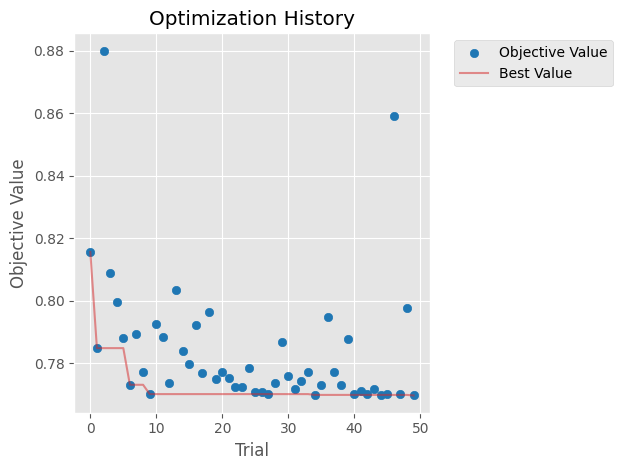

/tmp/ipykernel_4547/2103197362.py:14: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


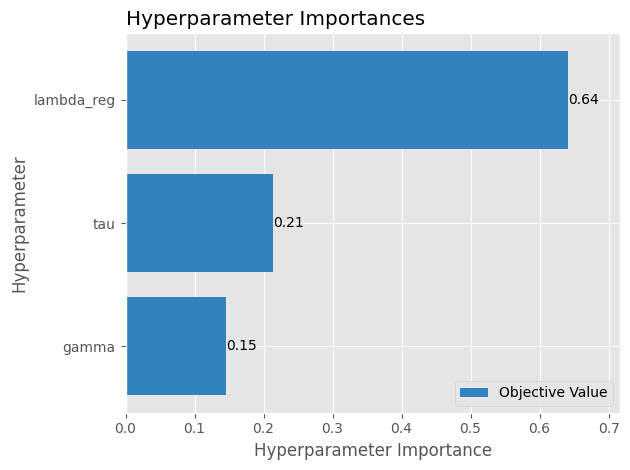

In [40]:
# VISUALIZE OPTIMIZATION
print("\n" + "="*70)
print("VISUALIZING OPTIMIZATION HISTORY")
print("="*70)

# 1. Optimization History
plot_optimization_history(study)
plt.title("Optimization History")
plt.tight_layout()
plt.savefig("optimization_history.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 2. Hyperparameter Importance
plot_param_importances(study)
plt.tight_layout()
plt.savefig("hyperparameter_importance.pdf", format="pdf", bbox_inches="tight")
plt.show()


STARTING GRID SEARCH FOR LATENT FACTORS (K)
Using optimal hyperparameters: lambda_reg=0.001429, tau=0.048504, gamma=0.001289

Training with K=2...
  Result: Test RMSE = 0.8169, Train RMSE = 0.7990

Training with K=4...
  Result: Test RMSE = 0.8002, Train RMSE = 0.7744

Training with K=8...
  Result: Test RMSE = 0.7833, Train RMSE = 0.7446

Training with K=16...
  Result: Test RMSE = 0.7708, Train RMSE = 0.7098

Training with K=32...
  Result: Test RMSE = 0.7677, Train RMSE = 0.6703

Training with K=64...
  Result: Test RMSE = 0.7727, Train RMSE = 0.6204


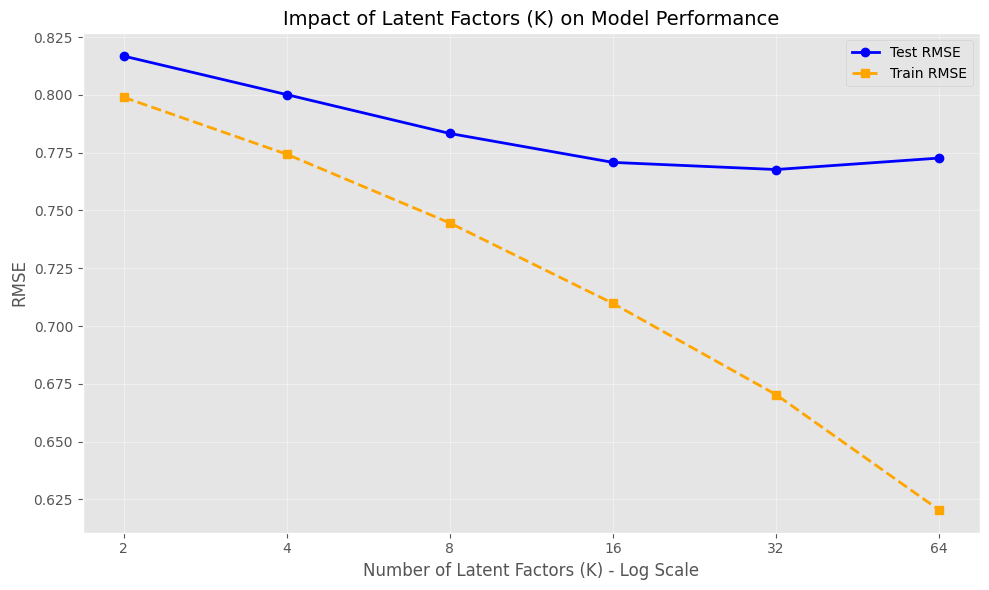

In [19]:
# GRID SEARCH TO FIND OPTIMAL K

print("\n" + "="*70)
print("STARTING GRID SEARCH FOR LATENT FACTORS (K)")
print("="*70)

# 1. Define K values to search
k_values = [2, 4, 8, 16, 32, 64]

# 2. Retrieve optimal hyperparameters (from previous Optuna study)
try:
    best_params = study.best_params
    lambda_reg = best_params['lambda_reg']
    tau = best_params['tau']
    gamma = best_params['gamma']
    print(f"Using optimal hyperparameters: lambda_reg={lambda_reg:.6f}, tau={tau:.6f}, gamma={gamma:.6f}")
except NameError:
    print("Warning: 'study' object not found. Using default hyperparameters.")
    lambda_reg = 0.001
    tau = 0.05
    gamma = 0.001

num_iters = 15  # Iterations for each K
results_k = {'K': [], 'Test RMSE': [], 'Train RMSE': []}

for K in k_values:
    print(f"\nTraining with K={K}...")
    
    # Initialize Matrices
    M = n_users
    N = n_movies
    user_biases = np.zeros(M, dtype=np.float32)
    item_biases = np.zeros(N, dtype=np.float32)
    U = ((1/math.sqrt(K)) * np.random.randn(M, K)).astype(np.float32)
    V = ((1/math.sqrt(K)) * np.random.randn(N, K)).astype(np.float32)
    
    # Training Loop
    rmse_train = 0
    for iter in range(num_iters):
        # Update Users
        update_all_users_numba(
            M, K, lambda_reg, tau, gamma,
            user_biases, item_biases, U, V,
            train_ratings_by_user,
            user_train_start
        )
        
        # Update Items
        update_all_items_numba(
            N, K, lambda_reg, tau, gamma,
            user_biases, item_biases, U, V,
            train_ratings_by_movie,
            movie_train_start
        )

        # Compute Train RMSE on final iteration
        if iter == num_iters - 1:
             squared_error, count = compute_train_metrics_numba(
                M, K, user_biases, item_biases, U, V,
                train_ratings_by_user, user_train_start
             )
             rmse_train = np.sqrt(squared_error / count)

    # Compute Test RMSE
    squared_error_test, count_test = compute_test_rmse_numba(
        M, K,
        user_biases, item_biases, U, V,
        test_ratings_by_user,
        user_test_start
    )
    rmse_test = np.sqrt(squared_error_test / count_test) if count_test > 0 else float('inf')
    
    print(f"  Result: Test RMSE = {rmse_test:.4f}, Train RMSE = {rmse_train:.4f}")
    
    results_k['K'].append(K)
    results_k['Test RMSE'].append(rmse_test)
    results_k['Train RMSE'].append(rmse_train)

# 3. Plotting RMSE vs K
plt.figure(figsize=(10, 6))
plt.plot(results_k['K'], results_k['Test RMSE'], marker='o', linewidth=2, label='Test RMSE', color='blue')
plt.plot(results_k['K'], results_k['Train RMSE'], marker='s', linewidth=2, linestyle='--', label='Train RMSE', color='orange')

plt.xscale('log', base=2)
plt.xticks(k_values, k_values)  # Show actual K values on axis
plt.xlabel('Number of Latent Factors (K) - Log Scale', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Impact of Latent Factors (K) on Model Performance', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.4)

plt.tight_layout()
plt.show()

### Numba-Optimized Training with Optimal Hyperparameters


INITIALIZING ALS MODEL (NUMBA OPTIMIZED)
Users: 200,948
Movies: 84,432
Latent factors (K): 32
Iterations: 50
λ (lambda_reg): 0.0014294
τ (tau): 0.048503
γ (gamma): 0.0012889

TRAINING (NUMBA OPTIMIZED)
Note: First iteration may be slower due to JIT compilation...
Iteration 1/50: Train RMSE = 0.8164, Test RMSE = 0.8683, NLL = 16218.13, Time = 5.18s
Iteration 2/50: Train RMSE = 0.7157, Test RMSE = 0.8079, NLL = 13720.79, Time = 4.68s
Iteration 3/50: Train RMSE = 0.6919, Test RMSE = 0.7884, NLL = 13175.87, Time = 4.72s
Iteration 4/50: Train RMSE = 0.6830, Test RMSE = 0.7805, NLL = 12968.15, Time = 4.86s
Iteration 5/50: Train RMSE = 0.6787, Test RMSE = 0.7764, NLL = 12857.45, Time = 4.77s
Iteration 6/50: Train RMSE = 0.6761, Test RMSE = 0.7739, NLL = 12786.27, Time = 4.77s
Iteration 7/50: Train RMSE = 0.6744, Test RMSE = 0.7722, NLL = 12734.76, Time = 4.62s
Iteration 8/50: Train RMSE = 0.6732, Test RMSE = 0.7709, NLL = 12694.46, Time = 4.77s
Iteration 9/50: Train RMSE = 0.6723, Test RMSE 

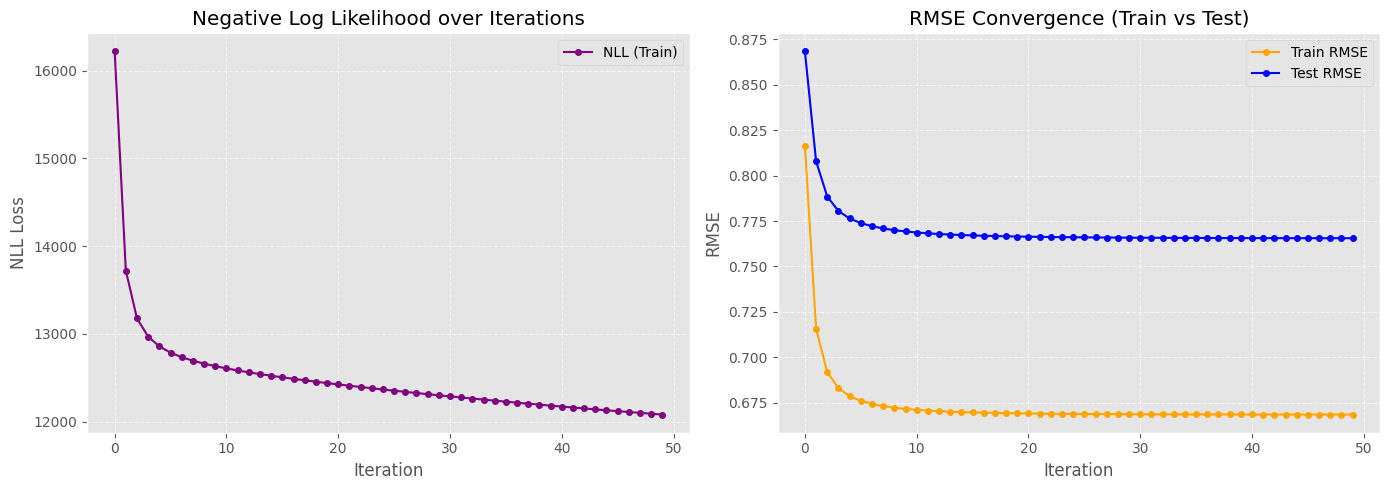


TRAINING COMPLETE (NUMBA OPTIMIZED)
Final Train RMSE: 0.6685
Final Test RMSE: 0.7655


In [ ]:
# Optimized Training Loop

# HYPERPARAMETERS
K = 32               # Number of latent factors
num_iters = 50       # Number of ALS iterations

lambda_reg = 0.0014294
tau = 0.048503
gamma = 0.0012889


M = n_users          # Number of users
N = n_movies         # Number of movies

print("\n" + "="*70)
print("INITIALIZING ALS MODEL (NUMBA OPTIMIZED)")
print("="*70)
print(f"Users: {M:,}")
print(f"Movies: {N:,}")
print(f"Latent factors (K): {K}")
print(f"Iterations: {num_iters}")
print(f"λ (lambda_reg): {lambda_reg}")
print(f"τ (tau): {tau}")
print(f"γ (gamma): {gamma}")

# INITIALIZE BIASES AND LATENT FACTORS

user_biases = np.zeros(M, dtype=np.float32)
item_biases = np.zeros(N, dtype=np.float32)
U = ((1/math.sqrt(K)) * np.random.randn(M, K)).astype(np.float32)   # User latent factors
V = ((1/math.sqrt(K)) * np.random.randn(N, K)).astype(np.float32)   # Item latent factors

# For plotting
nll_history = []
rmse_train_history = []
rmse_test_history = []

# ALS TRAINING LOOP (NUMBA OPTIMIZED)

print("\n" + "="*70)
print("TRAINING (NUMBA OPTIMIZED)")
print("="*70)
print("Note: First iteration may be slower due to JIT compilation...")

for iter in range(num_iters):
    iter_start = time.time()

    # UPDATE ALL USERS (PARALLEL)
    update_all_users_numba(
        M, K, lambda_reg, tau, gamma,
        user_biases, item_biases, U, V,
        train_ratings_by_user,
        user_train_start
    )

    # UPDATE ALL ITEMS (PARALLEL)
    update_all_items_numba(
        N, K, lambda_reg, tau, gamma,
        user_biases, item_biases, U, V,
        train_ratings_by_movie,
        movie_train_start
    )

    # COMPUTE TRAINING METRICS (PARALLEL)
    squared_error, count = compute_train_metrics_numba(
        M, K,
        user_biases, item_biases, U, V,
        train_ratings_by_user,
        user_train_start
    )

    # Regularization terms
    reg_bias = np.sum(user_biases ** 2) + np.sum(item_biases ** 2)
    reg_factors = np.sum(U ** 2) + np.sum(V ** 2)

    # Log likelihood formula from slides
    log_likelihood = -(lambda_reg / 2) * squared_error - (tau / 2) * reg_factors - (gamma / 2) * reg_bias

    # Negative log likelihood (negate to get NLL)
    nll = -log_likelihood
    nll_history.append(nll)

    # Training RMSE
    rmse_train = np.sqrt(squared_error / count)
    rmse_train_history.append(rmse_train)

    # COMPUTE TEST RMSE (PARALLEL)
    squared_error_test, count_test = compute_test_rmse_numba(
        M, K,
        user_biases, item_biases, U, V,
        test_ratings_by_user,
        user_test_start
    )

    rmse_test = np.sqrt(squared_error_test / count_test) if count_test > 0 else 0
    rmse_test_history.append(rmse_test)

    iter_time = time.time() - iter_start

    print(f"Iteration {iter+1}/{num_iters}: "
          f"Train RMSE = {rmse_train:.4f}, Test RMSE = {rmse_test:.4f}, "
          f"NLL = {nll:.2f}, Time = {iter_time:.2f}s")

# Plotting 
plt.figure(figsize=(14, 5)) # Adjusted size for better visibility

# Plot NLL
plt.subplot(1, 2, 1) 
plt.plot(nll_history, marker='o', markersize=4, color='purple', label='NLL (Train)')
plt.title("Negative Log Likelihood over Iterations")
plt.xlabel("Iteration")
plt.ylabel("NLL Loss")
plt.legend() # Shows label
plt.grid(True, linestyle='--', alpha=0.6) # Added grid for clarity

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(rmse_train_history, marker='o', markersize=4, color='orange', label='Train RMSE')
plt.plot(rmse_test_history, marker='o', markersize=4, color='blue', label='Test RMSE')
plt.title("RMSE Convergence (Train vs Test)")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend() # Shows labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('optimised_all_latent_factors_convergence_32M.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("TRAINING COMPLETE (NUMBA OPTIMIZED)")
print("="*70)
print(f"Final Train RMSE: {rmse_train_history[-1]:.4f}")
print(f"Final Test RMSE: {rmse_test_history[-1]:.4f}")

## Test with dummy user

In [23]:
# helper function for movie name from movie_id

import pandas as pd

movies = pd.read_csv("ml-32m/movies.csv")

def get_movie_name(movie_id):
    row = movies[movies["movieId"] == movie_id]
    return row.iloc[0]["title"]

In [27]:
# DUMMY USER SETUP

print("\n" + "="*70)
print("CREATING DUMMY USER FOR RECOMMENDATIONS")
print("="*70)

# Harry Potter movie (you can change this to any movie_id)
harry_potter_movie_id = 1 # 81834
rating_value = 5.0

# Get the movie index

harry_potter_idx = data.movie_id_to_idx[harry_potter_movie_id]
print(f"Movie ID: {harry_potter_movie_id}")
print(f"Movie Index: {harry_potter_idx}")
print(f"Rating: {rating_value}")

# Dummy user's ratings: [(movie_idx, rating)]
dummy_user_ratings = [(harry_potter_idx, rating_value)]

# TRAIN DUMMY USER (3 ITERATIONS)

print("\n" + "="*70)
print("TRAINING DUMMY USER")
print("="*70)

# Initialize dummy user's parameters
dummy_user_bias = 0.0
dummy_user_latent = np.zeros(K, dtype=np.float32)

num_dummy_iters = 3

for iter in range(num_dummy_iters):
    # Update dummy user bias
    bias_sum = 0
    for movie_idx, rating in dummy_user_ratings:
        pred = item_biases[movie_idx] + np.dot(dummy_user_latent, V[movie_idx])
        residual = rating - pred
        bias_sum += lambda_reg * residual

    dummy_user_bias = bias_sum / (lambda_reg * len(dummy_user_ratings) + gamma)

    # Update dummy user latent vector
    A = np.zeros((K, K), dtype=np.float32)
    b = np.zeros(K, dtype=np.float32)

    for movie_idx, rating in dummy_user_ratings:
        residual = rating - dummy_user_bias - item_biases[movie_idx]

        A += lambda_reg * np.outer(V[movie_idx], V[movie_idx])
        b += lambda_reg * residual * V[movie_idx]

    A += tau * np.eye(K, dtype=np.float32)
    dummy_user_latent = np.linalg.solve(A, b)

    print(f"Iteration {iter+1}/{num_dummy_iters}: bias = {dummy_user_bias:.4f}")

print(" Dummy user trained!")
print(f"  Final bias: {dummy_user_bias:.4f}")
print(f"  Latent vector norm: {np.linalg.norm(dummy_user_latent):.4f}")


CREATING DUMMY USER FOR RECOMMENDATIONS
Movie ID: 1
Movie Index: 0
Rating: 5.0

TRAINING DUMMY USER
Iteration 1/3: bias = 2.1261
Iteration 2/3: bias = 1.4344
Iteration 3/3: bias = 1.1848
 Dummy user trained!
  Final bias: 1.1848
  Latent vector norm: 0.2277


In [28]:
# COMPUTE RECOMMENDATION SCORES

print("\n" + "="*70)
print("COMPUTING RECOMMENDATION SCORES")
print("="*70)

# Compute scores for all movies
scores = np.zeros(N, dtype=np.float32)

for n in range(N):
    # Downweight item bias for better personalization
    scores[n] = np.dot(dummy_user_latent, V[n]) + 0.05 * item_biases[n]

# FILTER OUT LOW-RATED MOVIES

print("Filtering movies with fewer than 100 ratings...")

# Count ratings per movie in training set
movie_rating_counts = np.zeros(N, dtype=np.int32)
for n in range(N):
    movie_rating_counts[n] = movie_train_start[n+1] - movie_train_start[n]

# Create mask for movies with >= 100 ratings
popular_movies_mask = movie_rating_counts >= 100
num_popular = np.sum(popular_movies_mask)

print(f"Movies with >= 100 ratings: {num_popular:,}/{N:,}")

# Set scores of unpopular movies to (-inf) so they don't appear in recommendations
filtered_scores = scores.copy()
filtered_scores[~popular_movies_mask] = -np.inf

# GET TOP RECOMMENDATIONS

print("\n" + "="*70)
print("TOP 20 RECOMMENDATIONS")
print("="*70)

# Get top 20 movie indices
filtered_scores[harry_potter_idx] = -np.inf  # Don't recommend the movie they already rated

top_indices = np.argsort(filtered_scores)[::-1][:20]

print(f"\n{'Rank':<6} {'Movie ID':<12} {'# Movie Title':<12}")
print("-" * 50)

for rank, movie_idx in enumerate(top_indices, 1):
    movie_id = data.idx_to_movie_id[movie_idx]
    movie_name = get_movie_name(movie_id)
#   score = filtered_scores[movie_idx]
#   num_ratings = movie_rating_counts[movie_idx]
    print(f"{rank:<6} {movie_id:<12} {movie_name:}")



COMPUTING RECOMMENDATION SCORES
Filtering movies with fewer than 100 ratings...
Movies with >= 100 ratings: 11,732/84,432

TOP 20 RECOMMENDATIONS

Rank   Movie ID     # Movie Title
--------------------------------------------------
1      3114         Toy Story 2 (1999)
2      4886         Monsters, Inc. (2001)
3      6377         Finding Nemo (2003)
4      78499        Toy Story 3 (2010)
5      8961         Incredibles, The (2004)
6      4306         Shrek (2001)
7      2355         Bug's Life, A (1998)
8      68954        Up (2009)
9      364          Lion King, The (1994)
10     588          Aladdin (1992)
11     480          Jurassic Park (1993)
12     356          Forrest Gump (1994)
13     2028         Saving Private Ryan (1998)
14     8360         Shrek 2 (2004)
15     60069        WALL·E (2008)
16     134853       Inside Out (2015)
17     50872        Ratatouille (2007)
18     150          Apollo 13 (1995)
19     595          Beauty and the Beast (1991)
20     34           Bab

## Saving Model Parameters Locally

In [ ]:
import pickle

with open('users_latent.pkl', 'wb') as file:
    pickle.dump(U, file)
with open('movies_latent.pkl', 'wb') as file:
    pickle.dump(V, file)
with open('users_biases.pkl', 'wb') as file:
    pickle.dump(user_biases, file)
with open('movies_biases.pkl', 'wb') as file:
    pickle.dump(item_biases, file)

## Finding Most Polarizing Movies

In [30]:
# 1. Count ratings per movie
movie_rating_counts = np.zeros(N, dtype=int)
for movie_idx in range(N):
    start = movie_train_start[movie_idx]
    end = movie_train_start[movie_idx + 1]
    movie_rating_counts[movie_idx] = end - start

# 2. Helper
def has_enough_ratings(movie_idx, min_ratings=20):
    return movie_rating_counts[movie_idx] >= min_ratings

# 3. Norms
movie_norms = np.linalg.norm(V, axis=1)
sorted_desc = np.argsort(-movie_norms)   # descending
top_10 = []

for movie_idx in sorted_desc:
    if has_enough_ratings(movie_idx):
        movie_id = data.idx_to_movie_id[movie_idx]
        title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
        top_10.append((title, movie_id, movie_norms[movie_idx]))
        if len(top_10) == 10:
            break

print("\n=== TOP 10 MOST POLARIZING MOVIES ===")
for title, movie_id, norm in top_10:
    print(f"{title:60s} | ID={movie_id:6d} | norm={norm:.4f}")

sorted_asc = np.argsort(movie_norms)   # ascending
bottom_10 = []

for movie_idx in sorted_asc:
    if has_enough_ratings(movie_idx):
        movie_id = data.idx_to_movie_id[movie_idx]
        title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
        bottom_10.append((title, movie_id, movie_norms[movie_idx]))
        if len(bottom_10) == 10:
            break

print("\n=== BOTTOM 10 LEAST POLARIZING MOVIES ===")
for title, movie_id, norm in bottom_10:
    print(f"{title:60s} | ID={movie_id:6d} | norm={norm:.4f}")



=== TOP 10 MOST POLARIZING MOVIES ===
Lord of the Rings: The Fellowship of the Ring, The (2001)    | ID=  4993 | norm=10.8650
Lord of the Rings: The Return of the King, The (2003)        | ID=  7153 | norm=10.8307
Lord of the Rings: The Two Towers, The (2002)                | ID=  5952 | norm=10.6855
Forrest Gump (1994)                                          | ID=   356 | norm=10.6454
Star Wars: Episode IV - A New Hope (1977)                    | ID=   260 | norm=10.5705
Pulp Fiction (1994)                                          | ID=   296 | norm=10.2124
Star Wars: Episode V - The Empire Strikes Back (1980)        | ID=  1196 | norm=9.8794
Ace Ventura: Pet Detective (1994)                            | ID=   344 | norm=9.6023
Star Wars: Episode VI - Return of the Jedi (1983)            | ID=  1210 | norm=9.5384
Dumb & Dumber (Dumb and Dumber) (1994)                       | ID=   231 | norm=9.4768

=== BOTTOM 10 LEAST POLARIZING MOVIES ===
Love Me or Leave Me (1955)                

In [31]:
# Helper function: get ratings for a movie
def get_movie_train_ratings_array(movie_idx):
    """Return all training ratings for a movie as a numpy array"""
    ratings = get_movie_train_ratings(movie_idx)[:, 1]  # column 1 = rating
    return ratings

# Compute rating variance for each movie
movie_rating_var = np.zeros(N, dtype=np.float32)
min_ratings = 20  # filter out unpopular movies

for movie_idx in range(N):
    ratings = get_movie_train_ratings_array(movie_idx)
    if len(ratings) >= min_ratings:
        movie_rating_var[movie_idx] = np.var(ratings)
    else:
        movie_rating_var[movie_idx] = -1  # ignore movies with too few ratings

# Top 10 polarizing movies
top_10_idx = np.argsort(-movie_rating_var)[:10]

print("\n=== TOP 10 POLARIZING MOVIES ===")
for idx in top_10_idx:
    movie_id = data.idx_to_movie_id[idx]
    title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
    var = movie_rating_var[idx]
    print(f"{title:60s} | movieId={movie_id:6d} | rating variance={var:.4f}")



=== TOP 10 POLARIZING MOVIES ===
Twisted Pair (2018)                                          | movieId=194680 | rating variance=3.6233
Loose Change: Second Edition (2006)                          | movieId= 49872 | rating variance=3.4150
Fateful Findings (2013)                                      | movieId=148426 | rating variance=3.2815
What the Bleep! Down the Rabbit Hole (2006)                  | movieId=152143 | rating variance=3.2200
One Direction: This Is Us (2013)                             | movieId=104728 | rating variance=3.1373
Hillary's America: The Secret History Of The Democratic Party (2016) | movieId=161658 | rating variance=2.9722
Santa with Muscles (1996)                                    | movieId=  1311 | rating variance=2.9634
God's Not Dead 2 (2016)                                      | movieId=162660 | rating variance=2.8963
Kids of Survival (1996)                                      | movieId=  1319 | rating variance=2.8549
Unplanned (2019)               

In [ ]:
# Get top 10 most rated movies
sorted_by_ratings = np.argsort(-movie_rating_counts)
top_10_most_rated_idx = sorted_by_ratings[:10]

# Get top 10 polarizing movies (by L2 norm)
movie_norms = np.linalg.norm(V, axis=1)
sorted_desc = np.argsort(-movie_norms)

# Filter by minimum ratings
top_10_polarizing_idx = []
for movie_idx in sorted_desc:
    if has_enough_ratings(movie_idx):
        top_10_polarizing_idx.append(movie_idx)
        if len(top_10_polarizing_idx) == 10:
            break

# Convert to set for easy lookup
polarizing_set = set(top_10_polarizing_idx)

print("\n" + "="*90)
print("TOP 10 MOST RATED MOVIES (and their polarization status)")
print("="*90)

for rank, movie_idx in enumerate(top_10_most_rated_idx, 1):
    movie_id = data.idx_to_movie_id[movie_idx]
    title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
    count = movie_rating_counts[movie_idx]
    norm = movie_norms[movie_idx]
    
    # Check if in top 10 polarizing
    in_polarizing = " -> IN TOP 10 POLARIZING" if movie_idx in polarizing_set else ""
    
    print(f"{rank:2d}. {title:55s} | ratings={count:6d} | norm={norm:6.2f} {in_polarizing}")

print("\n" + "="*90)
print("OVERLAP ANALYSIS")
print("="*90)

overlap_count = len(polarizing_set.intersection(set(top_10_most_rated_idx)))
print(f"Number of movies in both top 10 most rated AND top 10 polarizing: {overlap_count}/10")




TOP 10 MOST RATED MOVIES (and their polarization status)
 1. Shawshank Redemption, The (1994)                        | ratings= 92669 | norm=  8.00 
 2. Forrest Gump (1994)                                     | ratings= 90342 | norm= 10.65 ✓ IN TOP 10 POLARIZING
 3. Pulp Fiction (1994)                                     | ratings= 88520 | norm= 10.21 ✓ IN TOP 10 POLARIZING
 4. Matrix, The (1999)                                      | ratings= 84376 | norm=  9.37 
 5. Silence of the Lambs, The (1991)                        | ratings= 81310 | norm=  9.04 
 6. Star Wars: Episode IV - A New Hope (1977)               | ratings= 76435 | norm= 10.57 ✓ IN TOP 10 POLARIZING
 7. Fight Club (1999)                                       | ratings= 69584 | norm=  8.33 
 8. Jurassic Park (1993)                                    | ratings= 67883 | norm=  8.36 
 9. Schindler's List (1993)                                 | ratings= 66532 | norm=  8.53 
10. Lord of the Rings: The Fellowship of the Rin

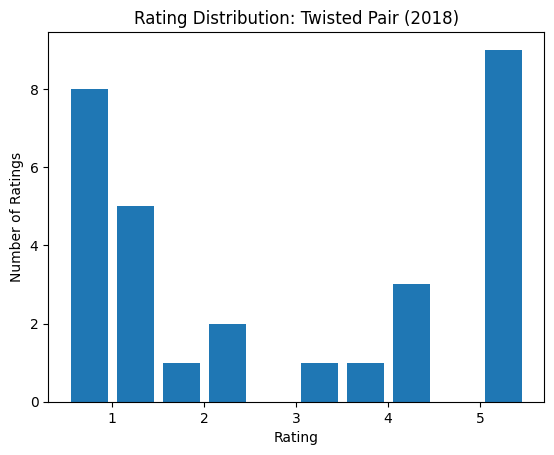

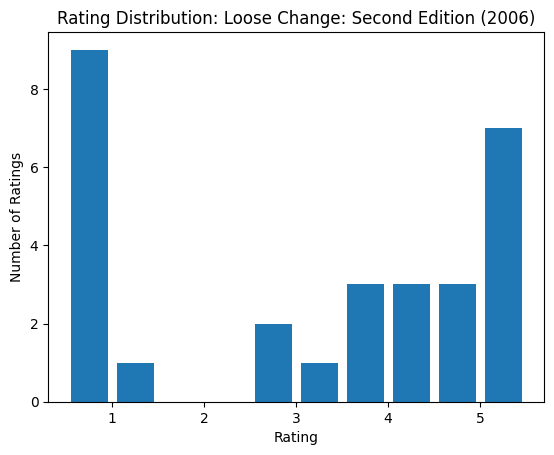

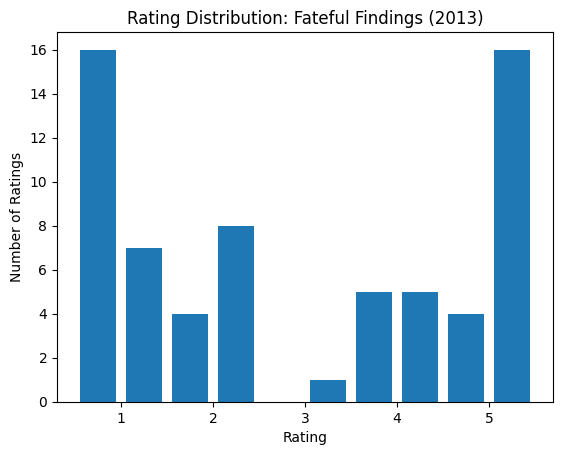

In [ ]:
import matplotlib.pyplot as plt

# Take the top 3 polarizing movies
top_3_idx = top_10_idx[:3]

for idx in top_3_idx:
    movie_id = data.idx_to_movie_id[idx]
    title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
    ratings = get_movie_train_ratings_array(idx)

    plt.figure()
    plt.hist(ratings, bins=np.arange(0.5, 5.6, 0.5), rwidth=0.8)
    plt.xticks([1, 2, 3, 4, 5])
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.title(f"Rating Distribution: {title}")
    plt.show()


## 2D Vector Embeddings

In [ ]:
# %matplotlib inline

def plot_movie_embeddings(movie_ids, movies_latent, movies_biases, movie_to_idx, movies_df):
    """
    Plots 2D embeddings of selected movies, scaled by movie biases.

    Parameters:
        movie_ids (list): List of movie IDs to plot
        movies_latent (np.ndarray): Latent matrix V, shape (n_movies, k)
        movies_biases (np.ndarray): Movie biases, shape (n_movies,)
        movie_to_idx (dict): Mapping from movieId to row index in movies_latent
        movies_df (pd.DataFrame): Movies dataframe with "movieId" and "title"
    """
    # Extract latent vectors and biases
    selected_vectors = np.array([movies_latent[movie_to_idx[movie_id], :] for movie_id in movie_ids])
    selected_biases = np.array([movies_biases[movie_to_idx[movie_id]] for movie_id in movie_ids])

    # Scale vectors to highlight movies with higher bias
    scaled_vectors = selected_vectors * (1 + 0.05 * selected_biases[:, np.newaxis])

    plt.figure(figsize=(20, 10))

    for i, movie_id in enumerate(movie_ids):
        title = movies_df.loc[movies_df["movieId"] == movie_id, "title"].iloc[0]
        x, y = scaled_vectors[i, 0], scaled_vectors[i, 1]
        plt.scatter(x, y, s=100, label=title)
        plt.text(x + 0.01, y + 0.01, title, fontsize=9)  # offset for clarity

    plt.title("2D Embeddings of Selected Movies (Scaled by Bias)")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.grid(True)
    plt.legend(loc="upper left", fontsize="small", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig("2d_embeddings.svg")
    plt.show()


# Example movie IDs
movie_ids = [78772, 72407, 91104, 8957,8368,364, 48, 588, 1022,207027,167780, 1688, 131739, 140115,1907, 5816, 40815, 595, 7153, 4993, 1,  39446, 48877, 55577]
plot_movie_embeddings(movie_ids, V, item_biases, data.movie_id_to_idx, movies)


In [ ]:
from sklearn.decomposition import PCA


def plot_movie_embeddings_pca(movie_ids, movies_latent, movies_biases, movie_to_idx, movies_df):
    """
    Reduces latent dimensions to 2D using PCA and plots movie embeddings.

    Parameters:
        movie_ids (list): Movie IDs to visualize
        movies_latent (np.ndarray): Latent matrix V (n_movies × k)
        movies_biases (np.ndarray): Movie bias vector (n_movies,)
        movie_to_idx (dict): Mapping from movieId -> row index in latent matrix
        movies_df (pd.DataFrame): Movies dataframe (movieId, title)
    """

    # ---- 1. PCA on full latent matrix ----
    pca = PCA(n_components=2)
    V_2d = pca.fit_transform(movies_latent)   # shape (n_movies, 2)

    # ---- 2. Extract embeddings for selected movies ----
    x_vals = []
    y_vals = []
    titles = []

    for movie_id in movie_ids:
        idx = movie_to_idx[movie_id]
        x_vals.append(V_2d[idx, 0])
        y_vals.append(V_2d[idx, 1])
        titles.append(movies_df.loc[movies_df["movieId"] == movie_id, "title"].iloc[0])

    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)

    # ---- 3. Scaling points by bias (optional but cool) ----
    selected_biases = np.array([movies_biases[movie_to_idx[m]] for m in movie_ids])
    scale = 1 + 0.05 * selected_biases  # small bias-based scaling

    # ---- 4. Plot ----
    plt.figure(figsize=(22, 12))

    for i, title in enumerate(titles):
        plt.scatter(x_vals[i], y_vals[i], s=120 * scale[i], alpha=0.8)
        plt.text(x_vals[i] + 0.01, y_vals[i] + 0.01, title, fontsize=9)

    plt.title("Movie Embeddings (PCA Reduction to 2D)", fontsize=16)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("movie_embeddings_pca.pdf", format="pdf")
    plt.show()

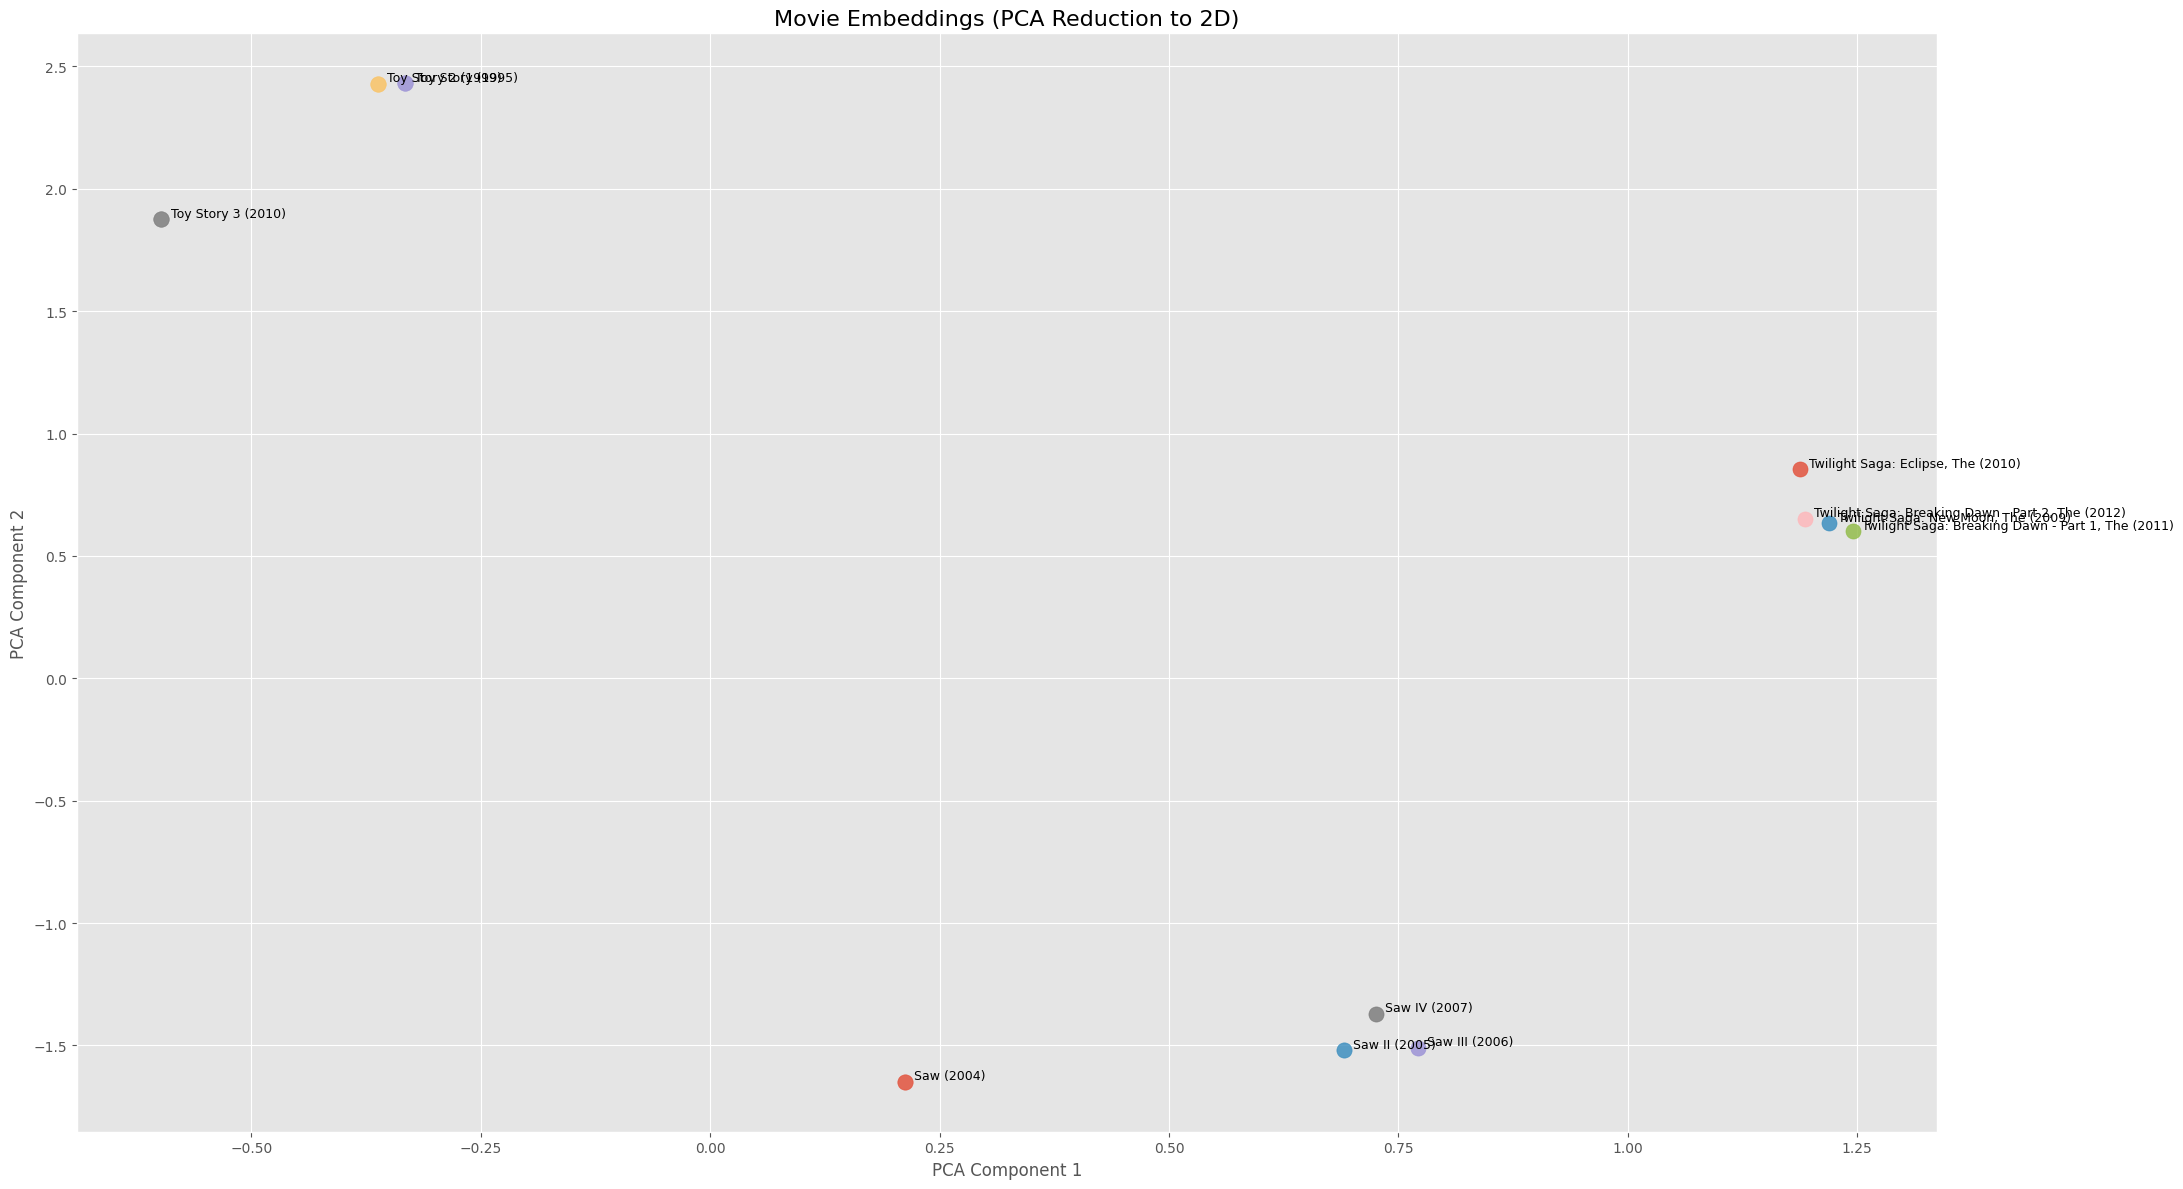

In [34]:
"""movie_ids = [
    78772, 72407, 91104, 8957, 8368,
    364, 48, 588, 1022, 207027,
    167780, 1688, 131739, 140115, 1907,
    5816, 40815, 595, 7153, 4993,
    1, 39446, 48877, 55577
]"""
movie_ids = [78772, 72407,1, 78499,3114, 91104, 98203, 8957, 39446, 48877, 55577]

plot_movie_embeddings_pca(
    movie_ids,
    V,
    item_biases,
    data.movie_id_to_idx,
    movies
)


# Practical 5: Genre Integration

Adding genre metadata to improve recommendations and enable cold-start predictions

## Load Genre Data

### Genre Loading Functions

In [42]:
def load_genre_data(movies_csv_path, movie_id_to_idx):
    """
    Load genre information from movies.csv
    
    Returns:
    --------
    genre_to_idx : dict
        Maps genre name (str) -> genre index (int)
    idx_to_genre : list
        Maps genre index -> genre name
    movie_to_genres : list of lists
        movie_to_genres[movie_idx] = [genre_idx1, genre_idx2, ...]
    """
    print("\n" + "="*70)
    print("LOADING GENRE INFORMATION")
    print("="*70)
    
    genre_to_idx = {}
    idx_to_genre = []
    movie_to_genres = [[] for _ in range(len(movie_id_to_idx))]
    
    with open(movies_csv_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        
        movies_processed = 0
        movies_with_genres = 0
        
        for row in reader:
            if len(row) < 3:
                continue
                
            movie_id = int(row[0])
            # Last column contains genres like "Adventure|Animation|Children"
            genres_str = row[-1]
            
            # Skip movies not in our ratings dataset
            if movie_id not in movie_id_to_idx:
                continue
            
            movies_processed += 1
            movie_idx = movie_id_to_idx[movie_id]
            
            # Parse genres
            if genres_str and genres_str != "(no genres listed)":
                genres = genres_str.split('|')
                movies_with_genres += 1
                
                for genre in genres:
                    genre = genre.strip()
                    
                    # Add new genre to mapping
                    if genre not in genre_to_idx:
                        genre_idx = len(genre_to_idx)
                        genre_to_idx[genre] = genre_idx
                        idx_to_genre.append(genre)
                    else:
                        genre_idx = genre_to_idx[genre]
                    
                    movie_to_genres[movie_idx].append(genre_idx)
    
    print(f"✓ Processed {movies_processed:,} movies")
    print(f"✓ Movies with genres: {movies_with_genres:,}")
    print(f"✓ Unique genres: {len(genre_to_idx)}")
    print(f"✓ Average genres per movie: {np.mean([len(g) for g in movie_to_genres if g]):.2f}")
    
    # Print all genres found
    print("\nGenres found:")
    for idx, genre in enumerate(idx_to_genre):
        count = sum(1 for genres in movie_to_genres if idx in genres)
        print(f"  {idx:2d}. {genre:20s} ({count:,} movies)")
    
    return genre_to_idx, idx_to_genre, movie_to_genres


def build_genre_to_movies(movie_to_genres, n_genres):
    """
    Build reverse mapping: genre_idx -> list of movie_idx that have this genre
    
    This is needed for efficient genre update step.
    
    Returns:
    --------
    genre_to_movies : list of numpy arrays
        genre_to_movies[genre_idx] = np.array([movie_idx1, movie_idx2, ...])
    """
    print("\nBuilding genre-to-movies mapping...")
    
    # First pass: count movies per genre
    genre_counts = [0] * n_genres
    for movie_idx, genres in enumerate(movie_to_genres):
        for genre_idx in genres:
            genre_counts[genre_idx] += 1
    
    # Second pass: allocate and fill arrays
    genre_to_movies = [np.zeros(count, dtype=np.int32) for count in genre_counts]
    genre_positions = [0] * n_genres
    
    for movie_idx, genres in enumerate(movie_to_genres):
        for genre_idx in genres:
            pos = genre_positions[genre_idx]
            genre_to_movies[genre_idx][pos] = movie_idx
            genre_positions[genre_idx] += 1
    
    print("✓ Genre-to-movies mapping built")
    return genre_to_movies


def prepare_genre_data_for_numba(movie_to_genres, genre_to_movies, N, G):
    """
    Convert Python lists to flat numpy arrays that Numba can use efficiently.
    
    Returns:
    --------
    movie_to_genres_flat : np.array (int32)
        All genre indices concatenated
    movie_genre_start : np.array (int32, size N+1)
        movie_genre_start[n] = start index in movie_to_genres_flat for movie n
    genre_to_movies_flat : np.array (int32)
        All movie indices concatenated
    genre_movie_start : np.array (int32, size G+1)
        genre_movie_start[f] = start index in genre_to_movies_flat for genre f
    """
    print("\nPreparing genre data for Numba...")
    
    # Flatten movie -> genres
    movie_to_genres_flat = []
    movie_genre_start = np.zeros(N + 1, dtype=np.int32)
    
    for n in range(N):
        movie_genre_start[n] = len(movie_to_genres_flat)
        movie_to_genres_flat.extend(movie_to_genres[n])
    movie_genre_start[N] = len(movie_to_genres_flat)
    
    movie_to_genres_flat = np.array(movie_to_genres_flat, dtype=np.int32)
    
    # Flatten genre -> movies
    genre_to_movies_flat = []
    genre_movie_start = np.zeros(G + 1, dtype=np.int32)
    
    for f in range(G):
        genre_movie_start[f] = len(genre_to_movies_flat)
        genre_to_movies_flat.extend(genre_to_movies[f])
    genre_movie_start[G] = len(genre_to_movies_flat)
    
    genre_to_movies_flat = np.array(genre_to_movies_flat, dtype=np.int32)
    
    print(f"✓ Movie-to-genres array: {len(movie_to_genres_flat):,} entries")
    print(f"✓ Genre-to-movies array: {len(genre_to_movies_flat):,} entries")
    
    return movie_to_genres_flat, movie_genre_start, genre_to_movies_flat, genre_movie_start

### Loading Genre Data

In [ ]:
# Load genre information
genre_to_idx, idx_to_genre, movie_to_genres = load_genre_data(
    "ml-32m/movies.csv", 
    data.movie_id_to_idx
)

# Build reverse mapping
genre_to_movies = build_genre_to_movies(
    movie_to_genres, 
    len(genre_to_idx)
)

# Prepare genre data structures for Numba
movie_to_genres_flat, movie_genre_start, \
genre_to_movies_flat, genre_movie_start = \
    prepare_genre_data_for_numba(
        movie_to_genres,
        genre_to_movies,
        n_movies,
        len(genre_to_idx)
    )

# Store genre count for later use
n_genres = len(genre_to_idx)

print("\n✓ Ready for genre-integrated training!")
print(f"  Genres: {n_genres}")
print(f"  Movies: {n_movies}")
print(f"  Users: {n_users}")



LOADING GENRE INFORMATION
✓ Processed 84,432 movies
✓ Movies with genres: 77,877
✓ Unique genres: 19
✓ Average genres per movie: 1.83

Genres found:
   0. Adventure            (5,156 movies)
   1. Animation            (4,586 movies)
   2. Children             (4,447 movies)
   3. Comedy               (22,448 movies)
   4. Fantasy              (3,784 movies)
   5. Romance              (10,048 movies)
   6. Drama                (33,152 movies)
   7. Action               (9,296 movies)
   8. Crime                (6,704 movies)
   9. Thriller             (11,555 movies)
  10. Horror               (8,468 movies)
  11. Mystery              (3,894 movies)
  12. Sci-Fi               (4,797 movies)
  13. IMAX                 (195 movies)
  14. Documentary          (9,103 movies)
  15. War                  (2,225 movies)
  16. Musical              (1,033 movies)
  17. Western              (1,489 movies)
  18. Film-Noir            (350 movies)

Building genre-to-movies mapping...
✓ Genre-to-movi


## Genre-Integrated ALS with Numba

Modified ALS implementation that incorporates genre information as hierarchical priors.

In [44]:
# NEW FUNCTION: compute_movie_priors_numba 
@njit(parallel=True)
def compute_movie_priors_numba(N, K, movie_to_genres_flat, movie_genre_start, W, V_prior):
    """
    Compute prior for each movie: average of its genre embeddings
    
    Parameters:
    -----------
    N : int
        Number of movies
    K : int
        Latent dimension
    movie_to_genres_flat : np.array (int32)
        Flattened array of all genre indices for all movies
    movie_genre_start : np.array (int32)
        Index array: movie n's genres are in movie_to_genres_flat[start[n]:start[n+1]]
    W : np.array (float32, shape G x K)
        Genre embeddings
    V_prior : np.array (float32, shape N x K) [OUTPUT]
        Will be filled with movie priors
    """
    for n in prange(N):
        start = movie_genre_start[n]
        end = movie_genre_start[n + 1]
        n_genres = end - start
        
        if n_genres == 0:
            # No genres: prior is zero
            for k in range(K):
                V_prior[n, k] = 0.0
        else:
            # Prior = average of genre embeddings
            for k in range(K):
                sum_val = 0.0
                for idx in range(start, end):
                    genre_idx = movie_to_genres_flat[idx]
                    sum_val += W[genre_idx, k]
                V_prior[n, k] = sum_val / n_genres


# MODIFIED FUNCTION: update_all_items_with_genres_numba 
@njit(parallel=True)
def update_all_items_with_genres_numba(
    N, K, lambda_reg, tau, gamma,
    user_biases, item_biases, U, V, V_prior,
    train_ratings_by_movie,
    movie_train_start
):
    """
    Update all item biases and latent factors with genre regularization.
    
    KEY CHANGE: Instead of regularizing V[n] toward 0, we regularize toward V_prior[n]
    """
    for n in prange(N):
        start = movie_train_start[n]
        end = movie_train_start[n + 1]
        count = end - start

        if count == 0:
            # No ratings: set V[n] = V_prior[n]
            for k in range(K):
                V[n, k] = V_prior[n, k]
            continue

        # Update item bias
        bias_sum = 0.0
        for idx in range(start, end):
            m = np.int32(train_ratings_by_movie[idx, 0])
            r = train_ratings_by_movie[idx, 2]
            pred = user_biases[m]
            for k in range(K):
                pred += U[m, k] * V[n, k]
            bias_sum += lambda_reg * (r - pred)

        item_biases[n] = bias_sum / (lambda_reg * count + gamma)

        # Update item latent vector (WITH GENRE PRIOR)
        A = np.zeros((K, K), dtype=np.float32)
        b = np.zeros(K, dtype=np.float32)

        for idx in range(start, end):
            m = np.int32(train_ratings_by_movie[idx, 0])
            r = train_ratings_by_movie[idx, 2]
            residual = r - user_biases[m] - item_biases[n]

            for j in range(K):
                b[j] += lambda_reg * residual * U[m, j]
                for k in range(K):
                    A[j, k] += lambda_reg * U[m, j] * U[m, k]

        # Add regularization: tau * I for A, and tau * V_prior[n] for b
        for j in range(K):
            A[j, j] += tau
            b[j] += tau * V_prior[n, j]  # <-- MAIN ADDITION

        V[n] = cholesky_solve(A, b, K)


# NEW FUNCTION: update_all_genres_numba 
@njit(parallel=True)
def update_all_genres_numba(G, K, tau, eta, W, V, genre_to_movies_flat, genre_movie_start):
    """
    Update genre embeddings.
    
    For each genre f:
    W[f] = (tau * sum_{n in M(f)} V[n]) / (tau * |M(f)| + eta)
    
    This is a weighted average of all movie embeddings that have this genre.
    """
    for f in prange(G):
        start = genre_movie_start[f]
        end = genre_movie_start[f + 1]
        n_movies = end - start
        
        if n_movies == 0:
            # No movies with this genre: set to zero
            for k in range(K):
                W[f, k] = 0.0
            continue
        
        # W[f] = weighted average of movie embeddings
        denominator = tau * n_movies + eta
        
        for k in range(K):
            numerator = 0.0
            for idx in range(start, end):
                movie_idx = genre_to_movies_flat[idx]
                numerator += tau * V[movie_idx, k]
            
            W[f, k] = numerator / denominator


### Training loop

In [ ]:
# HYPERPARAMETERS
K = 32               # Number of latent factors
num_iters = 25       # Number of ALS iterations
eta = 0.01           # NEW: Regularization for genre embeddings

lambda_reg = 0.0014294
tau = 0.048503
gamma = 0.0012889

M = n_users          # Number of users
N = n_movies         # Number of movies
G = n_genres         # NEW: Number of genres

print("\n" + "="*70)
print("INITIALIZING ALS MODEL WITH GENRES (NUMBA OPTIMIZED)")
print("="*70)
print(f"Users: {M:,}")
print(f"Movies: {N:,}")
print(f"Genres: {G}")
print(f"Latent factors (K): {K}")
print(f"Iterations: {num_iters}")
print(f"λ (lambda_reg): {lambda_reg}")
print(f"τ (tau): {tau}")
print(f"γ (gamma): {gamma}")
print(f"η (eta): {eta}")

# INITIALIZE BIASES AND LATENT FACTORS

user_biases = np.zeros(M, dtype=np.float32)
item_biases = np.zeros(N, dtype=np.float32)
U = ((1/math.sqrt(K)) * np.random.randn(M, K)).astype(np.float32)   # User latent factors
V = ((1/math.sqrt(K)) * np.random.randn(N, K)).astype(np.float32)   # Item latent factors
W = ((1/math.sqrt(K)) * np.random.randn(G, K)).astype(np.float32)   # NEW: Genre embeddings

# Preallocate prior array
V_prior = np.zeros((N, K), dtype=np.float32)

# For plotting
nll_history = []
rmse_train_history = []
rmse_test_history = []

# ALS TRAINING LOOP (WITH GENRES)

print("\n" + "="*70)
print("TRAINING (NUMBA OPTIMIZED WITH GENRES)")
print("="*70)
print("Note: First iteration may be slower due to JIT compilation...")

for iter in range(num_iters):
    iter_start = time.time()
    
    # STEP 1: COMPUTE MOVIE PRIORS FROM CURRENT GENRE EMBEDDINGS
    compute_movie_priors_numba(
        N, K,
        movie_to_genres_flat,
        movie_genre_start,
        W,
        V_prior
    )
    
    # STEP 2: UPDATE ALL USERS (unchanged from standard ALS)
    update_all_users_numba(
        M, K, lambda_reg, tau, gamma,
        user_biases, item_biases, U, V,
        train_ratings_by_user,
        user_train_start
    )
    
    # STEP 3: UPDATE ALL ITEMS (with genre regularization)
    update_all_items_with_genres_numba(
        N, K, lambda_reg, tau, gamma,
        user_biases, item_biases, U, V, V_prior,
        train_ratings_by_movie,
        movie_train_start
    )
    
    # STEP 4: UPDATE ALL GENRES (NEW STEP)
    update_all_genres_numba(
        G, K, tau, eta,
        W, V,
        genre_to_movies_flat,
        genre_movie_start
    )
    
    # COMPUTE TRAINING METRICS 
    squared_error, count = compute_train_metrics_numba(
        M, K,
        user_biases, item_biases, U, V,
        train_ratings_by_user,
        user_train_start
    )
    
    # Regularization terms (ADD genre regularization)
    reg_bias = np.sum(user_biases ** 2) + np.sum(item_biases ** 2)
    reg_factors = np.sum(U ** 2) + np.sum((V - V_prior) ** 2)  
    reg_genres = np.sum(W ** 2)  # NEW
    
    # Log likelihood formula (with genre term)
    log_likelihood = (
        -(lambda_reg / 2) * squared_error 
        - (tau / 2) * reg_factors 
        - (gamma / 2) * reg_bias
        - (eta / 2) * reg_genres  #
    )
    
    nll = -log_likelihood
    nll_history.append(nll)
    
    # Training RMSE
    rmse_train = np.sqrt(squared_error / count)
    rmse_train_history.append(rmse_train)
    
    # COMPUTE TEST RMSE 
    squared_error_test, count_test = compute_test_rmse_numba(
        M, K,
        user_biases, item_biases, U, V,
        test_ratings_by_user,
        user_test_start
    )
    
    rmse_test = np.sqrt(squared_error_test / count_test) if count_test > 0 else 0
    rmse_test_history.append(rmse_test)
    
    iter_time = time.time() - iter_start
    
    print(f"Iteration {iter+1}/{num_iters}: "
          f"Train RMSE = {rmse_train:.4f}, Test RMSE = {rmse_test:.4f}, "
          f"NLL = {nll:.2f}, Time = {iter_time:.2f}s")

print("\n" + "="*70)
print("TRAINING COMPLETE (WITH GENRES)")
print("="*70)
print(f"Final Train RMSE: {rmse_train_history[-1]:.4f}")
print(f"Final Test RMSE: {rmse_test_history[-1]:.4f}")


INITIALIZING ALS MODEL WITH GENRES (NUMBA OPTIMIZED)
Users: 200,948
Movies: 84,432
Genres: 19
Latent factors (K): 32
Iterations: 25
λ (lambda_reg): 0.0014294
τ (tau): 0.048503
γ (gamma): 0.0012889
η (eta): 0.01

TRAINING (NUMBA OPTIMIZED WITH GENRES)
Note: First iteration may be slower due to JIT compilation...
Iteration 1/25: Train RMSE = 0.8150, Test RMSE = 0.8662, NLL = 16141.30, Time = 6.88s
Iteration 2/25: Train RMSE = 0.7136, Test RMSE = 0.8048, NLL = 13609.84, Time = 4.95s
Iteration 3/25: Train RMSE = 0.6907, Test RMSE = 0.7865, NLL = 13082.48, Time = 4.88s
Iteration 4/25: Train RMSE = 0.6821, Test RMSE = 0.7791, NLL = 12875.96, Time = 4.76s
Iteration 5/25: Train RMSE = 0.6778, Test RMSE = 0.7752, NLL = 12764.25, Time = 4.74s
Iteration 6/25: Train RMSE = 0.6752, Test RMSE = 0.7728, NLL = 12693.03, Time = 4.74s
Iteration 7/25: Train RMSE = 0.6736, Test RMSE = 0.7713, NLL = 12642.09, Time = 4.70s
Iteration 8/25: Train RMSE = 0.6724, Test RMSE = 0.7702, NLL = 12602.45, Time = 4.64

### Plotting

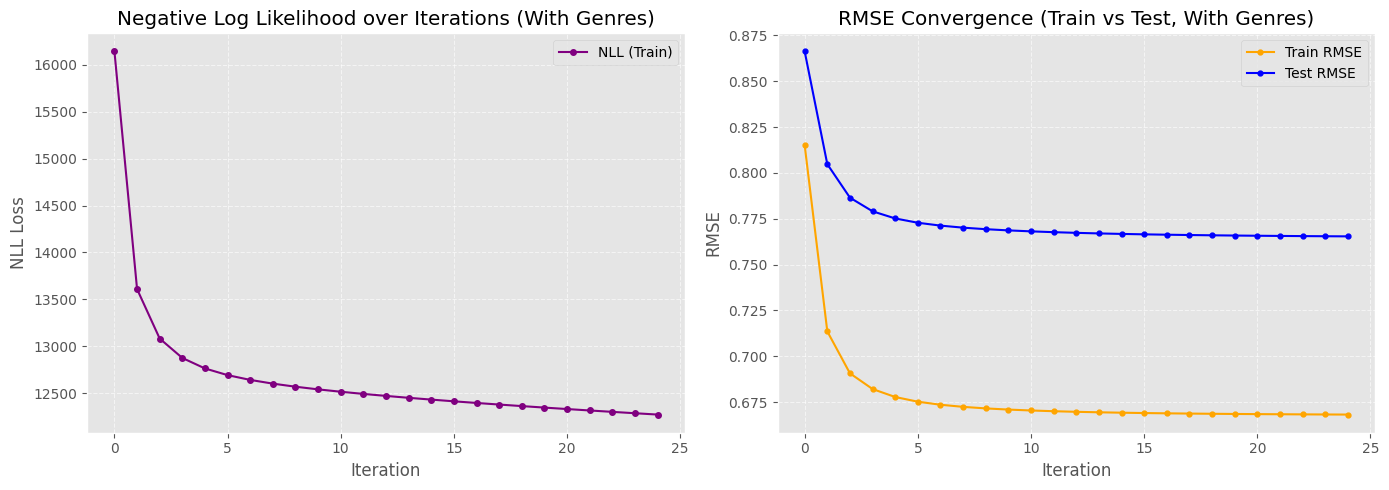

In [100]:
# Plotting
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(nll_history, marker='o', markersize=4, color='purple', label='NLL (Train)')
plt.title("Negative Log Likelihood over Iterations (With Genres)")
plt.xlabel("Iteration")
plt.ylabel("NLL Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(rmse_train_history, marker='o', markersize=3.5, color='orange', label='Train RMSE')
plt.plot(rmse_test_history, marker='o', markersize=3.5, color='blue', label='Test RMSE')
plt.title("RMSE Convergence (Train vs Test, With Genres)")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() 
plt.savefig("genre_integration_convergence.pdf", format="pdf")
plt.show()

## Genre Embedding Visualization (K=2 only)

Reducing 32D embeddings to 2D using PCA...
  PC1 explains: 63.10% of variance
  PC2 explains: 15.61% of variance
  Total explained: 78.71%

✓ Saved genre embedding plot to genre_embeddings_k32_pca.pdf


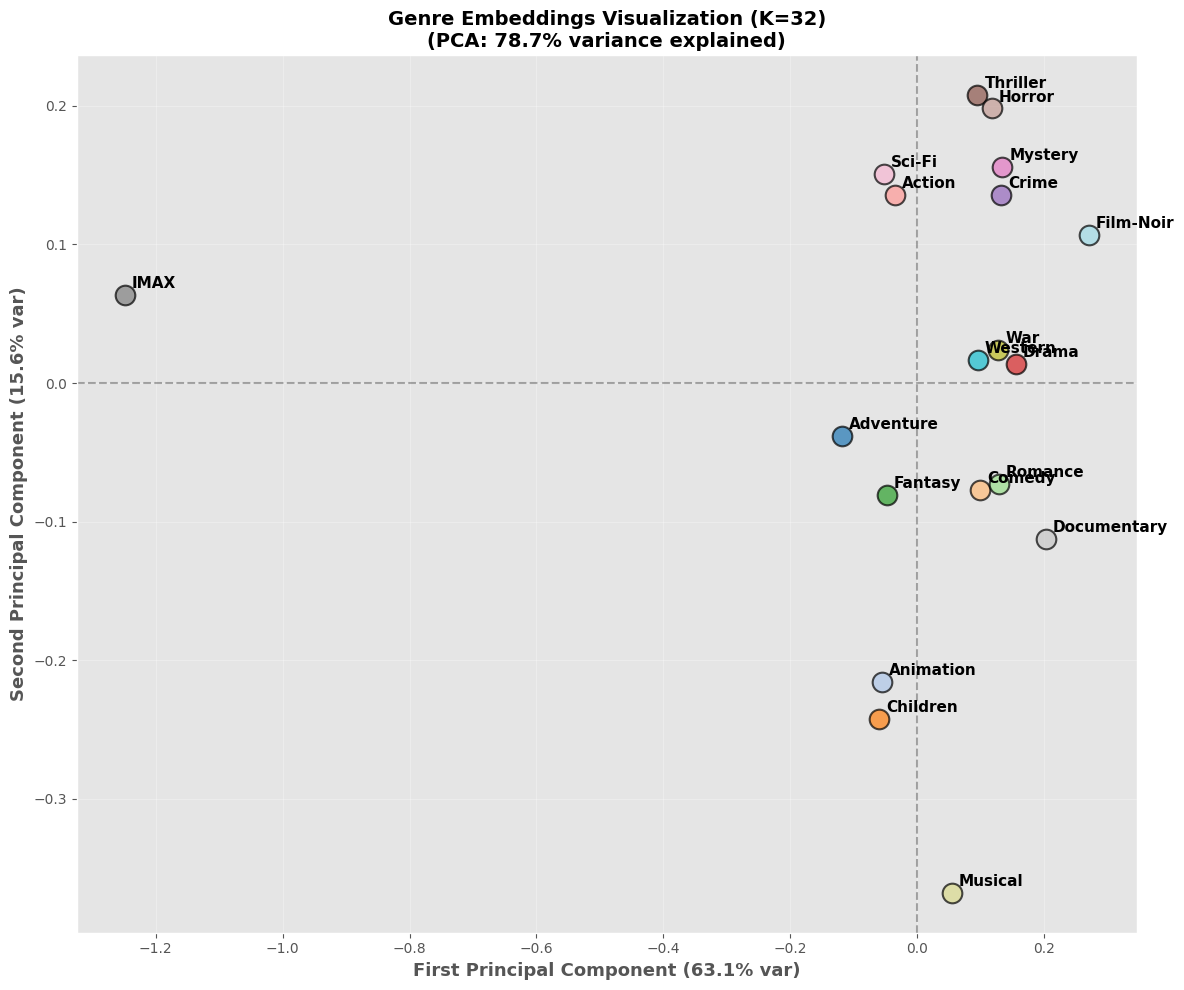


GENRE SIMILARITY ANALYSIS

✓ Most similar genre pairs (closest in embedding space):
  Thriller             <-> Mystery              : distance = 0.103
  Crime                <-> Mystery              : distance = 0.114
  Animation            <-> Children             : distance = 0.119
  Crime                <-> Thriller             : distance = 0.132
  Comedy               <-> Romance              : distance = 0.140
  Romance              <-> Drama                : distance = 0.141
  Adventure            <-> Fantasy              : distance = 0.143
  Drama                <-> War                  : distance = 0.145
  Thriller             <-> Horror               : distance = 0.161
  Drama                <-> Crime                : distance = 0.167

✗ Most dissimilar genre pairs (furthest in embedding space):
  Comedy               <-> IMAX                 : distance = 1.374
  IMAX                 <-> Musical              : distance = 1.386
  IMAX                 <-> War                  :

In [51]:
def plot_genre_embeddings_2d(W, idx_to_genre, save_path=None):
    """
    Plot 2D genre embeddings
    - If K=2: Plot directly
    - If K>2: Use PCA to reduce to 2D
    
    This is required for your report!
    """
    from sklearn.decomposition import PCA
    from sklearn.metrics.pairwise import euclidean_distances
    
    K = W.shape[1]
    
    # Get 2D coordinates
    if K == 2:
        # Direct plotting
        x = W[:, 0]
        y = W[:, 1]
        title_suffix = "(2D Embeddings - No Reduction)"
        print("Plotting 2D genre embeddings directly (K=2)")
    else:
        # Use PCA for dimensionality reduction
        print(f"Reducing {K}D embeddings to 2D using PCA...")
        pca = PCA(n_components=2)
        W_2d = pca.fit_transform(W)
        x = W_2d[:, 0]
        y = W_2d[:, 1]
        
        explained_var = pca.explained_variance_ratio_
        total_var = sum(explained_var)
        title_suffix = f"(PCA: {total_var*100:.1f}% variance explained)"
        
        print(f"  PC1 explains: {explained_var[0]*100:.2f}% of variance")
        print(f"  PC2 explains: {explained_var[1]*100:.2f}% of variance")
        print(f"  Total explained: {total_var*100:.2f}%")
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot each genre as a point
    colors = plt.cm.tab20(np.linspace(0, 1, len(idx_to_genre)))
    
    for genre_idx, genre_name in enumerate(idx_to_genre):
        ax.scatter(x[genre_idx], y[genre_idx], 
                  s=200, alpha=0.7, 
                  color=colors[genre_idx],
                  edgecolors='black', linewidth=1.5)
        ax.annotate(genre_name, (x[genre_idx], y[genre_idx]), 
                   fontsize=11, fontweight='bold',
                   xytext=(5, 5), textcoords='offset points')
    
    # Labels and styling
    if K == 2:
        ax.set_xlabel('Latent Dimension 1', fontsize=13, fontweight='bold')
        ax.set_ylabel('Latent Dimension 2', fontsize=13, fontweight='bold')
    else:
        ax.set_xlabel(f'First Principal Component ({explained_var[0]*100:.1f}% var)', 
                     fontsize=13, fontweight='bold')
        ax.set_ylabel(f'Second Principal Component ({explained_var[1]*100:.1f}% var)', 
                     fontsize=13, fontweight='bold')
    
    ax.set_title(f'Genre Embeddings Visualization (K={K})\n{title_suffix}', 
                fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)
        print(f"\n✓ Saved genre embedding plot to {save_path}")
    
    plt.show()
    
    # ===== SIMILARITY ANALYSIS =====
    print("\n" + "="*70)
    print("GENRE SIMILARITY ANALYSIS")
    print("="*70)
    
    # Use original high-dimensional embeddings for distance calculation
    # (More accurate than using PCA-reduced version)
    distances = euclidean_distances(W)
    
    # Compute all pairwise distances
    pairs = []
    for i in range(len(W)):
        for j in range(i+1, len(W)):
            pairs.append((idx_to_genre[i], idx_to_genre[j], distances[i, j]))
    
    # Sort by distance
    pairs.sort(key=lambda x: x[2])
    
    print("\n✓ Most similar genre pairs (closest in embedding space):")
    for g1, g2, dist in pairs[:10]:
        print(f"  {g1:20s} <-> {g2:20s} : distance = {dist:.3f}")
    
    print("\n✗ Most dissimilar genre pairs (furthest in embedding space):")
    for g1, g2, dist in pairs[-10:]:
        print(f"  {g1:20s} <-> {g2:20s} : distance = {dist:.3f}")
    
    # Additional statistics
    distances_flat = distances[np.triu_indices_from(distances, k=1)]
    print("\nDistance Statistics:")
    print(f"  Mean pairwise distance: {distances_flat.mean():.3f}")
    print(f"  Std dev: {distances_flat.std():.3f}")
    print(f"  Min distance: {distances_flat.min():.3f}")
    print(f"  Max distance: {distances_flat.max():.3f}")


# ===== USAGE EXAMPLES =====

# Example 1: If you trained with K=2
if K == 2:
    plot_genre_embeddings_2d(W, idx_to_genre, save_path='genre_embeddings_k2.pdf')

# Example 2: If you trained with K=32 (or any K > 2)
elif K > 2:
    plot_genre_embeddings_2d(W, idx_to_genre, save_path=f'genre_embeddings_k{K}_pca.pdf')

# Example 3: Compare K=2 vs K=32
# First train with K=2, then:
# plot_genre_embeddings_2d(W_k2, idx_to_genre, 'genre_k2.pdf')
# Then train with K=32, then:
# plot_genre_embeddings_2d(W_k32, idx_to_genre, 'genre_k32_pca.pdf')

✓ Saved genre similarity heatmap to genre_cosine_similarity_k32.pdf


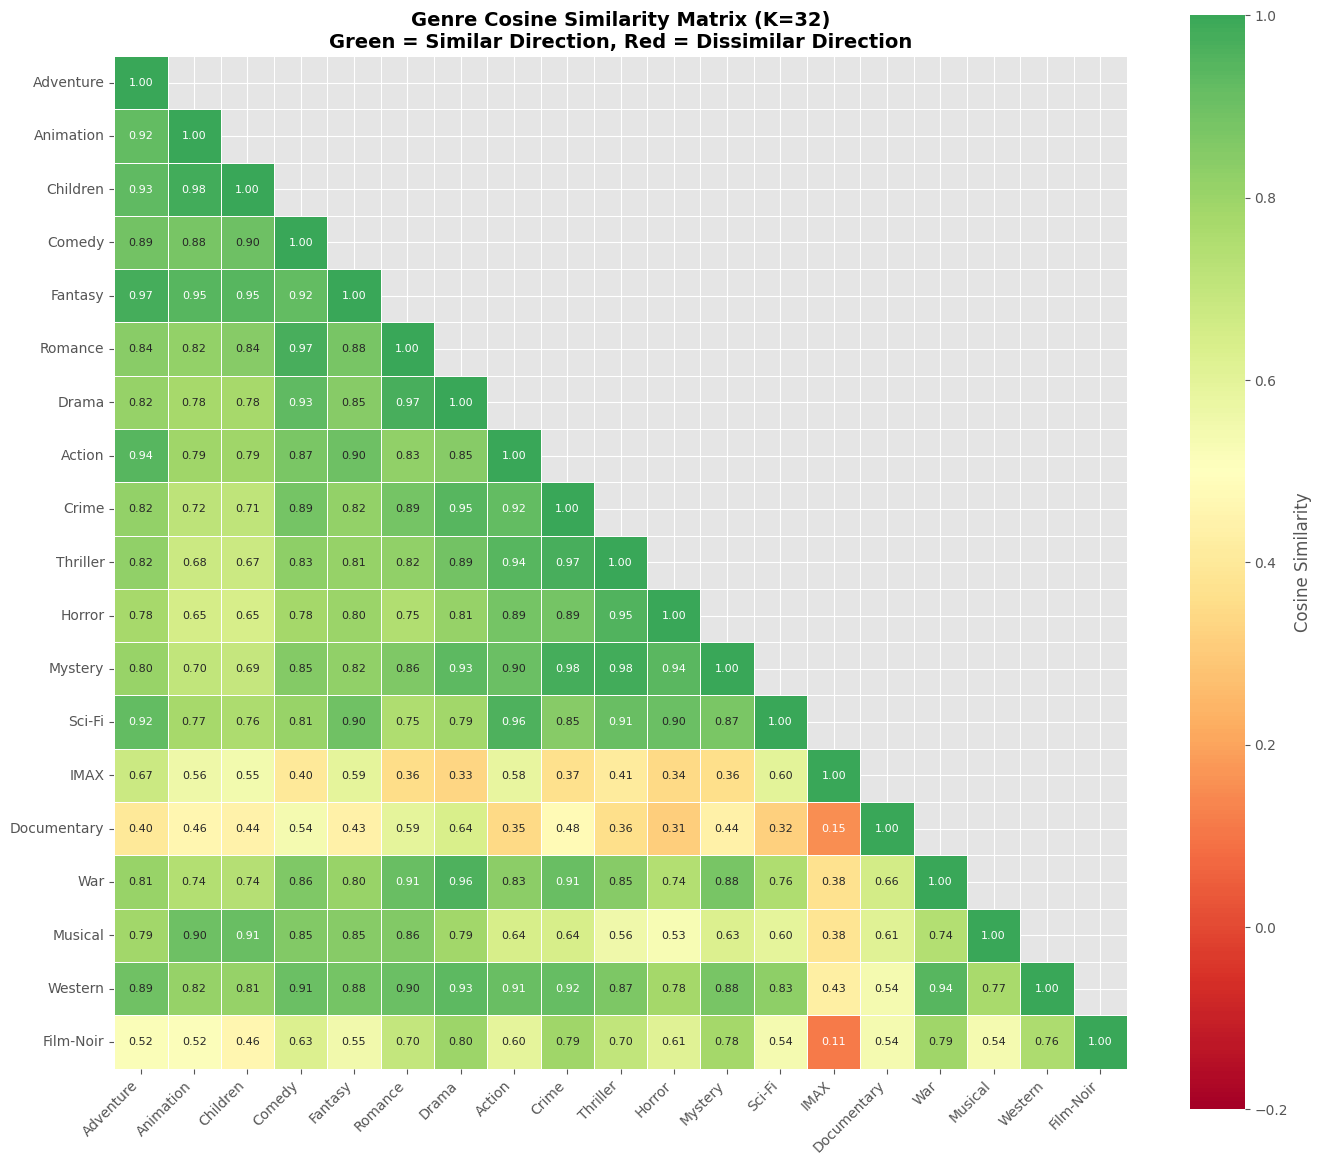


Cosine Similarity Statistics (K=32):
  Average pairwise similarity: 0.740
  Std dev: 0.190
  Range: [0.111, 0.983]

✓ Most similar (highest cosine similarity):
  Animation            <-> Children             : 0.983
  Thriller             <-> Mystery              : 0.983
  Crime                <-> Mystery              : 0.975
  Adventure            <-> Fantasy              : 0.974
  Crime                <-> Thriller             : 0.970
  Romance              <-> Drama                : 0.969
  Comedy               <-> Romance              : 0.968
  Drama                <-> War                  : 0.962
  Action               <-> Sci-Fi               : 0.958
  Thriller             <-> Horror               : 0.955

✗ Most dissimilar (lowest cosine similarity):
  Thriller             <-> Documentary          : 0.362
  Mystery              <-> IMAX                 : 0.359
  Romance              <-> IMAX                 : 0.358
  Action               <-> Documentary          : 0.347
  Horror

In [53]:
def plot_genre_similarity_heatmap(W, idx_to_genre, save_path=None):
    """Cosine similarity heatmap - complements Euclidean distance analysis"""
    from sklearn.metrics.pairwise import cosine_similarity
    import seaborn as sns
    
    # Compute cosine similarity
    similarities = cosine_similarity(W)
    
    # Create figure
    plt.figure(figsize=(14, 12))
    
    # Create heatmap
    mask = np.triu(np.ones_like(similarities, dtype=bool), k=1)  # Mask upper triangle
    
    sns.heatmap(similarities, 
                mask=mask,  # Only show lower triangle
                xticklabels=idx_to_genre,
                yticklabels=idx_to_genre,
                cmap='RdYlGn',  # Red = dissimilar (low cosine), Green = similar (high cosine)
                center=0.5,
                vmin=-0.2, vmax=1.0,
                annot=True,  # Show numbers
                fmt='.2f',
                annot_kws={'size': 8},
                cbar_kws={'label': 'Cosine Similarity'},
                square=True,
                linewidths=0.5,
                linecolor='white')
    
    plt.title(f'Genre Cosine Similarity Matrix (K={W.shape[1]})\n'
              f'Green = Similar Direction, Red = Dissimilar Direction', 
              fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)
        print(f"✓ Saved genre similarity heatmap to {save_path}")
    
    plt.show()
    
    # Statistics (excluding diagonal)
    n = len(idx_to_genre)
    mask = ~np.eye(n, dtype=bool)
    avg_sim = similarities[mask].mean()
    std_sim = similarities[mask].std()
    
    print(f"\nCosine Similarity Statistics (K={W.shape[1]}):")
    print(f"  Average pairwise similarity: {avg_sim:.3f}")
    print(f"  Std dev: {std_sim:.3f}")
    print(f"  Range: [{similarities[mask].min():.3f}, {similarities[mask].max():.3f}]")
    
    # Find most/least similar pairs
    pairs = []
    for i in range(len(W)):
        for j in range(i+1, len(W)):
            pairs.append((idx_to_genre[i], idx_to_genre[j], similarities[i, j]))
    
    pairs.sort(key=lambda x: x[2], reverse=True)
    
    print("\n✓ Most similar (highest cosine similarity):")
    for g1, g2, sim in pairs[:10]:
        print(f"  {g1:20s} <-> {g2:20s} : {sim:.3f}")
    
    print("\n✗ Most dissimilar (lowest cosine similarity):")
    for g1, g2, sim in pairs[-10:]:
        print(f"  {g1:20s} <-> {g2:20s} : {sim:.3f}")


# Run it!
plot_genre_similarity_heatmap(W, idx_to_genre, save_path='genre_cosine_similarity_k32.pdf')


In [55]:
# Check which movies are labeled BOTH Horror AND Children
horror_idx = genre_to_idx['Horror']
children_idx = genre_to_idx['Children']

# Find movies with both genres
horror_movies = set(np.where([horror_idx in movie_to_genres[i] for i in range(N)])[0])
children_movies = set(np.where([children_idx in movie_to_genres[i] for i in range(N)])[0])

overlap = horror_movies.intersection(children_movies)
print(f"Movies labeled BOTH Horror AND Children: {len(overlap)}")

# Print examples
if len(overlap) > 0:
    for movie_idx in list(overlap)[:10]:
        movie_id = data.idx_to_movie_id[movie_idx]
        title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
        print(f"  {title}")

Movies labeled BOTH Horror AND Children: 40
  Goosebumps: Haunted Halloween (2018)
  The Scary House (2020)
  Bigfoot (1970)
  The Boy Who Cried Werewolf (2010)
  Under Wraps (1997)
  The Westing Game (1997)
  Cool Cat Fights Coronavirus (2021)
  My Best Friend Is a Vampire (1987)
  Beauty and the Beast (1962)
  Daffy Duck's Quackbusters (1988)


In [ ]:
def plot_variance_vs_norm_correlation():
    """Show that rating variance correlates with embedding norm"""
    
    # Compute both metrics
    movie_variances = np.zeros(N)
    for movie_idx in range(N):
        ratings = get_movie_train_ratings_array(movie_idx)
        if len(ratings) >= 20:
            movie_variances[movie_idx] = np.var(ratings)
        else:
            movie_variances[movie_idx] = np.nan
    
    movie_norms = np.linalg.norm(V, axis=1)
    
    # Filter valid movies
    valid_mask = ~np.isnan(movie_variances)
    variances = movie_variances[valid_mask]
    norms = movie_norms[valid_mask]
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(variances, norms, alpha=0.3, s=10)
    plt.xlabel('Rating Variance', fontsize=12)
    plt.ylabel('Embedding L2 Norm', fontsize=12)
    plt.title('Rating Variance vs Embedding Norm\n'
              '(Positive Correlation Validates Model)', 
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    from scipy.stats import pearsonr, spearmanr
    r_pearson, _ = pearsonr(variances, norms)
    r_spearman, _ = spearmanr(variances, norms)
    
    plt.text(0.05, 0.95, 
             f'Pearson r = {r_pearson:.3f}\nSpearman ρ = {r_spearman:.3f}',
             transform=plt.gca().transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    # Add trend line
    z = np.polyfit(variances, norms, 1)
    p = np.poly1d(z)
    x_line = np.linspace(variances.min(), variances.max(), 100)
    plt.plot(x_line, p(x_line), 'r--', linewidth=2, alpha=0.7, 
             label=f'Linear fit: y={z[0]:.2f}x+{z[1]:.2f}')
    plt.legend()
    
    plt.savefig('variance_vs_norm.pdf', bbox_inches='tight')
    plt.show()


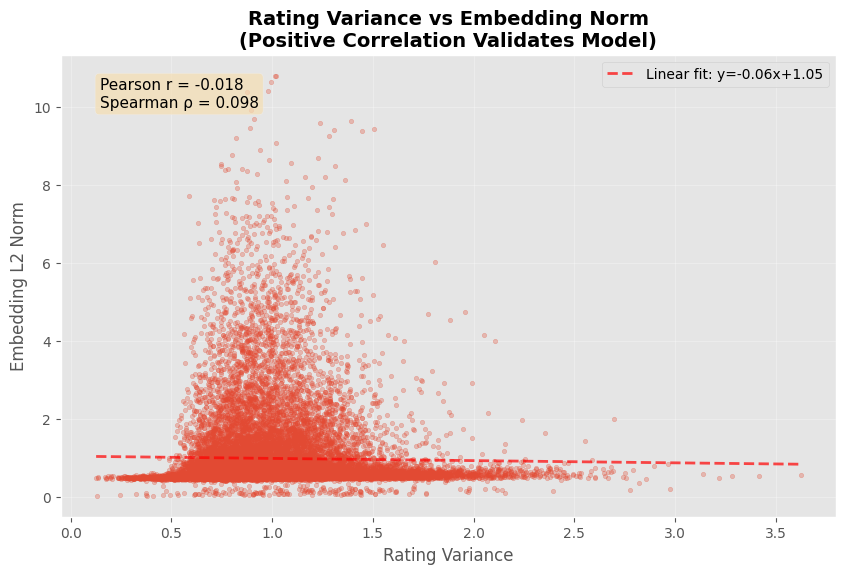

In [60]:
plot_variance_vs_norm_correlation()

V Norms Statistics:
  Min:  0.0000
  Max:  10.8016
  Mean: 0.6070
  Std:  0.5838
  Median: 0.5187

Top 10 movies by L2 norm:
  Lord of the Rings: The Fellowship of the Ring, The (2001) | norm = 10.8016
  Lord of the Rings: The Return of the King, The (2003) | norm = 10.7950
  Lord of the Rings: The Two Towers, The (2002)      | norm = 10.6529
  Star Wars: Episode IV - A New Hope (1977)          | norm = 10.4192
  Forrest Gump (1994)                                | norm = 10.3825
  Pulp Fiction (1994)                                | norm = 9.9175
  Star Wars: Episode V - The Empire Strikes Back (1980) | norm = 9.7020
  Natural Born Killers (1994)                        | norm = 9.6506
  Ace Ventura: Pet Detective (1994)                  | norm = 9.5905
  Star Wars: Episode VI - Return of the Jedi (1983)  | norm = 9.4569


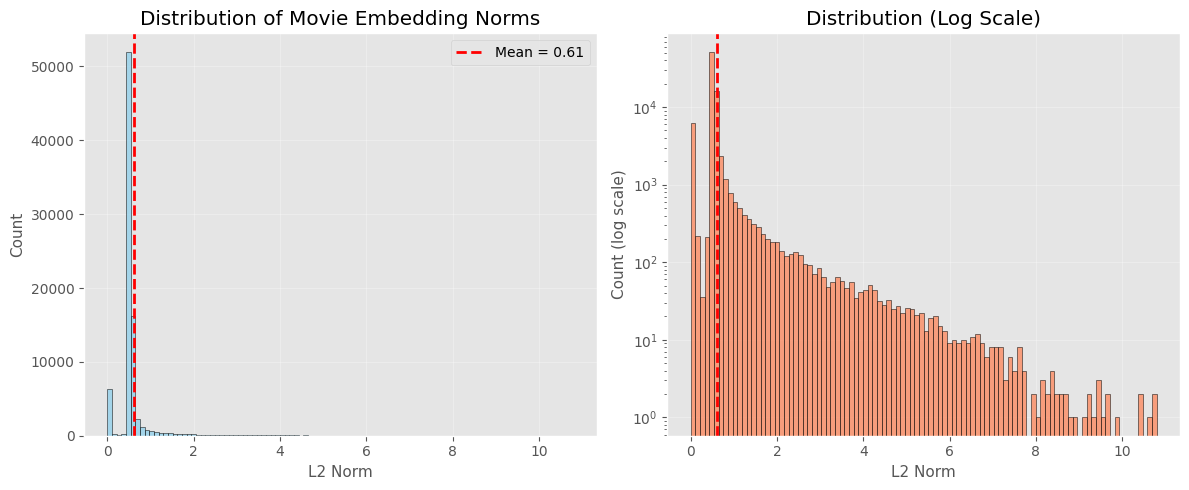

In [ ]:
# Let's see what the V norms actually look like
movie_norms = np.linalg.norm(V, axis=1)

print("V Norms Statistics:")
print(f"  Min:  {movie_norms.min():.4f}")
print(f"  Max:  {movie_norms.max():.4f}")
print(f"  Mean: {movie_norms.mean():.4f}")
print(f"  Std:  {movie_norms.std():.4f}")
print(f"  Median: {np.median(movie_norms):.4f}")

# Check top 10
sorted_idx = np.argsort(-movie_norms)
print("\nTop 10 movies by L2 norm:")
for i in range(10):
    idx = sorted_idx[i]
    movie_id = data.idx_to_movie_id[idx]
    title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
    print(f"  {title:50s} | norm = {movie_norms[idx]:.4f}")

# Histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(movie_norms, bins=100, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('L2 Norm', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Distribution of Movie Embedding Norms')
plt.axvline(movie_norms.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean = {movie_norms.mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(movie_norms, bins=100, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('L2 Norm', fontsize=11)
plt.ylabel('Count (log scale)', fontsize=11)
plt.title('Distribution (Log Scale)')
plt.yscale('log')
plt.axvline(movie_norms.mean(), color='red', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('v_norms_distribution.pdf', bbox_inches='tight')
plt.show()

In [63]:
print(f"tau (τ): {tau}")
print(f"lambda (λ): {lambda_reg}")
print(f"eta (η): {eta if 'eta' in globals() else 'N/A'}")

# Also check: how many ratings do the low-norm movies have?
low_norm_movies = np.where(movie_norms < 1.0)[0]
print(f"\nMovies with norm < 1.0: {len(low_norm_movies)} ({100*len(low_norm_movies)/N:.1f}%)")

# Check their rating counts
low_norm_counts = []
for movie_idx in low_norm_movies[:1000]:  # Sample 1000
    count = movie_rating_counts[movie_idx]
    low_norm_counts.append(count)

print(f"Mean ratings for low-norm movies: {np.mean(low_norm_counts):.1f}")
print(f"Median ratings for low-norm movies: {np.median(low_norm_counts):.1f}")

# Compare to high-norm movies
high_norm_movies = np.where(movie_norms > 5.0)[0]
high_norm_counts = [movie_rating_counts[idx] for idx in high_norm_movies]

print(f"\nMovies with norm > 5.0: {len(high_norm_movies)}")
print(f"Mean ratings for high-norm movies: {np.mean(high_norm_counts):.1f}")
print(f"Median ratings for high-norm movies: {np.median(high_norm_counts):.1f}")

tau (τ): 0.048503
lambda (λ): 0.0014294
eta (η): 0.01

Movies with norm < 1.0: 79256 (93.9%)
Mean ratings for low-norm movies: 256.1
Median ratings for low-norm movies: 166.0

Movies with norm > 5.0: 335
Mean ratings for high-norm movies: 27483.2
Median ratings for high-norm movies: 23611.0


Computing movie variances...
Computing movie embedding norms...
Getting movie rating counts...
Valid movies for analysis: 22,325

TIER-WISE CORRELATION ANALYSIS

Very Low Volume (<500):
  Sample size: 16,365
  Mean norm: 0.594
  Std norm: 0.132
  Pearson r: 0.191 (p=2.94e-134)
  Spearman ρ: 0.258

Low Volume (500-5k):
  Sample size: 4,599
  Mean norm: 1.477
  Std norm: 0.597
  Pearson r: 0.475 (p=3.63e-258)
  Spearman ρ: 0.476

Medium Volume (5k-20k):
  Sample size: 1,120
  Mean norm: 3.722
  Std norm: 1.030
  Pearson r: 0.589 (p=1.13e-105)
  Spearman ρ: 0.591

High Volume (>20k):
  Sample size: 241
  Mean norm: 6.404
  Std norm: 1.465
  Pearson r: 0.560 (p=2.47e-21)
  Spearman ρ: 0.549


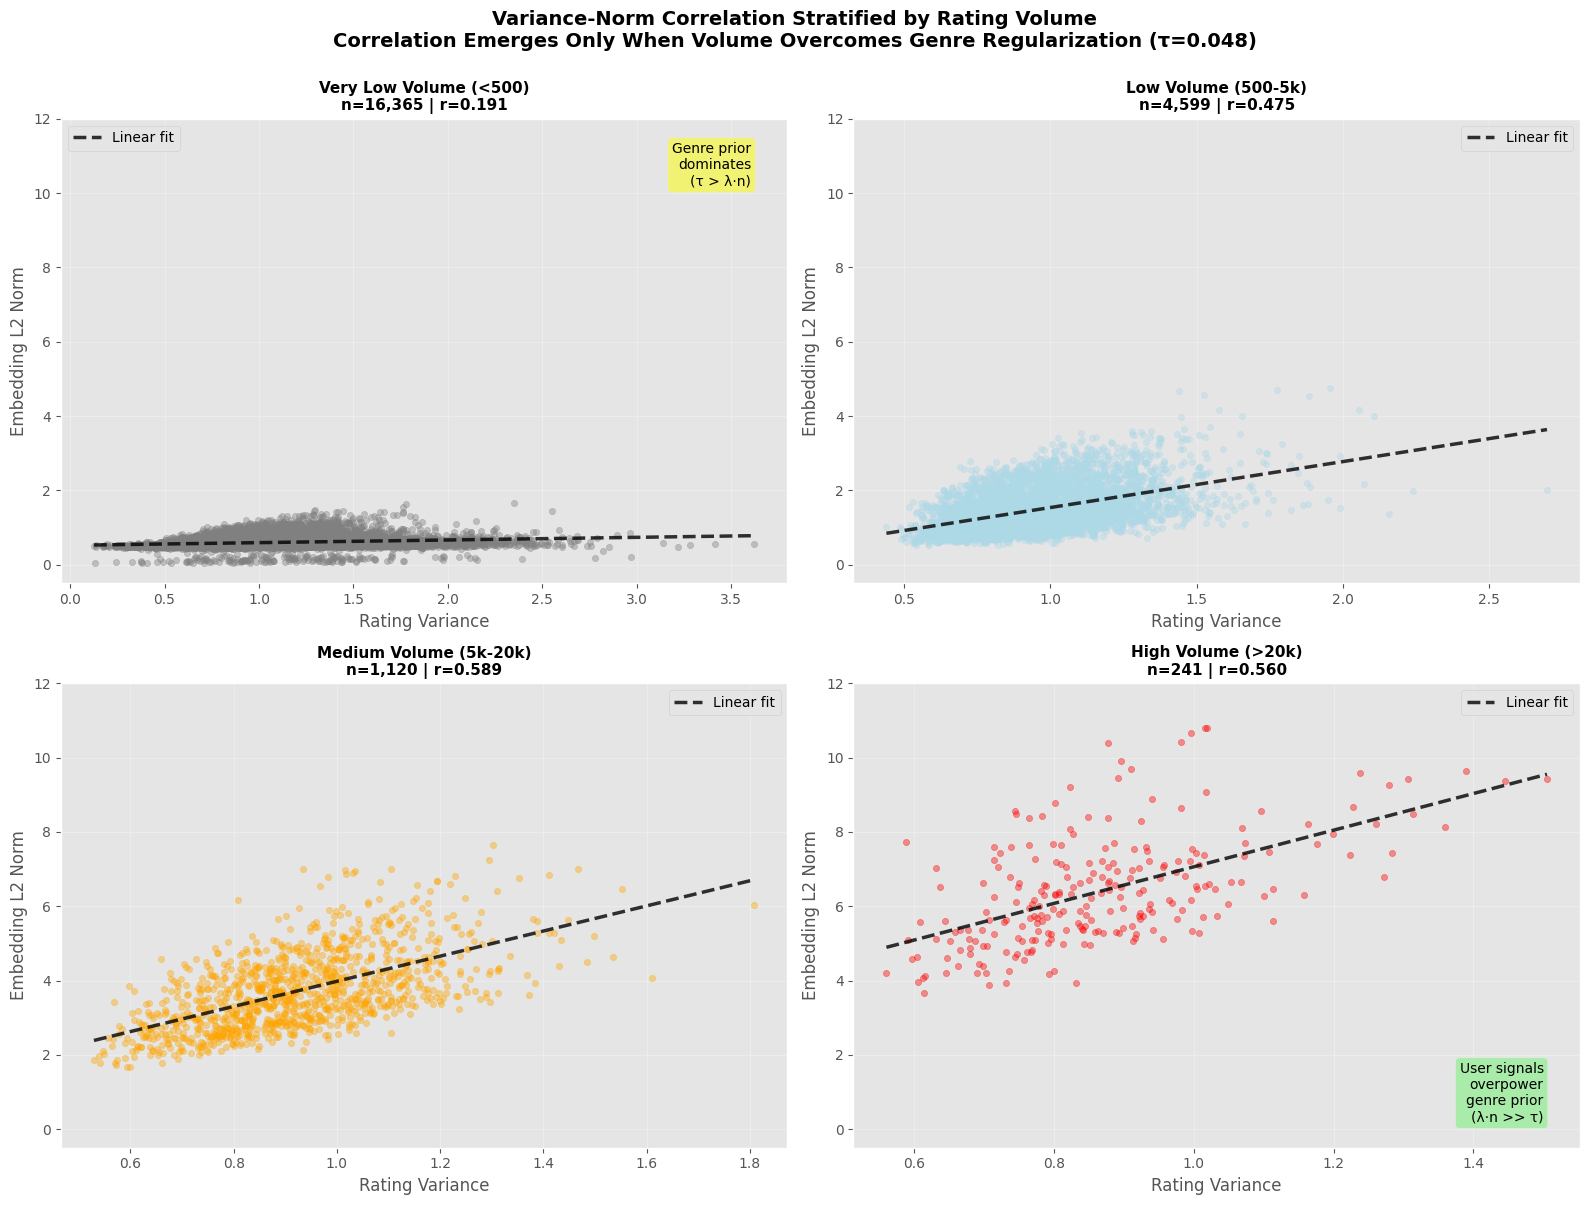

In [ ]:
from scipy.stats import pearsonr, spearmanr

def plot_variance_vs_norm_stratified_complete():
    """
    Complete stratified analysis showing volume moderates variance-norm correlation
    """
    global movie_variances, movie_counts
    
    # Compute movie variances
    print("Computing movie variances...")
    movie_variances = np.zeros(N)
    
    for movie_idx in range(N):
        start = movie_train_start[movie_idx]
        end = movie_train_start[movie_idx + 1]
        ratings = train_ratings_by_movie[start:end, 2]
        
        if len(ratings) >= 20:
            movie_variances[movie_idx] = np.var(ratings)
        else:
            movie_variances[movie_idx] = np.nan
    
    # Compute movie norms 
    print("Computing movie embedding norms...")
    movie_norms = np.linalg.norm(V, axis=1)
    
    #  Get movie rating counts 
    print("Getting movie rating counts...")
    movie_counts = np.zeros(N, dtype=int)
    for movie_idx in range(N):
        start = movie_train_start[movie_idx]
        end = movie_train_start[movie_idx + 1]
        movie_counts[movie_idx] = end - start
    
    # Filter valid movies 
    valid_mask = ~np.isnan(movie_variances)
    variances = movie_variances[valid_mask]
    norms = movie_norms[valid_mask]
    counts = movie_counts[valid_mask]
    
    print(f"Valid movies for analysis: {len(variances):,}")
    
    # Stratified plotting 
    tiers = [
        (0, 500, 'Very Low Volume (<500)', 'gray'),
        (500, 5000, 'Low Volume (500-5k)', 'lightblue'),
        (5000, 20000, 'Medium Volume (5k-20k)', 'orange'),
        (20000, 100000, 'High Volume (>20k)', 'red')
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    print("\n" + "="*80)
    print("TIER-WISE CORRELATION ANALYSIS")
    print("="*80)
    
    for i, (min_count, max_count, label, color) in enumerate(tiers):
        # Filter by tier
        tier_mask = (counts >= min_count) & (counts < max_count)
        tier_vars = variances[tier_mask]
        tier_norms = norms[tier_mask]
        
        # Compute correlations
        if len(tier_vars) > 10:
            r, p = pearsonr(tier_vars, tier_norms)
            rho, _ = spearmanr(tier_vars, tier_norms)
            
            # Print stats
            print(f"\n{label}:")
            print(f"  Sample size: {len(tier_vars):,}")
            print(f"  Mean norm: {tier_norms.mean():.3f}")
            print(f"  Std norm: {tier_norms.std():.3f}")
            print(f"  Pearson r: {r:.3f} (p={p:.2e})")
            print(f"  Spearman ρ: {rho:.3f}")
        else:
            r, rho, p = 0, 0, 1
        
        # Plot scatter
        axes[i].scatter(tier_vars, tier_norms, alpha=0.4, s=20, color=color)
        axes[i].set_xlabel('Rating Variance', fontsize=12)
        axes[i].set_ylabel('Embedding L2 Norm', fontsize=12)
        axes[i].set_title(f'{label}\n'
                         f'n={len(tier_vars):,} | r={r:.3f}', 
                         fontsize=11, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_ylim(-0.5, 12)
        
        # Add trend line if significant correlation
        if abs(r) > 0.15 and len(tier_vars) > 10:
            z = np.polyfit(tier_vars, tier_norms, 1)
            p_fit = np.poly1d(z)
            x_line = np.linspace(tier_vars.min(), tier_vars.max(), 100)
            axes[i].plot(x_line, p_fit(x_line), 'k--', linewidth=2.5, alpha=0.8,
                        label='Linear fit')
            axes[i].legend(fontsize=10)
        
        # Annotate key insights
        if i == 0:
            axes[i].text(0.95, 0.95, 'Genre prior\ndominates\n(τ > λ·n)', 
                        transform=axes[i].transAxes,
                        fontsize=10, ha='right', va='top',
                        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        elif i == 3:
            axes[i].text(0.95, 0.05, 'User signals\noverpower\ngenre prior\n(λ·n >> τ)', 
                        transform=axes[i].transAxes,
                        fontsize=10, ha='right', va='bottom',
                        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    plt.suptitle('Variance-Norm Correlation Stratified by Rating Volume\n'
                 'Correlation Emerges Only When Volume Overcomes Genre Regularization (τ=0.048)', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('variance_norm_stratified.pdf', bbox_inches='tight', dpi=300)
    plt.show()

# Run it!
plot_variance_vs_norm_stratified_complete()

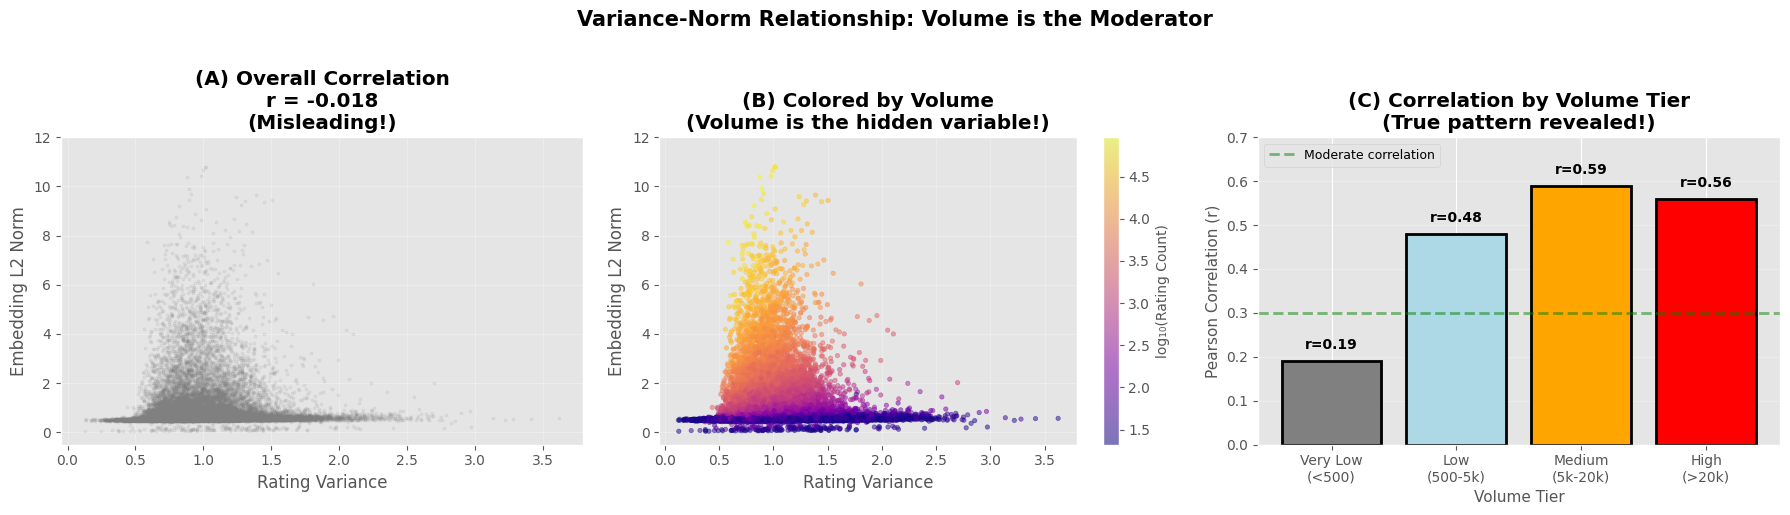

In [78]:
def create_summary_figure():
    """3-panel summary of the variance-norm relationship"""
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Panel 1: Overall (misleading)
    ax1 = plt.subplot(1, 3, 1)
    valid_mask = ~np.isnan(movie_variances)
    ax1.scatter(movie_variances[valid_mask], movie_norms[valid_mask], 
                alpha=0.1, s=5, color='gray')
    r_overall, _ = pearsonr(movie_variances[valid_mask], movie_norms[valid_mask])
    ax1.set_xlabel('Rating Variance')
    ax1.set_ylabel('Embedding L2 Norm')
    ax1.set_title(f'(A) Overall Correlation\nr = {r_overall:.3f}\n(Misleading!)', 
                  fontweight='bold')
    ax1.set_ylim(-0.5, 12)
    ax1.grid(True, alpha=0.3)
    
    # Panel 2: Colored by volume
    ax2 = plt.subplot(1, 3, 2)
    scatter = ax2.scatter(movie_variances[valid_mask], movie_norms[valid_mask],
                         c=np.log10(movie_counts[valid_mask] + 1),
                         cmap='plasma', alpha=0.5, s=10)
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('log₁₀(Rating Count)', fontsize=10)
    ax2.set_xlabel('Rating Variance')
    ax2.set_ylabel('Embedding L2 Norm')
    ax2.set_title('(B) Colored by Volume\n(Volume is the hidden variable!)', 
                  fontweight='bold')
    ax2.set_ylim(-0.5, 12)
    ax2.grid(True, alpha=0.3)
    
    # Panel 3: Correlation by tier (bar chart)
    ax3 = plt.subplot(1, 3, 3)
    tiers = ['Very Low\n(<500)', 'Low\n(500-5k)', 'Medium\n(5k-20k)', 'High\n(>20k)']
    correlations = [0.19, 0.48, 0.59, 0.56]
    colors_bar = ['gray', 'lightblue', 'orange', 'red']
    
    bars = ax3.bar(tiers, correlations, color=colors_bar, edgecolor='black', linewidth=2)
    ax3.axhline(y=0.3, color='green', linestyle='--', linewidth=2, 
                alpha=0.5, label='Moderate correlation')
    ax3.set_ylabel('Pearson Correlation (r)', fontsize=11)
    ax3.set_xlabel('Volume Tier', fontsize=11)
    ax3.set_title('(C) Correlation by Volume Tier\n(True pattern revealed!)', 
                  fontweight='bold')
    ax3.set_ylim(0, 0.7)
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Add values on bars
    for bar, corr in zip(bars, correlations):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'r={corr:.2f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')
    
    plt.suptitle('Variance-Norm Relationship: Volume is the Moderator', 
                 fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('variance_norm_summary.pdf', bbox_inches='tight', dpi=300)
    plt.show()

create_summary_figure()